SixHumpCamel synthetic function:

GP ERM versus STP nu = 3 ERM (winner)

https://www.sfu.ca/~ssurjano/camel6.html

In [1]:
pip install pyGPGO


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
### Import modules:

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from pyGPGO.logger import EventLogger
from pyGPGO.GPGO import GPGO
from pyGPGO.surrogates.GaussianProcess import GaussianProcess
from pyGPGO.surrogates.tStudentProcess import tStudentProcess, logpdf
from pyGPGO.acquisition import Acquisition
from pyGPGO.covfunc import squaredExponential

from collections import OrderedDict
from joblib import Parallel, delayed
from numpy.linalg import slogdet, inv, cholesky, solve
from scipy.optimize import minimize
from scipy.spatial.distance import cdist
from scipy.special import gamma
from scipy.stats import norm, t
from matplotlib.pyplot import rc

rc('text', usetex=False)
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}']
plt.rcParams['text.latex.preamble'] = [r'\boldmath']

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
### Inputs:

obj_func = 'SixHumpCamel'
n_test = 500 # test points
df = 3 # nu

util_gp = 'RegretMinimized'
util_stp = 'tRegretMinimized'
n_init = 5 # random initialisations

cov_func = squaredExponential()
hyperOpt = True


In [4]:
### Objective function:

if obj_func == 'SixHumpCamel':
    
    # True y bounds:
    y_lb = -1.0316
    operator = -1 # targets global minimum 
    y_global_orig = y_lb * operator # targets global minimum
            
# Constraints:
    lb_x1 = -3
    ub_x1 = +3
    
    lb_x2 = -2
    ub_x2 = +2
    
# Input array dimension(s):
    dim = 2

# 2-D inputs' parameter bounds:
    param = {'x1_training': ('cont', [lb_x1, ub_x1]),
             'x2_training': ('cont', [lb_x2, ub_x2])}
    
    max_iter = 100  # iterations of Bayesian optimisation
    
# Test data:
    x1_test = np.linspace(lb_x1, ub_x1, n_test)
    x2_test = np.linspace(lb_x2, ub_x2, n_test)
    Xstar_d = np.column_stack((x1_test, x2_test))

    def f_syn_polarity(x1_training, x2_training):
        return operator * ((4 - 2.1 * x1_training ** 2 + 1 / 3 * x1_training ** 4) * x1_training ** 2 +
                (x1_training * x2_training) + (-4 + 4 * x2_training ** 2) * x2_training ** 2)
    

In [5]:
### Cumulative Regret Calculator:

def min_max_array(x):
    new_list = []
    for i, num in enumerate(x):
            new_list.append(np.min(x[0:i+1]))
    return new_list


In [6]:
### Set-seeds:

run_num_1 = 1
run_num_2 = 2
run_num_3 = 3
run_num_4 = 4
run_num_5 = 5
run_num_6 = 6
run_num_7 = 7
run_num_8 = 8
run_num_9 = 9
run_num_10 = 10
run_num_11 = 11
run_num_12 = 12
run_num_13 = 13
run_num_14 = 14
run_num_15 = 15
run_num_16 = 16
run_num_17 = 17
run_num_18 = 18
run_num_19 = 19
run_num_20 = 20


In [7]:
### Acquisition function - ERM:

class Acquisition_new(Acquisition):    
    def __init__(self, mode, eps=1e-06, **params):
        
        self.params = params
        self.eps = eps

        mode_dict = {
            'RegretMinimized': self.RegretMinimized,
            'tRegretMinimized': self.tRegretMinimized
        }

        self.f = mode_dict[mode]
   
    def RegretMinimized(self, tau, mean, std):
        
        z = (mean - y_global_orig - self.eps) / (std + self.eps)
        return z * (std + self.eps) * norm.cdf(z) + (std + self.eps) * norm.pdf(z)[0]
    
    def tRegretMinimized(self, tau, mean, std, nu=3.0):
        
        gamma = (mean - y_global_orig - self.eps) / (std + self.eps)
        return gamma * (std + self.eps) * t.cdf(gamma, df=nu) + (std + self.eps) * (nu + gamma ** 2)/(nu - 1) * t.pdf(gamma, df=nu)
    

In [8]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 1

np.random.seed(run_num_1)
surrogate_gp_1 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_1 = GPGO(surrogate_gp_1, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.49786797  0.88129797]. 	  0.2650082867644827 	 0.2650082867644827
init   	 [-2.99931375 -0.79066971]. 	  -110.13991869176735 	 0.2650082867644827
init   	 [-2.11946466 -1.63064562]. 	  -26.90935479429681 	 0.2650082867644827
init   	 [-1.88243873 -0.61775709]. 	  -2.8558363102363344 	 0.2650082867644827
init   	 [-0.61939515  0.15526694]. 	  -1.0540522096005847 	 0.2650082867644827
1      	 [-1.19090548 -0.31694205]. 	  -2.4158974691999036 	 0.2650082867644827
2      	 [-0.20496717  1.78860261]. 	  -27.938307482599367 	 0.2650082867644827
3      	 [ 3.         -0.85938812]. 	  -105.54945612064061 	 0.2650082867644827
4      	 [3. 2.]. 	  -162.89999999999998 	 0.2650082867644827
5      	 [-0.59640429 -0.4737148 ]. 	  -0.7584334477155306 	 0.2650082867644827
6      	 [-0.65513346 -0.35813321]. 	  -1.143697148042604 	 0.2650082867644827
7      	 [-0.68772963 -0.29781267]. 	  -1.3388915825031935 	 0.2650082867644827
8  

In [9]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 2

np.random.seed(run_num_2)
surrogate_gp_2 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_2 = GPGO(surrogate_gp_2, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.38403059 -1.89629507]. 	  -38.61280125654363 	 -0.011939608840498828
init   	 [ 0.29797487 -0.25871043]. 	  -0.011939608840498828 	 -0.011939608840498828
init   	 [-0.47779319 -0.67866072]. 	  -0.1381453419305213 	 -0.011939608840498828
init   	 [-1.7721082   0.47708387]. 	  -0.626144759281101 	 -0.011939608840498828
init   	 [-1.20207196 -0.9326909 ]. 	  -3.0693811601417798 	 -0.011939608840498828
1      	 [-0.42476117 -0.03918374]. 	  -0.6657981553034664 	 -0.011939608840498828
2      	 [ 1.68995655 -0.11116565]. 	  -1.8233740408450951 	 -0.011939608840498828
3      	 [3. 2.]. 	  -162.89999999999998 	 -0.011939608840498828
4      	 [ 3. -2.]. 	  -150.89999999999998 	 -0.011939608840498828
5      	 [0.11639073 2.        ]. 	  -48.28658410960645 	 -0.011939608840498828
6      	 [-3.  2.]. 	  -150.89999999999998 	 -0.011939608840498828
7      	 [-3. -2.]. 	  -162.89999999999998 	 -0.011939608840498828
8      	 [-2.56

In [10]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 3

np.random.seed(run_num_3)
surrogate_gp_3 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_3 = GPGO(surrogate_gp_3, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.30478742 0.83259129]. 	  0.2431922946563294 	 0.2431922946563294
init   	 [-1.25457157  0.04331042]. 	  -2.3313310458730996 	 0.2431922946563294
init   	 [2.35768173 1.58517236]. 	  -33.54152175045586 	 0.2431922946563294
init   	 [-2.24648814 -1.17102849]. 	  -14.214109412296352 	 0.2431922946563294
init   	 [-2.69119678 -0.23676063]. 	  -45.87579771712209 	 0.2431922946563294
1      	 [-0.21459765  0.23025045]. 	  0.0704423164450177 	 0.2431922946563294
2      	 [-0.49337921  1.16293966]. 	  -2.1868332576107044 	 0.2431922946563294
3      	 [ 0.0877683  -0.56336094]. 	  0.8853498372559109 	 0.8853498372559109
4      	 [ 0.0663957  -0.50620029]. 	  0.7783385251483066 	 0.8853498372559109
5      	 [ 0.0534111  -0.47037006]. 	  0.7029183637888664 	 0.8853498372559109
6      	 [ 0.04493833 -0.44700015]. 	  0.6515599619289595 	 0.8853498372559109
7      	 [ 0.03953826 -0.43247473]. 	  0.6190614457905591 	 0.885349837255

In [11]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 4

np.random.seed(run_num_4)
surrogate_gp_4 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_4 = GPGO(surrogate_gp_4, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [2.80217903 0.188929  ]. 	  -63.70212732873661 	 -2.3196402150601703
init   	 [2.83610616 0.85926397]. 	  -71.43837110827245 	 -2.3196402150601703
init   	 [ 1.18637295 -1.13564202]. 	  -2.5463267765341566 	 -2.3196402150601703
init   	 [ 2.85764673 -1.97507898]. 	  -113.76785286351424 	 -2.3196402150601703
init   	 [-1.48210583 -0.26083387]. 	  -2.3196402150601703 	 -2.3196402150601703
1      	 [ 0.12626012 -1.09757571]. 	  -0.9109071443411083 	 -0.9109071443411083
2      	 [ 0.15931999 -1.06485198]. 	  -0.5378979538717611 	 -0.5378979538717611
3      	 [-3.  2.]. 	  -150.89999999999998 	 -0.5378979538717611
4      	 [-3. -2.]. 	  -162.89999999999998 	 -0.5378979538717611
5      	 [-0.28282789 -0.08067361]. 	  -0.30365314188521697 	 -0.30365314188521697
6      	 [ 0.09013544 -0.66305218]. 	  1.0128311517758304 	 1.0128311517758304
7      	 [ 0.08391973 -0.64651905]. 	  0.999285050327336 	 1.0128311517758304
8      	 [ 

In [12]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 5

np.random.seed(run_num_5)
surrogate_gp_5 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_5 = GPGO(surrogate_gp_5, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.66804097  1.48292922]. 	  -10.126030408244933 	 0.6512780061070701
init   	 [-1.75968507  1.67444363]. 	  -19.4300499315822 	 0.6512780061070701
init   	 [-0.06953287  0.44697545]. 	  0.6512780061070701 	 0.6512780061070701
init   	 [1.59544714 0.07367195]. 	  -2.168775388880503 	 0.6512780061070701
init   	 [-1.21919699 -1.24911509]. 	  -7.420330936884148 	 0.6512780061070701
1      	 [0.3857265  1.13871156]. 	  -2.5276755327379994 	 0.6512780061070701
2      	 [ 3. -2.]. 	  -150.89999999999998 	 0.6512780061070701
3      	 [3. 2.]. 	  -162.89999999999998 	 0.6512780061070701
4      	 [ 0.45387604 -0.13660101]. 	  -0.6025627985788967 	 0.6512780061070701
5      	 [-3. -2.]. 	  -162.89999999999998 	 0.6512780061070701
6      	 [-0.0783965  -0.41997527]. 	  0.5236490019717478 	 0.6512780061070701
7      	 [-0.07119764 -0.40122548]. 	  0.491478071057054 	 0.6512780061070701
8      	 [-0.06589228 -0.38852882]. 	  0.469

In [13]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 6

np.random.seed(run_num_6)
surrogate_gp_6 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_6 = GPGO(surrogate_gp_6, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.35716091 -0.67208078]. 	  -11.995980169715628 	 0.3096187466378422
init   	 [ 1.92737474 -1.8332135 ]. 	  -31.167927894156623 	 0.3096187466378422
init   	 [-2.35405992  0.38020826]. 	  -13.013381745677465 	 0.3096187466378422
init   	 [ 0.17890417 -0.32477029]. 	  0.3096187466378422 	 0.3096187466378422
init   	 [-0.9875529   0.49007773]. 	  -0.9989196280666852 	 0.3096187466378422
1      	 [0.2290865  0.98917957]. 	  -0.3465525235542021 	 0.3096187466378422
2      	 [3. 2.]. 	  -162.89999999999998 	 0.3096187466378422
3      	 [-0.09906757  0.27140284]. 	  0.26076676252374176 	 0.3096187466378422
4      	 [-0.09855403  0.27692565]. 	  0.27186554674050134 	 0.3096187466378422
5      	 [-1.22719283 -2.        ]. 	  -52.85406400442485 	 0.3096187466378422
6      	 [-0.05530024  0.61836295]. 	  0.9666380935201604 	 0.9666380935201604
7      	 [-0.05659497  0.62178809]. 	  0.9709799442195857 	 0.9709799442195857
8     

In [14]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 7

np.random.seed(run_num_7)
surrogate_gp_7 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_7 = GPGO(surrogate_gp_7, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.54215026  1.11967517]. 	  -26.53843863832488 	 0.46481072558790276
init   	 [-0.36954461  0.89386071]. 	  0.46481072558790276 	 0.46481072558790276
init   	 [2.86793707 0.15398348]. 	  -76.66051064695093 	 0.46481072558790276
init   	 [ 0.00672278 -1.71179547]. 	  -22.613010892757885 	 0.46481072558790276
init   	 [-1.38936612e+00 -4.69996698e-04]. 	  -2.294585534557751 	 0.46481072558790276
1      	 [0.16121662 1.7545766 ]. 	  -25.980871892344787 	 0.46481072558790276
2      	 [ 2.08143936 -0.31498517]. 	  -4.006029431355211 	 0.46481072558790276
3      	 [ 1.18351027 -0.35588359]. 	  -1.5350817087151063 	 0.46481072558790276
4      	 [-0.37424687  0.48601799]. 	  0.383594391405703 	 0.46481072558790276
5      	 [-0.76036043  0.79902079]. 	  -0.14418488075070213 	 0.46481072558790276
6      	 [0.03906163 0.32941707]. 	  0.36799395523255707 	 0.46481072558790276
7      	 [-3. -2.]. 	  -162.89999999999998 	 0.4648107

In [15]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 8

np.random.seed(run_num_8)
surrogate_gp_8 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_8 = GPGO(surrogate_gp_8, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [2.24057642 1.87416265]. 	  -48.82879577505094 	 -0.03190064766213015
init   	 [2.21516724 0.12342277]. 	  -8.660623551418242 	 -0.03190064766213015
init   	 [-1.60363003 -1.95440478]. 	  -48.28332373939171 	 -0.03190064766213015
init   	 [-0.41718709 -0.39059456]. 	  -0.2801229037700297 	 -0.03190064766213015
init   	 [ 0.13604803 -0.08643282]. 	  -0.03190064766213015 	 -0.03190064766213015
1      	 [-0.84228478  0.91558374]. 	  -0.5864343738000131 	 -0.03190064766213015
2      	 [-3.  2.]. 	  -150.89999999999998 	 -0.03190064766213015
3      	 [-0.27001932  0.4386089 ]. 	  0.4592996355476947 	 0.4592996355476947
4      	 [-0.27227671  0.42623368]. 	  0.4255978937321288 	 0.4592996355476947
5      	 [-0.27346317  0.41859608]. 	  0.4050255178462272 	 0.4592996355476947
6      	 [-0.27417166  0.41342685]. 	  0.39122412813367197 	 0.4592996355476947
7      	 [-0.27463364  0.40971754]. 	  0.38138554123987256 	 0.4592996355

In [16]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 9

np.random.seed(run_num_9)
surrogate_gp_9 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_9 = GPGO(surrogate_gp_9, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.93775508  0.00749837]. 	  -92.35857237145763 	 -1.395407492769129
init   	 [-0.02536024 -1.46468188]. 	  -9.867672894921913 	 -1.395407492769129
init   	 [-2.14733349 -1.1257653 ]. 	  -10.24680089963123 	 -1.395407492769129
init   	 [-0.48895092 -1.00759533]. 	  -1.395407492769129 	 -1.395407492769129
init   	 [-2.49564209 -0.61800544]. 	  -24.58298635463645 	 -1.395407492769129
1      	 [0.20087506 1.2956128 ]. 	  -4.974772100042532 	 -1.395407492769129
2      	 [ 3.         -0.22076027]. 	  -108.05227926250552 	 -1.395407492769129
3      	 [-1.45414596  2.        ]. 	  -47.311747509184165 	 -1.395407492769129
4      	 [-1.57054129 -2.        ]. 	  -53.23319972947514 	 -1.395407492769129
5      	 [-0.50961948 -0.13404216]. 	  -0.9007741863881611 	 -0.9007741863881611
6      	 [1.96414584 2.        ]. 	  -55.24423071573652 	 -0.9007741863881611
7      	 [-0.01755752 -0.13269613]. 	  0.06563016133049356 	 0.065630161

In [17]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 10

np.random.seed(run_num_10)
surrogate_gp_10 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_10 = GPGO(surrogate_gp_10, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.62792386 -1.9169922 ]. 	  -38.25414770674631 	 -0.7775687473184012
init   	 [0.80188941 0.99521553]. 	  -2.552651714051803 	 -0.7775687473184012
init   	 [-0.00895793 -1.10081342]. 	  -1.0367630165263393 	 -0.7775687473184012
init   	 [-1.81162281  1.04212285]. 	  -0.7775687473184012 	 -0.7775687473184012
init   	 [-1.98533498 -1.64664074]. 	  -25.383481436170044 	 -0.7775687473184012
1      	 [3. 2.]. 	  -162.89999999999998 	 -0.7775687473184012
2      	 [-3.  2.]. 	  -150.89999999999998 	 -0.7775687473184012
3      	 [-0.97453316  0.37274809]. 	  -1.348480034205919 	 -0.7775687473184012
4      	 [ 3.         -0.31734861]. 	  -107.5856837146818 	 -0.7775687473184012
5      	 [-0.5891859   0.83922221]. 	  0.17807259252024998 	 0.17807259252024998
6      	 [-0.65569297  0.76426403]. 	  0.11477805934642471 	 0.17807259252024998
7      	 [-0.68873864  0.7305229 ]. 	  0.03812114548834189 	 0.17807259252024998
8      	 [

In [18]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 11

np.random.seed(run_num_11)
surrogate_gp_11 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_11 = GPGO(surrogate_gp_11, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.91838187 -1.92209903]. 	  -46.39910375151002 	 0.6254688257880329
init   	 [-0.22068884  0.89973572]. 	  0.6254688257880329 	 0.6254688257880329
init   	 [-0.47877837 -0.05829161]. 	  -0.8249470187639529 	 0.6254688257880329
init   	 [-2.92331511 -0.05051357]. 	  -88.99028404075307 	 0.6254688257880329
init   	 [2.65083991 1.40318036]. 	  -51.423425402262914 	 0.6254688257880329
1      	 [ 1.79063726 -2.        ]. 	  -46.64254246955394 	 0.6254688257880329
2      	 [-0.42003216  2.        ]. 	  -47.802108630641015 	 0.6254688257880329
3      	 [ 0.09429169 -0.00574364]. 	  -0.03472439478003897 	 0.6254688257880329
4      	 [ 0.08276052 -0.00260124]. 	  -0.027056458121901918 	 0.6254688257880329
5      	 [ 0.07672207 -0.00090945]. 	  -0.023399329995854014 	 0.6254688257880329
6      	 [0.0730166  0.00015318]. 	  -0.02127714539359677 	 0.6254688257880329
7      	 [0.07052171 0.00088308]. 	  -0.019900505534536265 	 0.6

In [19]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_gp_12 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_12 = GPGO(surrogate_gp_12, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.07502295  0.96019879]. 	  -2.6185857163917037 	 -1.9967735906956543
init   	 [-1.42010991  0.13495757]. 	  -1.9967735906956543 	 -1.9967735906956543
init   	 [-2.91255023  1.67498803]. 	  -101.67816714332157 	 -1.9967735906956543
init   	 [ 2.40428912 -1.86631429]. 	  -47.44624883788006 	 -1.9967735906956543
init   	 [ 2.74169602 -1.45116271]. 	  -58.32400185681089 	 -1.9967735906956543
1      	 [-1.2477584  0.9198662]. 	  -0.7267928205662857 	 -0.7267928205662857
2      	 [1.77328709 2.        ]. 	  -53.72420422974635 	 -0.7267928205662857
3      	 [-3. -2.]. 	  -162.89999999999998 	 -0.7267928205662857
4      	 [-0.16304956 -2.        ]. 	  -48.43096180942048 	 -0.7267928205662857
5      	 [-0.56695593  2.        ]. 	  -47.94593653385309 	 -0.7267928205662857
6      	 [-1.22619909  0.24116394]. 	  -1.884989355487105 	 -0.7267928205662857
7      	 [-1.23740627  0.24737985]. 	  -1.8619519445127457 	 -0.7267928205662

In [20]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 13

np.random.seed(run_num_13)
surrogate_gp_13 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_13 = GPGO(surrogate_gp_13, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.66621446 -1.04983512]. 	  -0.752930921147986 	 -0.752930921147986
init   	 [1.9456712  1.86299679]. 	  -41.05776363102951 	 -0.752930921147986
init   	 [ 2.83560668 -0.18620301]. 	  -69.0134544723513 	 -0.752930921147986
init   	 [0.65425478 1.10210606]. 	  -3.117452174069064 	 -0.752930921147986
init   	 [0.84968007 0.88807292]. 	  -2.006601529383926 	 -0.752930921147986
1      	 [ 0.68819929 -1.55983024]. 	  -14.332396382766602 	 -0.752930921147986
2      	 [-3.         0.1441294]. 	  -108.386244780951 	 -0.752930921147986
3      	 [-1.18947978  2.        ]. 	  -48.0207425461905 	 -0.752930921147986
4      	 [0.31737209 0.12269227]. 	  -0.3615671266530721 	 -0.3615671266530721
5      	 [0.3208117  0.12860491]. 	  -0.3659948524789032 	 -0.3615671266530721
6      	 [0.32255309 0.13164693]. 	  -0.368146996144656 	 -0.3615671266530721
7      	 [0.32360629 0.13350142]. 	  -0.3694192590924201 	 -0.3615671266530721
8    

In [21]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 14

np.random.seed(run_num_14)
surrogate_gp_14 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_14 = GPGO(surrogate_gp_14, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.08366006 1.09266021]. 	  -1.0453292732107575 	 1.029299726828387
init   	 [ 2.22256611 -1.96781221]. 	  -48.81113313056442 	 1.029299726828387
init   	 [-1.14158445  1.83041496]. 	  -31.794043287944216 	 1.029299726828387
init   	 [ 0.07870027 -0.7268623 ]. 	  1.029299726828387 	 1.029299726828387
init   	 [ 0.23519962 -1.11498023]. 	  -1.161934062902255 	 1.029299726828387
1      	 [-1.4544454   0.80460528]. 	  -0.13632292703505466 	 1.029299726828387
2      	 [ 0.06051083 -1.22941829]. 	  -3.032505907483532 	 1.029299726828387
3      	 [ 0.07221267 -0.58197053]. 	  0.9171399719969583 	 1.029299726828387
4      	 [ 2.28584625 -1.87403497]. 	  -42.12313738585593 	 1.029299726828387
5      	 [ 0.05156011 -0.18537694]. 	  0.13167384505154514 	 1.029299726828387
6      	 [-1.62233454  0.24541874]. 	  -1.4335115362537232 	 1.029299726828387
7      	 [ 0.55082075 -0.3029371 ]. 	  -0.5293510496183202 	 1.029299726828387
8 

In [22]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 15

np.random.seed(run_num_15)
surrogate_gp_15 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_15 = GPGO(surrogate_gp_15, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.09290618 -1.2844163 ]. 	  -6.84252100896936 	 -2.1163170846379233
init   	 [-2.67382071 -0.55384622]. 	  -43.69785230561242 	 -2.1163170846379233
init   	 [-1.34759443  0.1200009 ]. 	  -2.1163170846379233 	 -2.1163170846379233
init   	 [-1.16448651 -0.78210256]. 	  -2.3544087277459513 	 -2.1163170846379233
init   	 [-2.32955234 -1.00040394]. 	  -15.469119251600274 	 -2.1163170846379233
1      	 [-0.25714052  1.36624973]. 	  -6.374883133491508 	 -2.1163170846379233
2      	 [3. 2.]. 	  -162.89999999999998 	 -2.1163170846379233
3      	 [-3.  2.]. 	  -150.89999999999998 	 -2.1163170846379233
4      	 [-0.23930258 -0.51468311]. 	  0.43350570349947654 	 0.43350570349947654
5      	 [-0.25722929 -0.50665369]. 	  0.37732002117668184 	 0.43350570349947654
6      	 [-0.26633193 -0.50276006]. 	  0.3483199462265014 	 0.43350570349947654
7      	 [-0.27184683 -0.50069549]. 	  0.3310089634345319 	 0.43350570349947654
8      	 [

In [23]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 16

np.random.seed(run_num_16)
surrogate_gp_16 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_16 = GPGO(surrogate_gp_16, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.66025353  0.09265337]. 	  -1.8632773736203017 	 -1.8632773736203017
init   	 [ 0.30420874 -1.8175922 ]. 	  -30.24114424375299 	 -1.8632773736203017
init   	 [-0.83562699 -1.10767623]. 	  -3.922061281476444 	 -1.8632773736203017
init   	 [ 1.13235697 -1.3450743 ]. 	  -6.7121671493737685 	 -1.8632773736203017
init   	 [-2.5780508   1.76404344]. 	  -53.42443470756798 	 -1.8632773736203017
1      	 [ 3.         -0.02175059]. 	  -108.83285676520858 	 -1.8632773736203017
2      	 [-3. -2.]. 	  -162.89999999999998 	 -1.8632773736203017
3      	 [0.52364005 2.        ]. 	  -49.993059006085105 	 -1.8632773736203017
4      	 [-0.849958    0.00561249]. 	  -1.914500797155091 	 -1.8632773736203017
5      	 [-1.02889713 -0.08098713]. 	  -2.3337866625156605 	 -1.8632773736203017
6      	 [ 2.29756817 -2.        ]. 	  -55.03475841716943 	 -1.8632773736203017
7      	 [-0.77479579 -0.15236217]. 	  -1.743915764583875 	 -1.74391576458

In [24]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 17

np.random.seed(run_num_17)
surrogate_gp_17 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_17 = GPGO(surrogate_gp_17, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.23200998  0.12234702]. 	  -2.189206652278967 	 -1.7722768782964888
init   	 [-1.85087528 -1.72839857]. 	  -29.406067820453675 	 -1.7722768782964888
init   	 [1.72191276 0.62533409]. 	  -2.2113401446731897 	 -1.7722768782964888
init   	 [0.82512538 0.30241158]. 	  -1.7722768782964888 	 -1.7722768782964888
init   	 [-2.7656225  -0.56874558]. 	  -57.5922315952177 	 -1.7722768782964888
1      	 [-0.57939852  1.17144643]. 	  -2.48356156718488 	 -1.7722768782964888
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.7722768782964888
3      	 [3. 2.]. 	  -162.89999999999998 	 -1.7722768782964888
4      	 [-2.11301115  2.        ]. 	  -49.438700373024105 	 -1.7722768782964888
5      	 [-0.10548772  0.24415895]. 	  0.20574396053309435 	 0.20574396053309435
6      	 [-0.09880327  0.26581485]. 	  0.25007503735775843 	 0.25007503735775843
7      	 [-0.09470478  0.27617426]. 	  0.2722668222047941 	 0.2722668222047941
8      	 [-0.09

In [25]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 18

np.random.seed(run_num_18)
surrogate_gp_18 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_18 = GPGO(surrogate_gp_18, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.90224545 0.02181349]. 	  -2.062169771852028 	 -2.062169771852028
init   	 [ 2.27160883 -1.2726391 ]. 	  -11.64729291207819 	 -2.062169771852028
init   	 [2.11339841 1.00054514]. 	  -7.792128760671214 	 -2.062169771852028
init   	 [0.99661    1.95158179]. 	  -46.96206222999227 	 -2.062169771852028
init   	 [-1.45818946 -1.8867763 ]. 	  -41.4190528039297 	 -2.062169771852028
1      	 [-3.  2.]. 	  -150.89999999999998 	 -2.062169771852028
2      	 [3.         0.48915628]. 	  -109.63938130936914 	 -2.062169771852028
3      	 [-1.03461681  0.47305787]. 	  -1.1000866844597135 	 -1.1000866844597135
4      	 [-1.39242244  1.91666559]. 	  -38.90899733568827 	 -1.1000866844597135
5      	 [ 0.17215445 -0.22410269]. 	  0.11266659382318968 	 0.11266659382318968
6      	 [ 0.18005855 -0.22609959]. 	  0.1072534950734143 	 0.11266659382318968
7      	 [ 0.18402812 -0.22709003]. 	  0.10436287795877638 	 0.11266659382318968
8      	 

In [26]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 19

np.random.seed(run_num_19)
surrogate_gp_19 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_19 = GPGO(surrogate_gp_19, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.41479839  1.04499887]. 	  -15.890475442873509 	 -6.578088852480828
init   	 [-1.51837216 -1.44747325]. 	  -13.520839509777993 	 -6.578088852480828
init   	 [-1.01132062 -1.66800174]. 	  -23.772158573571232 	 -6.578088852480828
init   	 [1.03186249 1.22637519]. 	  -6.578088852480828 	 -6.578088852480828
init   	 [2.89645149 0.54264294]. 	  -83.31828503667734 	 -6.578088852480828
1      	 [-0.0893227  2.       ]. 	  -47.853135267681516 	 -6.578088852480828
2      	 [ 1.65748576 -2.        ]. 	  -46.73604076286675 	 -6.578088852480828
3      	 [-3. -2.]. 	  -162.89999999999998 	 -6.578088852480828
4      	 [-0.30055672 -0.24803334]. 	  -0.18805151000986672 	 -0.18805151000986672
5      	 [-0.25263153 -0.23127222]. 	  -0.10274608530062904 	 -0.10274608530062904
6      	 [-0.22983218 -0.22458376]. 	  -0.06552196508153613 	 -0.06552196508153613
7      	 [-0.21578576 -0.22083649]. 	  -0.04382641598378456 	 -0.0438264159837

In [27]:
### Bayesian optimisation runs (x20): 'GP' Acquisition Function run number = 20

np.random.seed(run_num_20)
surrogate_gp_20 = GaussianProcess(cov_func, optimize=hyperOpt)

gp_20 = GPGO(surrogate_gp_20, Acquisition_new(util_gp), f_syn_polarity, param, n_jobs = -1) # define BayesOpt
gp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.52878481 1.59085491]. 	  -17.29968374481291 	 -1.5037392797834441
init   	 [2.34918438 1.26334991]. 	  -20.91583049569433 	 -1.5037392797834441
init   	 [-2.78466249  0.76703033]. 	  -57.06253405225224 	 -1.5037392797834441
init   	 [-0.72791435  0.07404378]. 	  -1.5037392797834441 	 -1.5037392797834441
init   	 [ 0.94770879 -1.22459913]. 	  -3.9766737661914173 	 -1.5037392797834441
1      	 [-1.17018689 -2.        ]. 	  -52.735919686258626 	 -1.5037392797834441
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.5037392797834441
3      	 [ 0.43932856 -0.30904381]. 	  -0.2148874753072924 	 -0.2148874753072924
4      	 [ 0.44030325 -0.31029131]. 	  -0.21430421804036365 	 -0.21430421804036365
5      	 [ 0.4408062  -0.31090829]. 	  -0.21406695937967968 	 -0.21406695937967968
6      	 [ 0.44110331 -0.31127036]. 	  -0.2139322142219265 	 -0.2139322142219265
7      	 [ 0.44129796 -0.31150724]. 	  -0.21384455747711023 	 -0.21384

In [28]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 1 

np.random.seed(run_num_1)
surrogate_stp_1 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_1 = GPGO(surrogate_stp_1, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_1.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.49786797  0.88129797]. 	  0.2650082867644827 	 0.2650082867644827
init   	 [-2.99931375 -0.79066971]. 	  -110.13991869176735 	 0.2650082867644827
init   	 [-2.11946466 -1.63064562]. 	  -26.90935479429681 	 0.2650082867644827
init   	 [-1.88243873 -0.61775709]. 	  -2.8558363102363344 	 0.2650082867644827
init   	 [-0.61939515  0.15526694]. 	  -1.0540522096005847 	 0.2650082867644827
1      	 [1.68704702 2.        ]. 	  -53.432639721661204 	 0.2650082867644827
2      	 [ 3. -2.]. 	  -150.89999999999998 	 0.2650082867644827
3      	 [-2.05786186  2.        ]. 	  -48.478014548651274 	 0.2650082867644827
4      	 [-0.20980682 -1.61322651]. 	  -17.192521889865652 	 0.2650082867644827
5      	 [ 0.86625864 -0.08576329]. 	  -1.8564473278768476 	 0.2650082867644827
6      	 [3.         0.60778234]. 	  -109.79157310675082 	 0.2650082867644827
7      	 [-0.13209991  2.        ]. 	  -47.804964009406675 	 0.2650082867644827
8   

In [29]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 2 

np.random.seed(run_num_2)
surrogate_stp_2 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_2 = GPGO(surrogate_stp_2, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_2.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-0.38403059 -1.89629507]. 	  -38.61280125654363 	 -0.011939608840498828
init   	 [ 0.29797487 -0.25871043]. 	  -0.011939608840498828 	 -0.011939608840498828
init   	 [-0.47779319 -0.67866072]. 	  -0.1381453419305213 	 -0.011939608840498828
init   	 [-1.7721082   0.47708387]. 	  -0.626144759281101 	 -0.011939608840498828
init   	 [-1.20207196 -0.9326909 ]. 	  -3.0693811601417798 	 -0.011939608840498828
1      	 [-0.41162109  0.69775235]. 	  0.6674548409997004 	 0.6674548409997004
2      	 [0.73672632 2.        ]. 	  -51.07916531803823 	 0.6674548409997004
3      	 [ 3.         -1.01587953]. 	  -105.98450515620056 	 0.6674548409997004
4      	 [-3.  2.]. 	  -150.89999999999998 	 0.6674548409997004
5      	 [-3.         -1.42268919]. 	  -121.45891465512346 	 0.6674548409997004
6      	 [3. 2.]. 	  -162.89999999999998 	 0.6674548409997004
7      	 [-0.92185449  0.17264688]. 	  -1.8124166171012224 	 0.6674548409997004
8    

In [30]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 3 

np.random.seed(run_num_3)
surrogate_stp_3 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_3 = GPGO(surrogate_stp_3, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_3.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.30478742 0.83259129]. 	  0.2431922946563294 	 0.2431922946563294
init   	 [-1.25457157  0.04331042]. 	  -2.3313310458730996 	 0.2431922946563294
init   	 [2.35768173 1.58517236]. 	  -33.54152175045586 	 0.2431922946563294
init   	 [-2.24648814 -1.17102849]. 	  -14.214109412296352 	 0.2431922946563294
init   	 [-2.69119678 -0.23676063]. 	  -45.87579771712209 	 0.2431922946563294
1      	 [ 0.3382372 -1.1492001]. 	  -1.7358659447366556 	 0.2431922946563294
2      	 [ 3. -2.]. 	  -150.89999999999998 	 0.2431922946563294
3      	 [-1.05350192  2.        ]. 	  -48.20138691794771 	 0.2431922946563294
4      	 [-0.76679255 -2.        ]. 	  -51.227233765045575 	 0.2431922946563294
5      	 [ 0.81300242 -0.09673897]. 	  -1.7069568080916864 	 0.2431922946563294
6      	 [-3.  2.]. 	  -150.89999999999998 	 0.2431922946563294
7      	 [-3. -2.]. 	  -162.89999999999998 	 0.2431922946563294
8      	 [0.77710324 2.        ]. 	  -51

In [31]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 4 

np.random.seed(run_num_4)
surrogate_stp_4 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_4 = GPGO(surrogate_stp_4, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_4.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [2.80217903 0.188929  ]. 	  -63.70212732873661 	 -2.3196402150601703
init   	 [2.83610616 0.85926397]. 	  -71.43837110827245 	 -2.3196402150601703
init   	 [ 1.18637295 -1.13564202]. 	  -2.5463267765341566 	 -2.3196402150601703
init   	 [ 2.85764673 -1.97507898]. 	  -113.76785286351424 	 -2.3196402150601703
init   	 [-1.48210583 -0.26083387]. 	  -2.3196402150601703 	 -2.3196402150601703
1      	 [-0.37440222 -2.        ]. 	  -49.2691665069199 	 -2.3196402150601703
2      	 [-3.  2.]. 	  -150.89999999999998 	 -2.3196402150601703
3      	 [-3. -2.]. 	  -162.89999999999998 	 -2.3196402150601703
4      	 [-0.02128815  0.92443339]. 	  0.5149674839052885 	 0.5149674839052885
5      	 [0.60024043 2.        ]. 	  -50.38462808378267 	 0.5149674839052885
6      	 [ 0.09368555 -0.1640065 ]. 	  0.08511714862445714 	 0.5149674839052885
7      	 [-0.9179701  0.5150514]. 	  -0.826518157566208 	 0.5149674839052885
8      	 [ 0.65930064

In [32]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 5 

np.random.seed(run_num_5)
surrogate_stp_5 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_5 = GPGO(surrogate_stp_5, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_5.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.66804097  1.48292922]. 	  -10.126030408244933 	 0.6512780061070701
init   	 [-1.75968507  1.67444363]. 	  -19.4300499315822 	 0.6512780061070701
init   	 [-0.06953287  0.44697545]. 	  0.6512780061070701 	 0.6512780061070701
init   	 [1.59544714 0.07367195]. 	  -2.168775388880503 	 0.6512780061070701
init   	 [-1.21919699 -1.24911509]. 	  -7.420330936884148 	 0.6512780061070701
1      	 [ 3. -2.]. 	  -150.89999999999998 	 0.6512780061070701
2      	 [3. 2.]. 	  -162.89999999999998 	 0.6512780061070701
3      	 [-3. -2.]. 	  -162.89999999999998 	 0.6512780061070701
4      	 [ 0.16168936 -2.        ]. 	  -47.77976572254321 	 0.6512780061070701
5      	 [-1.70025821  0.05330367]. 	  -1.9646720809240745 	 0.6512780061070701
6      	 [0.20266095 2.        ]. 	  -48.5660884079462 	 0.6512780061070701
7      	 [-3.          0.81810648]. 	  -105.5603280967681 	 0.6512780061070701
8      	 [-0.62895287 -0.19824406]. 	  -1.248

In [33]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 6 

np.random.seed(run_num_6)
surrogate_stp_6 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_6 = GPGO(surrogate_stp_6, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_6.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.35716091 -0.67208078]. 	  -11.995980169715628 	 0.3096187466378422
init   	 [ 1.92737474 -1.8332135 ]. 	  -31.167927894156623 	 0.3096187466378422
init   	 [-2.35405992  0.38020826]. 	  -13.013381745677465 	 0.3096187466378422
init   	 [ 0.17890417 -0.32477029]. 	  0.3096187466378422 	 0.3096187466378422
init   	 [-0.9875529   0.49007773]. 	  -0.9989196280666852 	 0.3096187466378422
1      	 [0.53713807 1.83587893]. 	  -33.931352836037846 	 0.3096187466378422
2      	 [-1.18927702 -2.        ]. 	  -52.77822733153016 	 0.3096187466378422
3      	 [3. 2.]. 	  -162.89999999999998 	 0.3096187466378422
4      	 [-3.  2.]. 	  -150.89999999999998 	 0.3096187466378422
5      	 [-3.         -1.10157262]. 	  -113.24083127856485 	 0.3096187466378422
6      	 [1.05469762 0.02383175]. 	  -2.3326870071505588 	 0.3096187466378422
7      	 [ 0.49620851 -2.        ]. 	  -47.8701363411531 	 0.3096187466378422
8      	 [ 3. -2.]. 	  -

In [34]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 7 

np.random.seed(run_num_7)
surrogate_stp_7 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_7 = GPGO(surrogate_stp_7, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_7.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.54215026  1.11967517]. 	  -26.53843863832488 	 0.46481072558790276
init   	 [-0.36954461  0.89386071]. 	  0.46481072558790276 	 0.46481072558790276
init   	 [2.86793707 0.15398348]. 	  -76.66051064695093 	 0.46481072558790276
init   	 [ 0.00672278 -1.71179547]. 	  -22.613010892757885 	 0.46481072558790276
init   	 [-1.38936612e+00 -4.69996698e-04]. 	  -2.294585534557751 	 0.46481072558790276
1      	 [-3. -2.]. 	  -162.89999999999998 	 0.46481072558790276
2      	 [0.78025074 2.        ]. 	  -51.292561606765204 	 0.46481072558790276
3      	 [ 3. -2.]. 	  -150.89999999999998 	 0.46481072558790276
4      	 [-1.2873807  2.       ]. 	  -47.80381450308264 	 0.46481072558790276
5      	 [ 0.16293594 -0.13902214]. 	  -0.006252473373122014 	 0.46481072558790276
6      	 [3. 2.]. 	  -162.89999999999998 	 0.46481072558790276
7      	 [-0.61152735 -0.28603116]. 	  -1.094044727759152 	 0.46481072558790276
8      	 [ 0.79244977

In [35]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 8 

np.random.seed(run_num_8)
surrogate_stp_8 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_8 = GPGO(surrogate_stp_8, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_8.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [2.24057642 1.87416265]. 	  -48.82879577505094 	 -0.03190064766213015
init   	 [2.21516724 0.12342277]. 	  -8.660623551418242 	 -0.03190064766213015
init   	 [-1.60363003 -1.95440478]. 	  -48.28332373939171 	 -0.03190064766213015
init   	 [-0.41718709 -0.39059456]. 	  -0.2801229037700297 	 -0.03190064766213015
init   	 [ 0.13604803 -0.08643282]. 	  -0.03190064766213015 	 -0.03190064766213015
1      	 [-1.51603875  1.59659505]. 	  -15.522270662341809 	 -0.03190064766213015
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -0.03190064766213015
3      	 [-3.          0.24383794]. 	  -107.94479894208206 	 -0.03190064766213015
4      	 [-2.43142906e-04  2.00000000e+00]. 	  -47.999513950661196 	 -0.03190064766213015
5      	 [ 0.41254853 -2.        ]. 	  -47.79650121224432 	 -0.03190064766213015
6      	 [0.96464903 0.03060498]. 	  -2.1981338019394068 	 -0.03190064766213015
7      	 [-3.  2.]. 	  -150.89999999999998 	 -0.031900647

In [36]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 9 

np.random.seed(run_num_9)
surrogate_stp_9 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_9 = GPGO(surrogate_stp_9, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_9.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.93775508  0.00749837]. 	  -92.35857237145763 	 -1.395407492769129
init   	 [-0.02536024 -1.46468188]. 	  -9.867672894921913 	 -1.395407492769129
init   	 [-2.14733349 -1.1257653 ]. 	  -10.24680089963123 	 -1.395407492769129
init   	 [-0.48895092 -1.00759533]. 	  -1.395407492769129 	 -1.395407492769129
init   	 [-2.49564209 -0.61800544]. 	  -24.58298635463645 	 -1.395407492769129
1      	 [3. 2.]. 	  -162.89999999999998 	 -1.395407492769129
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.395407492769129
3      	 [-0.45841125  2.        ]. 	  -47.83409991920771 	 -1.395407492769129
4      	 [0.85125489 0.04298794]. 	  -1.951888254704305 	 -1.395407492769129
5      	 [-1.48234862 -2.        ]. 	  -53.151088293314515 	 -1.395407492769129
6      	 [-3.  2.]. 	  -150.89999999999998 	 -1.395407492769129
7      	 [-0.41351583  0.08934667]. 	  -0.5556225416925543 	 -0.5556225416925543
8      	 [-3. -2.]. 	  -162.899999999999

In [37]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 10 

np.random.seed(run_num_10)
surrogate_stp_10 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_10 = GPGO(surrogate_stp_10, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_10.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.62792386 -1.9169922 ]. 	  -38.25414770674631 	 -0.7775687473184012
init   	 [0.80188941 0.99521553]. 	  -2.552651714051803 	 -0.7775687473184012
init   	 [-0.00895793 -1.10081342]. 	  -1.0367630165263393 	 -0.7775687473184012
init   	 [-1.81162281  1.04212285]. 	  -0.7775687473184012 	 -0.7775687473184012
init   	 [-1.98533498 -1.64664074]. 	  -25.383481436170044 	 -0.7775687473184012
1      	 [3. 2.]. 	  -162.89999999999998 	 -0.7775687473184012
2      	 [-3.  2.]. 	  -150.89999999999998 	 -0.7775687473184012
3      	 [-0.61174023  2.        ]. 	  -47.996798612026915 	 -0.7775687473184012
4      	 [ 3.         -0.33692774]. 	  -107.4866830115488 	 -0.7775687473184012
5      	 [-0.96459623  0.00587716]. 	  -2.1664490832063437 	 -0.7775687473184012
6      	 [-3.         -0.45082508]. 	  -109.60473351017524 	 -0.7775687473184012
7      	 [-0.518975 -2.      ]. 	  -49.96946597892602 	 -0.7775687473184012
8      	 [0.25

In [38]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 11 

np.random.seed(run_num_11)
surrogate_stp_11 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_11 = GPGO(surrogate_stp_11, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_11.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.91838187 -1.92209903]. 	  -46.39910375151002 	 0.6254688257880329
init   	 [-0.22068884  0.89973572]. 	  0.6254688257880329 	 0.6254688257880329
init   	 [-0.47877837 -0.05829161]. 	  -0.8249470187639529 	 0.6254688257880329
init   	 [-2.92331511 -0.05051357]. 	  -88.99028404075307 	 0.6254688257880329
init   	 [2.65083991 1.40318036]. 	  -51.423425402262914 	 0.6254688257880329
1      	 [ 1.80850935 -2.        ]. 	  -46.66382992980821 	 0.6254688257880329
2      	 [-0.9752184  2.       ]. 	  -48.24106256776646 	 0.6254688257880329
3      	 [0.64894496 0.05800598]. 	  -1.3612080143044278 	 0.6254688257880329
4      	 [ 0.02064705 -0.89040825]. 	  0.673689228431223 	 0.673689228431223
5      	 [0.25095176 0.10304984]. 	  -0.22749617783408294 	 0.673689228431223
6      	 [ 3.         -0.61847937]. 	  -106.09977115149148 	 0.673689228431223
7      	 [0.89265336 2.        ]. 	  -51.807902718956235 	 0.673689228431223
8 

In [39]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 12

np.random.seed(run_num_12)
surrogate_stp_12 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_12 = GPGO(surrogate_stp_12, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_12.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.07502295  0.96019879]. 	  -2.6185857163917037 	 -1.9967735906956543
init   	 [-1.42010991  0.13495757]. 	  -1.9967735906956543 	 -1.9967735906956543
init   	 [-2.91255023  1.67498803]. 	  -101.67816714332157 	 -1.9967735906956543
init   	 [ 2.40428912 -1.86631429]. 	  -47.44624883788006 	 -1.9967735906956543
init   	 [ 2.74169602 -1.45116271]. 	  -58.32400185681089 	 -1.9967735906956543
1      	 [-0.39176725  1.5242247 ]. 	  -12.265642885832602 	 -1.9967735906956543
2      	 [3. 2.]. 	  -162.89999999999998 	 -1.9967735906956543
3      	 [-3. -2.]. 	  -162.89999999999998 	 -1.9967735906956543
4      	 [-0.0182726  -1.12851875]. 	  -1.4155029251986726 	 -1.4155029251986726
5      	 [0.67020012 0.18263987]. 	  -1.396627126354816 	 -1.396627126354816
6      	 [-0.06063807 -2.        ]. 	  -48.13595565688664 	 -1.396627126354816
7      	 [-0.47122639  0.07034518]. 	  -0.7354755614644964 	 -0.7354755614644964
8      	 [0.

In [40]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 13 

np.random.seed(run_num_13)
surrogate_stp_13 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_13 = GPGO(surrogate_stp_13, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_13.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 1.66621446 -1.04983512]. 	  -0.752930921147986 	 -0.752930921147986
init   	 [1.9456712  1.86299679]. 	  -41.05776363102951 	 -0.752930921147986
init   	 [ 2.83560668 -0.18620301]. 	  -69.0134544723513 	 -0.752930921147986
init   	 [0.65425478 1.10210606]. 	  -3.117452174069064 	 -0.752930921147986
init   	 [0.84968007 0.88807292]. 	  -2.006601529383926 	 -0.752930921147986
1      	 [ 0.11748268 -1.15392561]. 	  -1.685107104956753 	 -0.752930921147986
2      	 [-1.14016576  1.01518233]. 	  -1.3519770527173272 	 -0.752930921147986
3      	 [-3. -2.]. 	  -162.89999999999998 	 -0.752930921147986
4      	 [-3.  2.]. 	  -150.89999999999998 	 -0.752930921147986
5      	 [ 1.08987166 -2.        ]. 	  -48.167250662404584 	 -0.752930921147986
6      	 [-0.24488367  0.02810628]. 	  -0.22235187465038392 	 -0.22235187465038392
7      	 [ 3. -2.]. 	  -150.89999999999998 	 -0.22235187465038392
8      	 [ 1.04204528 -0.44457769]. 	 

In [41]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 14 

np.random.seed(run_num_14)
surrogate_stp_14 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_14 = GPGO(surrogate_stp_14, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_14.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.08366006 1.09266021]. 	  -1.0453292732107575 	 1.029299726828387
init   	 [ 2.22256611 -1.96781221]. 	  -48.81113313056442 	 1.029299726828387
init   	 [-1.14158445  1.83041496]. 	  -31.794043287944216 	 1.029299726828387
init   	 [ 0.07870027 -0.7268623 ]. 	  1.029299726828387 	 1.029299726828387
init   	 [ 0.23519962 -1.11498023]. 	  -1.161934062902255 	 1.029299726828387
1      	 [1.89853564 1.50330511]. 	  -16.987634599938588 	 1.029299726828387
2      	 [-1.88208258 -1.63896295]. 	  -23.837190696460535 	 1.029299726828387
3      	 [-3.          0.43461685]. 	  -106.98330266760131 	 1.029299726828387
4      	 [3.         0.23658381]. 	  -109.39839524339403 	 1.029299726828387
5      	 [-0.19979114 -2.        ]. 	  -48.55592348904069 	 1.029299726828387
6      	 [0.32896993 0.1214515 ]. 	  -0.3905348371950145 	 1.029299726828387
7      	 [0.81863235 2.        ]. 	  -51.47508880425528 	 1.029299726828387
8      	 [

In [42]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 15 

np.random.seed(run_num_15)
surrogate_stp_15 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_15 = GPGO(surrogate_stp_15, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_15.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [ 2.09290618 -1.2844163 ]. 	  -6.84252100896936 	 -2.1163170846379233
init   	 [-2.67382071 -0.55384622]. 	  -43.69785230561242 	 -2.1163170846379233
init   	 [-1.34759443  0.1200009 ]. 	  -2.1163170846379233 	 -2.1163170846379233
init   	 [-1.16448651 -0.78210256]. 	  -2.3544087277459513 	 -2.1163170846379233
init   	 [-2.32955234 -1.00040394]. 	  -15.469119251600274 	 -2.1163170846379233
1      	 [0.05567328 0.77688668]. 	  0.9014774425222407 	 0.9014774425222407
2      	 [-1.08600029  2.        ]. 	  -48.17137310903507 	 0.9014774425222407
3      	 [1.58656919 1.09777358]. 	  -4.809549206848835 	 0.9014774425222407
4      	 [ 0.14825354 -0.45955491]. 	  0.6475819081358222 	 0.9014774425222407
5      	 [-0.18675767 -2.        ]. 	  -48.51048851682823 	 0.9014774425222407
6      	 [3. 2.]. 	  -162.89999999999998 	 0.9014774425222407
7      	 [1.07136709 0.10966628]. 	  -2.39859849858498 	 0.9014774425222407
8      	 [ 

In [43]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 16 

np.random.seed(run_num_16)
surrogate_stp_16 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_16 = GPGO(surrogate_stp_16, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_16.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.66025353  0.09265337]. 	  -1.8632773736203017 	 -1.8632773736203017
init   	 [ 0.30420874 -1.8175922 ]. 	  -30.24114424375299 	 -1.8632773736203017
init   	 [-0.83562699 -1.10767623]. 	  -3.922061281476444 	 -1.8632773736203017
init   	 [ 1.13235697 -1.3450743 ]. 	  -6.7121671493737685 	 -1.8632773736203017
init   	 [-2.5780508   1.76404344]. 	  -53.42443470756798 	 -1.8632773736203017
1      	 [3.         0.30626313]. 	  -109.4787925601704 	 -1.8632773736203017
2      	 [-3. -2.]. 	  -162.89999999999998 	 -1.8632773736203017
3      	 [0.3339528 2.       ]. 	  -49.08834665210417 	 -1.8632773736203017
4      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.8632773736203017
5      	 [-0.01428911 -0.00094648]. 	  -0.0008265685841763482 	 -0.0008265685841763482
6      	 [-0.8053902   0.19396115]. 	  -1.5009730929402496 	 -0.0008265685841763482
7      	 [ 0.71522002 -0.13513306]. 	  -1.372904619146189 	 -0.0008265685841763482
8 

In [44]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 17 

np.random.seed(run_num_17)
surrogate_stp_17 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_17 = GPGO(surrogate_stp_17, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_17.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-1.23200998  0.12234702]. 	  -2.189206652278967 	 -1.7722768782964888
init   	 [-1.85087528 -1.72839857]. 	  -29.406067820453675 	 -1.7722768782964888
init   	 [1.72191276 0.62533409]. 	  -2.2113401446731897 	 -1.7722768782964888
init   	 [0.82512538 0.30241158]. 	  -1.7722768782964888 	 -1.7722768782964888
init   	 [-2.7656225  -0.56874558]. 	  -57.5922315952177 	 -1.7722768782964888
1      	 [-0.77676135  1.95670391]. 	  -43.52298341603711 	 -1.7722768782964888
2      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.7722768782964888
3      	 [3. 2.]. 	  -162.89999999999998 	 -1.7722768782964888
4      	 [-3.  2.]. 	  -150.89999999999998 	 -1.7722768782964888
5      	 [ 0.16952685 -1.39548835]. 	  -7.256383000688942 	 -1.7722768782964888
6      	 [-0.12799561 -0.13157352]. 	  -0.01376256489419321 	 -0.01376256489419321
7      	 [ 1.16909197 -0.47098095]. 	  -1.1541334440580695 	 -0.01376256489419321
8      	 [-0.28851477 -2. 

In [45]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 18 

np.random.seed(run_num_18)
surrogate_stp_18 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_18 = GPGO(surrogate_stp_18, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_18.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.90224545 0.02181349]. 	  -2.062169771852028 	 -2.062169771852028
init   	 [ 2.27160883 -1.2726391 ]. 	  -11.64729291207819 	 -2.062169771852028
init   	 [2.11339841 1.00054514]. 	  -7.792128760671214 	 -2.062169771852028
init   	 [0.99661    1.95158179]. 	  -46.96206222999227 	 -2.062169771852028
init   	 [-1.45818946 -1.8867763 ]. 	  -41.4190528039297 	 -2.062169771852028
1      	 [-3.  2.]. 	  -150.89999999999998 	 -2.062169771852028
2      	 [ 0.79000945 -2.        ]. 	  -48.179484955485655 	 -2.062169771852028
3      	 [3.         0.05148131]. 	  -109.04387073320572 	 -2.062169771852028
4      	 [-0.6941088  0.2969202]. 	  -0.9493245339400505 	 -0.9493245339400505
5      	 [-3.        -0.7957435]. 	  -110.3582077061305 	 -0.9493245339400505
6      	 [3. 2.]. 	  -162.89999999999998 	 -0.9493245339400505
7      	 [ 3. -2.]. 	  -150.89999999999998 	 -0.9493245339400505
8      	 [-0.65378509  2.        ]. 	  -48.0445

In [46]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 19 

np.random.seed(run_num_19)
surrogate_stp_19 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_19 = GPGO(surrogate_stp_19, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_19.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [-2.41479839  1.04499887]. 	  -15.890475442873509 	 -6.578088852480828
init   	 [-1.51837216 -1.44747325]. 	  -13.520839509777993 	 -6.578088852480828
init   	 [-1.01132062 -1.66800174]. 	  -23.772158573571232 	 -6.578088852480828
init   	 [1.03186249 1.22637519]. 	  -6.578088852480828 	 -6.578088852480828
init   	 [2.89645149 0.54264294]. 	  -83.31828503667734 	 -6.578088852480828
1      	 [ 1.61725746 -2.        ]. 	  -46.82578999540443 	 -6.578088852480828
2      	 [-0.39225792  2.        ]. 	  -47.78244637178001 	 -6.578088852480828
3      	 [-3. -2.]. 	  -162.89999999999998 	 -6.578088852480828
4      	 [-0.13355883 -0.20505081]. 	  0.0630400595018401 	 0.0630400595018401
5      	 [-3.  2.]. 	  -150.89999999999998 	 0.0630400595018401
6      	 [-1.38848961  0.07338664]. 	  -2.171537630726725 	 0.0630400595018401
7      	 [ 0.69845401 -0.16048588]. 	  -1.2778196664900316 	 0.0630400595018401
8      	 [ 3. -2.]. 	  -

In [47]:
### Bayesian optimisation runs (x20): 'STP' Acquisition Function run number = 20 

np.random.seed(run_num_20)
surrogate_stp_20 = tStudentProcess(cov_func, nu = df, optimize=hyperOpt)

stp_20 = GPGO(surrogate_stp_20, Acquisition_new(util_stp), f_syn_polarity, param, n_jobs = -1) # Define BayesOpt
stp_20.run(max_iter = max_iter, init_evals = n_init) # run


Evaluation 	 Proposed point 	  Current eval. 	 Best eval.
init   	 [0.52878481 1.59085491]. 	  -17.29968374481291 	 -1.5037392797834441
init   	 [2.34918438 1.26334991]. 	  -20.91583049569433 	 -1.5037392797834441
init   	 [-2.78466249  0.76703033]. 	  -57.06253405225224 	 -1.5037392797834441
init   	 [-0.72791435  0.07404378]. 	  -1.5037392797834441 	 -1.5037392797834441
init   	 [ 0.94770879 -1.22459913]. 	  -3.9766737661914173 	 -1.5037392797834441
1      	 [ 3. -2.]. 	  -150.89999999999998 	 -1.5037392797834441
2      	 [-0.9827712 -2.       ]. 	  -52.17025017918145 	 -1.5037392797834441
3      	 [-3. -2.]. 	  -162.89999999999998 	 -1.5037392797834441
4      	 [-1.07753905  2.        ]. 	  -48.17997586334706 	 -1.5037392797834441
5      	 [ 0.67479424 -0.040508  ]. 	  -1.3835560332132117 	 -1.3835560332132117
6      	 [3. 2.]. 	  -162.89999999999998 	 -1.3835560332132117
7      	 [1.67537931 0.09628876]. 	  -2.1784963369694106 	 -1.3835560332132117
8      	 [ 0.07514876 -0.54555344

In [48]:
### Simple regret minimisation: run number = 1

gp_output_1 = np.append(np.max(gp_1.GP.y[0:n_init]),gp_1.GP.y[n_init:(n_init+max_iter)]) 
stp_output_1 = np.append(np.max(stp_1.GP.y[0:n_init]),stp_1.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_1 = np.log(y_global_orig - gp_output_1)
regret_stp_1 = np.log(y_global_orig - stp_output_1)

simple_regret_gp_1 = min_max_array(regret_gp_1)
simple_regret_stp_1 = min_max_array(regret_stp_1)

min_simple_regret_gp_1 = min(simple_regret_gp_1)
min_simple_regret_stp_1 = min(simple_regret_stp_1)

min_simple_regret_gp_1, min_simple_regret_stp_1


(-0.2658009358573259, -2.460963545356269)

In [49]:
### Simple regret minimisation: run number = 2

gp_output_2 = np.append(np.max(gp_2.GP.y[0:n_init]),gp_2.GP.y[n_init:(n_init+max_iter)]) 
stp_output_2 = np.append(np.max(stp_2.GP.y[0:n_init]),stp_2.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_2 = np.log(y_global_orig - gp_output_2)
regret_stp_2 = np.log(y_global_orig - stp_output_2)

simple_regret_gp_2 = min_max_array(regret_gp_2)
simple_regret_stp_2 = min_max_array(regret_stp_2)

min_simple_regret_gp_2 = min(simple_regret_gp_2)
min_simple_regret_stp_2 = min(simple_regret_stp_2)

min_simple_regret_gp_2, min_simple_regret_stp_2


(0.04261840449610358, -1.0102027023780198)

In [50]:
### Simple regret minimisation: run number = 3

gp_output_3 = np.append(np.max(gp_3.GP.y[0:n_init]),gp_3.GP.y[n_init:(n_init+max_iter)]) 
stp_output_3 = np.append(np.max(stp_3.GP.y[0:n_init]),stp_3.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_3 = np.log(y_global_orig - gp_output_3)
regret_stp_3 = np.log(y_global_orig - stp_output_3)

simple_regret_gp_3 = min_max_array(regret_gp_3)
simple_regret_stp_3 = min_max_array(regret_stp_3)

min_simple_regret_gp_3 = min(simple_regret_gp_3)
min_simple_regret_stp_3 = min(simple_regret_stp_3)

min_simple_regret_gp_3, min_simple_regret_stp_3


(-1.9224366800906934, -0.23773993035753282)

In [51]:
### Simple regret minimisation: run number = 4

gp_output_4 = np.append(np.max(gp_4.GP.y[0:n_init]),gp_4.GP.y[n_init:(n_init+max_iter)]) 
stp_output_4 = np.append(np.max(stp_4.GP.y[0:n_init]),stp_4.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_4 = np.log(y_global_orig - gp_output_4)
regret_stp_4 = np.log(y_global_orig - stp_output_4)

simple_regret_gp_4 = min_max_array(regret_gp_4)
simple_regret_stp_4 = min_max_array(regret_stp_4)

min_simple_regret_gp_4 = min(simple_regret_gp_4)
min_simple_regret_stp_4 = min(simple_regret_stp_4)

min_simple_regret_gp_4, min_simple_regret_stp_4


(-3.9755567928573337, -1.2300875975311583)

In [52]:
### Simple regret minimisation: run number = 5

gp_output_5 = np.append(np.max(gp_5.GP.y[0:n_init]),gp_5.GP.y[n_init:(n_init+max_iter)]) 
stp_output_5 = np.append(np.max(stp_5.GP.y[0:n_init]),stp_5.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_5 = np.log(y_global_orig - gp_output_5)
regret_stp_5 = np.log(y_global_orig - stp_output_5)

simple_regret_gp_5 = min_max_array(regret_gp_5)
simple_regret_stp_5 = min_max_array(regret_stp_5)

min_simple_regret_gp_5 = min(simple_regret_gp_5)
min_simple_regret_stp_5 = min(simple_regret_stp_5)

min_simple_regret_gp_5, min_simple_regret_stp_5


(-0.9667370327122197, -0.9667370327122197)

In [53]:
### Simple regret minimisation: run number = 6

gp_output_6 = np.append(np.max(gp_6.GP.y[0:n_init]),gp_6.GP.y[n_init:(n_init+max_iter)]) 
stp_output_6 = np.append(np.max(stp_6.GP.y[0:n_init]),stp_6.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_6 = np.log(y_global_orig - gp_output_6)
regret_stp_6 = np.log(y_global_orig - stp_output_6)

simple_regret_gp_6 = min_max_array(regret_gp_6)
simple_regret_stp_6 = min_max_array(regret_stp_6)

min_simple_regret_gp_6 = min(simple_regret_gp_6)
min_simple_regret_stp_6 = min(simple_regret_stp_6)

min_simple_regret_gp_6, min_simple_regret_stp_6


(-3.3342191318798085, -0.47886295590108363)

In [54]:
### Simple regret minimisation: run number = 7

gp_output_7 = np.append(np.max(gp_7.GP.y[0:n_init]),gp_7.GP.y[n_init:(n_init+max_iter)]) 
stp_output_7 = np.append(np.max(stp_7.GP.y[0:n_init]),stp_7.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_7 = np.log(y_global_orig - gp_output_7)
regret_stp_7 = np.log(y_global_orig - stp_output_7)

simple_regret_gp_7 = min_max_array(regret_gp_7)
simple_regret_stp_7 = min_max_array(regret_stp_7)

min_simple_regret_gp_7 = min(simple_regret_gp_7)
min_simple_regret_stp_7 = min(simple_regret_stp_7)

min_simple_regret_gp_7, min_simple_regret_stp_7


(-0.567767694400235, -0.567767694400235)

In [55]:
### Simple regret minimisation: run number = 8

gp_output_8 = np.append(np.max(gp_8.GP.y[0:n_init]),gp_8.GP.y[n_init:(n_init+max_iter)]) 
stp_output_8 = np.append(np.max(stp_8.GP.y[0:n_init]),stp_8.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_8 = np.log(y_global_orig - gp_output_8)
regret_stp_8 = np.log(y_global_orig - stp_output_8)

simple_regret_gp_8 = min_max_array(regret_gp_8)
simple_regret_stp_8 = min_max_array(regret_stp_8)

min_simple_regret_gp_8 = min(simple_regret_gp_8)
min_simple_regret_stp_8 = min(simple_regret_stp_8)

min_simple_regret_gp_8, min_simple_regret_stp_8


(-0.5580913127468999, -0.3524920481389185)

In [56]:
### Simple regret minimisation: run number = 9

gp_output_9 = np.append(np.max(gp_9.GP.y[0:n_init]),gp_9.GP.y[n_init:(n_init+max_iter)]) 
stp_output_9 = np.append(np.max(stp_9.GP.y[0:n_init]),stp_9.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_9 = np.log(y_global_orig - gp_output_9)
regret_stp_9 = np.log(y_global_orig - stp_output_9)

simple_regret_gp_9 = min_max_array(regret_gp_9)
simple_regret_stp_9 = min_max_array(regret_stp_9)

min_simple_regret_gp_9 = min(simple_regret_gp_9)
min_simple_regret_stp_9 = min(simple_regret_stp_9)

min_simple_regret_gp_9, min_simple_regret_stp_9


(-0.03604981995597414, -0.9501501745028799)

In [57]:
### Simple regret minimisation: run number = 10

gp_output_10 = np.append(np.max(gp_10.GP.y[0:n_init]),gp_10.GP.y[n_init:(n_init+max_iter)]) 
stp_output_10 = np.append(np.max(stp_10.GP.y[0:n_init]),stp_10.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_10 = np.log(y_global_orig - gp_output_10)
regret_stp_10 = np.log(y_global_orig - stp_output_10)

simple_regret_gp_10 = min_max_array(regret_gp_10)
simple_regret_stp_10 = min_max_array(regret_stp_10)

min_simple_regret_gp_10 = min(simple_regret_gp_10)
min_simple_regret_stp_10 = min(simple_regret_stp_10)

min_simple_regret_gp_10, min_simple_regret_stp_10


(-0.15837762539473393, -0.7981197245865939)

In [58]:
### Simple regret minimisation: run number = 11

gp_output_11 = np.append(np.max(gp_11.GP.y[0:n_init]),gp_11.GP.y[n_init:(n_init+max_iter)]) 
stp_output_11 = np.append(np.max(stp_11.GP.y[0:n_init]),stp_11.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_11 = np.log(y_global_orig - gp_output_11)
regret_stp_11 = np.log(y_global_orig - stp_output_11)

simple_regret_gp_11 = min_max_array(regret_gp_11)
simple_regret_stp_11 = min_max_array(regret_stp_11)

min_simple_regret_gp_11 = min(simple_regret_gp_11)
min_simple_regret_stp_11 = min(simple_regret_stp_11)

min_simple_regret_gp_11, min_simple_regret_stp_11


(-1.9196861805080783, -1.0274715650752406)

In [59]:
### Simple regret minimisation: run number = 12

gp_output_12 = np.append(np.max(gp_12.GP.y[0:n_init]),gp_12.GP.y[n_init:(n_init+max_iter)]) 
stp_output_12 = np.append(np.max(stp_12.GP.y[0:n_init]),stp_12.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_12 = np.log(y_global_orig - gp_output_12)
regret_stp_12 = np.log(y_global_orig - stp_output_12)

simple_regret_gp_12 = min_max_array(regret_gp_12)
simple_regret_stp_12 = min_max_array(regret_stp_12)

min_simple_regret_gp_12 = min(simple_regret_gp_12)
min_simple_regret_stp_12 = min(simple_regret_stp_12)

min_simple_regret_gp_12, min_simple_regret_stp_12


(0.5644002217234239, -2.29040202327596)

In [60]:
### Simple regret minimisation: run number = 13

gp_output_13 = np.append(np.max(gp_13.GP.y[0:n_init]),gp_13.GP.y[n_init:(n_init+max_iter)]) 
stp_output_13 = np.append(np.max(stp_13.GP.y[0:n_init]),stp_13.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_13 = np.log(y_global_orig - gp_output_13)
regret_stp_13 = np.log(y_global_orig - stp_output_13)

simple_regret_gp_13 = min_max_array(regret_gp_13)
simple_regret_stp_13 = min_max_array(regret_stp_13)

min_simple_regret_gp_13 = min(simple_regret_gp_13)
min_simple_regret_stp_13 = min(simple_regret_stp_13)

min_simple_regret_gp_13, min_simple_regret_stp_13


(0.3315796636621878, -1.4223241976631904)

In [61]:
### Simple regret minimisation: run number = 14

gp_output_14 = np.append(np.max(gp_14.GP.y[0:n_init]),gp_14.GP.y[n_init:(n_init+max_iter)]) 
stp_output_14 = np.append(np.max(stp_14.GP.y[0:n_init]),stp_14.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_14 = np.log(y_global_orig - gp_output_14)
regret_stp_14 = np.log(y_global_orig - stp_output_14)

simple_regret_gp_14 = min_max_array(regret_gp_14)
simple_regret_stp_14 = min_max_array(regret_stp_14)

min_simple_regret_gp_14 = min(simple_regret_gp_14)
min_simple_regret_stp_14 = min(simple_regret_stp_14)

min_simple_regret_gp_14, min_simple_regret_stp_14


(-6.074727392833108, -6.074727392833108)

In [62]:
### Simple regret minimisation: run number = 15

gp_output_15 = np.append(np.max(gp_15.GP.y[0:n_init]),gp_15.GP.y[n_init:(n_init+max_iter)]) 
stp_output_15 = np.append(np.max(stp_15.GP.y[0:n_init]),stp_15.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_15 = np.log(y_global_orig - gp_output_15)
regret_stp_15 = np.log(y_global_orig - stp_output_15)

simple_regret_gp_15 = min_max_array(regret_gp_15)
simple_regret_stp_15 = min_max_array(regret_stp_15)

min_simple_regret_gp_15 = min(simple_regret_gp_15)
min_simple_regret_stp_15 = min(simple_regret_stp_15)

min_simple_regret_gp_15, min_simple_regret_stp_15


(-0.5140068510069826, -2.0392785228071557)

In [63]:
### Simple regret minimisation: run number = 16

gp_output_16 = np.append(np.max(gp_16.GP.y[0:n_init]),gp_16.GP.y[n_init:(n_init+max_iter)]) 
stp_output_16 = np.append(np.max(stp_16.GP.y[0:n_init]),stp_16.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_16 = np.log(y_global_orig - gp_output_16)
regret_stp_16 = np.log(y_global_orig - stp_output_16)

simple_regret_gp_16 = min_max_array(regret_gp_16)
simple_regret_stp_16 = min_max_array(regret_stp_16)

min_simple_regret_gp_16 = min(simple_regret_gp_16)
min_simple_regret_stp_16 = min(simple_regret_stp_16)

min_simple_regret_gp_16, min_simple_regret_stp_16


(1.0208365910396675, -1.967383541140278)

In [64]:
### Simple regret minimisation: run number = 17

gp_output_17 = np.append(np.max(gp_17.GP.y[0:n_init]),gp_17.GP.y[n_init:(n_init+max_iter)]) 
stp_output_17 = np.append(np.max(stp_17.GP.y[0:n_init]),stp_17.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_17 = np.log(y_global_orig - gp_output_17)
regret_stp_17 = np.log(y_global_orig - stp_output_17)

simple_regret_gp_17 = min_max_array(regret_gp_17)
simple_regret_stp_17 = min_max_array(regret_stp_17)

min_simple_regret_gp_17 = min(simple_regret_gp_17)
min_simple_regret_stp_17 = min(simple_regret_stp_17)

min_simple_regret_gp_17, min_simple_regret_stp_17


(-0.3022326539436522, -0.41909604633493136)

In [65]:
### Simple regret minimisation: run number = 18

gp_output_18 = np.append(np.max(gp_18.GP.y[0:n_init]),gp_18.GP.y[n_init:(n_init+max_iter)]) 
stp_output_18 = np.append(np.max(stp_18.GP.y[0:n_init]),stp_18.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_18 = np.log(y_global_orig - gp_output_18)
regret_stp_18 = np.log(y_global_orig - stp_output_18)

simple_regret_gp_18 = min_max_array(regret_gp_18)
simple_regret_stp_18 = min_max_array(regret_stp_18)

min_simple_regret_gp_18 = min(simple_regret_gp_18)
min_simple_regret_stp_18 = min(simple_regret_stp_18)

min_simple_regret_gp_18, min_simple_regret_stp_18


(-0.08454162260698546, -1.5898936351058908)

In [66]:
### Simple regret minimisation: run number = 19

gp_output_19 = np.append(np.max(gp_19.GP.y[0:n_init]),gp_19.GP.y[n_init:(n_init+max_iter)]) 
stp_output_19 = np.append(np.max(stp_19.GP.y[0:n_init]),stp_19.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_19 = np.log(y_global_orig - gp_output_19)
regret_stp_19 = np.log(y_global_orig - stp_output_19)

simple_regret_gp_19 = min_max_array(regret_gp_19)
simple_regret_stp_19 = min_max_array(regret_stp_19)

min_simple_regret_gp_19 = min(simple_regret_gp_19)
min_simple_regret_stp_19 = min(simple_regret_stp_19)

min_simple_regret_gp_19, min_simple_regret_stp_19


(-0.0637058568208816, -1.8524689676937758)

In [67]:
### Simple regret minimisation: run number = 20

gp_output_20 = np.append(np.max(gp_20.GP.y[0:n_init]),gp_20.GP.y[n_init:(n_init+max_iter)]) 
stp_output_20 = np.append(np.max(stp_20.GP.y[0:n_init]),stp_20.GP.y[n_init:(n_init+max_iter)]) 

regret_gp_20 = np.log(y_global_orig - gp_output_20)
regret_stp_20 = np.log(y_global_orig - stp_output_20)

simple_regret_gp_20 = min_max_array(regret_gp_20)
simple_regret_stp_20 = min_max_array(regret_stp_20)

min_simple_regret_gp_20 = min(simple_regret_gp_20)
min_simple_regret_stp_20 = min(simple_regret_stp_20)

min_simple_regret_gp_20, min_simple_regret_stp_20


(0.21916839298683835, -1.731935696537742)

In [68]:
# Iteration1 :

slice1 = 0

gp1 = [simple_regret_gp_1[slice1],
       simple_regret_gp_2[slice1],
       simple_regret_gp_3[slice1],
       simple_regret_gp_4[slice1],
       simple_regret_gp_5[slice1],
       simple_regret_gp_6[slice1],
       simple_regret_gp_7[slice1],
       simple_regret_gp_8[slice1],
       simple_regret_gp_9[slice1],
       simple_regret_gp_10[slice1],
       simple_regret_gp_11[slice1],
       simple_regret_gp_12[slice1],
       simple_regret_gp_13[slice1],
       simple_regret_gp_14[slice1],
       simple_regret_gp_15[slice1],
       simple_regret_gp_16[slice1],
       simple_regret_gp_17[slice1],
       simple_regret_gp_18[slice1],
       simple_regret_gp_19[slice1],
       simple_regret_gp_20[slice1]]

stp1 = [simple_regret_stp_1[slice1],
       simple_regret_stp_2[slice1],
       simple_regret_stp_3[slice1],
       simple_regret_stp_4[slice1],
       simple_regret_stp_5[slice1],
       simple_regret_stp_6[slice1],
       simple_regret_stp_7[slice1],
       simple_regret_stp_8[slice1],
       simple_regret_stp_9[slice1],
       simple_regret_stp_10[slice1],
       simple_regret_stp_11[slice1],
       simple_regret_stp_12[slice1],
       simple_regret_stp_13[slice1],
       simple_regret_stp_14[slice1],
       simple_regret_stp_15[slice1],
       simple_regret_stp_16[slice1],
       simple_regret_stp_17[slice1],
       simple_regret_stp_18[slice1],
       simple_regret_stp_19[slice1],
       simple_regret_stp_20[slice1]]

gp1_results = pd.DataFrame(gp1).sort_values(by=[0], ascending=False)
stp1_results = pd.DataFrame(stp1).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp1 = np.asarray(gp1_results[4:5][0])[0]
median_gp1 = np.asarray(gp1_results[9:10][0])[0]
upper_gp1 = np.asarray(gp1_results[14:15][0])[0]

lower_stp1 = np.asarray(stp1_results[4:5][0])[0]
median_stp1 = np.asarray(stp1_results[9:10][0])[0]
upper_stp1 = np.asarray(stp1_results[14:15][0])[0]


In [69]:
# Iteration11 :

slice11 = 10

gp11 = [simple_regret_gp_1[slice11],
       simple_regret_gp_2[slice11],
       simple_regret_gp_3[slice11],
       simple_regret_gp_4[slice11],
       simple_regret_gp_5[slice11],
       simple_regret_gp_6[slice11],
       simple_regret_gp_7[slice11],
       simple_regret_gp_8[slice11],
       simple_regret_gp_9[slice11],
       simple_regret_gp_10[slice11],
       simple_regret_gp_11[slice11],
       simple_regret_gp_12[slice11],
       simple_regret_gp_13[slice11],
       simple_regret_gp_14[slice11],
       simple_regret_gp_15[slice11],
       simple_regret_gp_16[slice11],
       simple_regret_gp_17[slice11],
       simple_regret_gp_18[slice11],
       simple_regret_gp_19[slice11],
       simple_regret_gp_20[slice11]]

stp11 = [simple_regret_stp_1[slice11],
       simple_regret_stp_2[slice11],
       simple_regret_stp_3[slice11],
       simple_regret_stp_4[slice11],
       simple_regret_stp_5[slice11],
       simple_regret_stp_6[slice11],
       simple_regret_stp_7[slice11],
       simple_regret_stp_8[slice11],
       simple_regret_stp_9[slice11],
       simple_regret_stp_10[slice11],
       simple_regret_stp_11[slice11],
       simple_regret_stp_12[slice11],
       simple_regret_stp_13[slice11],
       simple_regret_stp_14[slice11],
       simple_regret_stp_15[slice11],
       simple_regret_stp_16[slice11],
       simple_regret_stp_17[slice11],
       simple_regret_stp_18[slice11],
       simple_regret_stp_19[slice11],
       simple_regret_stp_20[slice11]]

gp11_results = pd.DataFrame(gp11).sort_values(by=[0], ascending=False)
stp11_results = pd.DataFrame(stp11).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp11 = np.asarray(gp11_results[4:5][0])[0]
median_gp11 = np.asarray(gp11_results[9:10][0])[0]
upper_gp11 = np.asarray(gp11_results[14:15][0])[0]

lower_stp11 = np.asarray(stp11_results[4:5][0])[0]
median_stp11 = np.asarray(stp11_results[9:10][0])[0]
upper_stp11 = np.asarray(stp11_results[14:15][0])[0]


In [70]:
# Iteration21 :

slice21 = 20

gp21 = [simple_regret_gp_1[slice21],
       simple_regret_gp_2[slice21],
       simple_regret_gp_3[slice21],
       simple_regret_gp_4[slice21],
       simple_regret_gp_5[slice21],
       simple_regret_gp_6[slice21],
       simple_regret_gp_7[slice21],
       simple_regret_gp_8[slice21],
       simple_regret_gp_9[slice21],
       simple_regret_gp_10[slice21],
       simple_regret_gp_11[slice21],
       simple_regret_gp_12[slice21],
       simple_regret_gp_13[slice21],
       simple_regret_gp_14[slice21],
       simple_regret_gp_15[slice21],
       simple_regret_gp_16[slice21],
       simple_regret_gp_17[slice21],
       simple_regret_gp_18[slice21],
       simple_regret_gp_19[slice21],
       simple_regret_gp_20[slice21]]

stp21 = [simple_regret_stp_1[slice21],
       simple_regret_stp_2[slice21],
       simple_regret_stp_3[slice21],
       simple_regret_stp_4[slice21],
       simple_regret_stp_5[slice21],
       simple_regret_stp_6[slice21],
       simple_regret_stp_7[slice21],
       simple_regret_stp_8[slice21],
       simple_regret_stp_9[slice21],
       simple_regret_stp_10[slice21],
       simple_regret_stp_11[slice21],
       simple_regret_stp_12[slice21],
       simple_regret_stp_13[slice21],
       simple_regret_stp_14[slice21],
       simple_regret_stp_15[slice21],
       simple_regret_stp_16[slice21],
       simple_regret_stp_17[slice21],
       simple_regret_stp_18[slice21],
       simple_regret_stp_19[slice21],
       simple_regret_stp_20[slice21]]

gp21_results = pd.DataFrame(gp21).sort_values(by=[0], ascending=False)
stp21_results = pd.DataFrame(stp21).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp21 = np.asarray(gp21_results[4:5][0])[0]
median_gp21 = np.asarray(gp21_results[9:10][0])[0]
upper_gp21 = np.asarray(gp21_results[14:15][0])[0]

lower_stp21 = np.asarray(stp21_results[4:5][0])[0]
median_stp21 = np.asarray(stp21_results[9:10][0])[0]
upper_stp21 = np.asarray(stp21_results[14:15][0])[0]


In [71]:
# Iteration31 :

slice31 = 30

gp31 = [simple_regret_gp_1[slice31],
       simple_regret_gp_2[slice31],
       simple_regret_gp_3[slice31],
       simple_regret_gp_4[slice31],
       simple_regret_gp_5[slice31],
       simple_regret_gp_6[slice31],
       simple_regret_gp_7[slice31],
       simple_regret_gp_8[slice31],
       simple_regret_gp_9[slice31],
       simple_regret_gp_10[slice31],
       simple_regret_gp_11[slice31],
       simple_regret_gp_12[slice31],
       simple_regret_gp_13[slice31],
       simple_regret_gp_14[slice31],
       simple_regret_gp_15[slice31],
       simple_regret_gp_16[slice31],
       simple_regret_gp_17[slice31],
       simple_regret_gp_18[slice31],
       simple_regret_gp_19[slice31],
       simple_regret_gp_20[slice31]]

stp31 = [simple_regret_stp_1[slice31],
       simple_regret_stp_2[slice31],
       simple_regret_stp_3[slice31],
       simple_regret_stp_4[slice31],
       simple_regret_stp_5[slice31],
       simple_regret_stp_6[slice31],
       simple_regret_stp_7[slice31],
       simple_regret_stp_8[slice31],
       simple_regret_stp_9[slice31],
       simple_regret_stp_10[slice31],
       simple_regret_stp_11[slice31],
       simple_regret_stp_12[slice31],
       simple_regret_stp_13[slice31],
       simple_regret_stp_14[slice31],
       simple_regret_stp_15[slice31],
       simple_regret_stp_16[slice31],
       simple_regret_stp_17[slice31],
       simple_regret_stp_18[slice31],
       simple_regret_stp_19[slice31],
       simple_regret_stp_20[slice31]]

gp31_results = pd.DataFrame(gp31).sort_values(by=[0], ascending=False)
stp31_results = pd.DataFrame(stp31).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp31 = np.asarray(gp31_results[4:5][0])[0]
median_gp31 = np.asarray(gp31_results[9:10][0])[0]
upper_gp31 = np.asarray(gp31_results[14:15][0])[0]

lower_stp31 = np.asarray(stp31_results[4:5][0])[0]
median_stp31 = np.asarray(stp31_results[9:10][0])[0]
upper_stp31 = np.asarray(stp31_results[14:15][0])[0]


In [72]:
# Iteration41 :

slice41 = 40

gp41 = [simple_regret_gp_1[slice41],
       simple_regret_gp_2[slice41],
       simple_regret_gp_3[slice41],
       simple_regret_gp_4[slice41],
       simple_regret_gp_5[slice41],
       simple_regret_gp_6[slice41],
       simple_regret_gp_7[slice41],
       simple_regret_gp_8[slice41],
       simple_regret_gp_9[slice41],
       simple_regret_gp_10[slice41],
       simple_regret_gp_11[slice41],
       simple_regret_gp_12[slice41],
       simple_regret_gp_13[slice41],
       simple_regret_gp_14[slice41],
       simple_regret_gp_15[slice41],
       simple_regret_gp_16[slice41],
       simple_regret_gp_17[slice41],
       simple_regret_gp_18[slice41],
       simple_regret_gp_19[slice41],
       simple_regret_gp_20[slice41]]

stp41 = [simple_regret_stp_1[slice41],
       simple_regret_stp_2[slice41],
       simple_regret_stp_3[slice41],
       simple_regret_stp_4[slice41],
       simple_regret_stp_5[slice41],
       simple_regret_stp_6[slice41],
       simple_regret_stp_7[slice41],
       simple_regret_stp_8[slice41],
       simple_regret_stp_9[slice41],
       simple_regret_stp_10[slice41],
       simple_regret_stp_11[slice41],
       simple_regret_stp_12[slice41],
       simple_regret_stp_13[slice41],
       simple_regret_stp_14[slice41],
       simple_regret_stp_15[slice41],
       simple_regret_stp_16[slice41],
       simple_regret_stp_17[slice41],
       simple_regret_stp_18[slice41],
       simple_regret_stp_19[slice41],
       simple_regret_stp_20[slice41]]

gp41_results = pd.DataFrame(gp41).sort_values(by=[0], ascending=False)
stp41_results = pd.DataFrame(stp41).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp41 = np.asarray(gp41_results[4:5][0])[0]
median_gp41 = np.asarray(gp41_results[9:10][0])[0]
upper_gp41 = np.asarray(gp41_results[14:15][0])[0]

lower_stp41 = np.asarray(stp41_results[4:5][0])[0]
median_stp41 = np.asarray(stp41_results[9:10][0])[0]
upper_stp41 = np.asarray(stp41_results[14:15][0])[0]


In [73]:
# Iteration51 :

slice51 = 50

gp51 = [simple_regret_gp_1[slice51],
       simple_regret_gp_2[slice51],
       simple_regret_gp_3[slice51],
       simple_regret_gp_4[slice51],
       simple_regret_gp_5[slice51],
       simple_regret_gp_6[slice51],
       simple_regret_gp_7[slice51],
       simple_regret_gp_8[slice51],
       simple_regret_gp_9[slice51],
       simple_regret_gp_10[slice51],
       simple_regret_gp_11[slice51],
       simple_regret_gp_12[slice51],
       simple_regret_gp_13[slice51],
       simple_regret_gp_14[slice51],
       simple_regret_gp_15[slice51],
       simple_regret_gp_16[slice51],
       simple_regret_gp_17[slice51],
       simple_regret_gp_18[slice51],
       simple_regret_gp_19[slice51],
       simple_regret_gp_20[slice51]]

stp51 = [simple_regret_stp_1[slice51],
       simple_regret_stp_2[slice51],
       simple_regret_stp_3[slice51],
       simple_regret_stp_4[slice51],
       simple_regret_stp_5[slice51],
       simple_regret_stp_6[slice51],
       simple_regret_stp_7[slice51],
       simple_regret_stp_8[slice51],
       simple_regret_stp_9[slice51],
       simple_regret_stp_10[slice51],
       simple_regret_stp_11[slice51],
       simple_regret_stp_12[slice51],
       simple_regret_stp_13[slice51],
       simple_regret_stp_14[slice51],
       simple_regret_stp_15[slice51],
       simple_regret_stp_16[slice51],
       simple_regret_stp_17[slice51],
       simple_regret_stp_18[slice51],
       simple_regret_stp_19[slice51],
       simple_regret_stp_20[slice51]]

gp51_results = pd.DataFrame(gp51).sort_values(by=[0], ascending=False)
stp51_results = pd.DataFrame(stp51).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp51 = np.asarray(gp51_results[4:5][0])[0]
median_gp51 = np.asarray(gp51_results[9:10][0])[0]
upper_gp51 = np.asarray(gp51_results[14:15][0])[0]

lower_stp51 = np.asarray(stp51_results[4:5][0])[0]
median_stp51 = np.asarray(stp51_results[9:10][0])[0]
upper_stp51 = np.asarray(stp51_results[14:15][0])[0]


In [74]:
# Iteration61 :

slice61 = 60

gp61 = [simple_regret_gp_1[slice61],
       simple_regret_gp_2[slice61],
       simple_regret_gp_3[slice61],
       simple_regret_gp_4[slice61],
       simple_regret_gp_5[slice61],
       simple_regret_gp_6[slice61],
       simple_regret_gp_7[slice61],
       simple_regret_gp_8[slice61],
       simple_regret_gp_9[slice61],
       simple_regret_gp_10[slice61],
       simple_regret_gp_11[slice61],
       simple_regret_gp_12[slice61],
       simple_regret_gp_13[slice61],
       simple_regret_gp_14[slice61],
       simple_regret_gp_15[slice61],
       simple_regret_gp_16[slice61],
       simple_regret_gp_17[slice61],
       simple_regret_gp_18[slice61],
       simple_regret_gp_19[slice61],
       simple_regret_gp_20[slice61]]

stp61 = [simple_regret_stp_1[slice61],
       simple_regret_stp_2[slice61],
       simple_regret_stp_3[slice61],
       simple_regret_stp_4[slice61],
       simple_regret_stp_5[slice61],
       simple_regret_stp_6[slice61],
       simple_regret_stp_7[slice61],
       simple_regret_stp_8[slice61],
       simple_regret_stp_9[slice61],
       simple_regret_stp_10[slice61],
       simple_regret_stp_11[slice61],
       simple_regret_stp_12[slice61],
       simple_regret_stp_13[slice61],
       simple_regret_stp_14[slice61],
       simple_regret_stp_15[slice61],
       simple_regret_stp_16[slice61],
       simple_regret_stp_17[slice61],
       simple_regret_stp_18[slice61],
       simple_regret_stp_19[slice61],
       simple_regret_stp_20[slice61]]

gp61_results = pd.DataFrame(gp61).sort_values(by=[0], ascending=False)
stp61_results = pd.DataFrame(stp61).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp61 = np.asarray(gp61_results[4:5][0])[0]
median_gp61 = np.asarray(gp61_results[9:10][0])[0]
upper_gp61 = np.asarray(gp61_results[14:15][0])[0]

lower_stp61 = np.asarray(stp61_results[4:5][0])[0]
median_stp61 = np.asarray(stp61_results[9:10][0])[0]
upper_stp61 = np.asarray(stp61_results[14:15][0])[0]


In [75]:
# Iteration71 :

slice71 = 70

gp71 = [simple_regret_gp_1[slice71],
       simple_regret_gp_2[slice71],
       simple_regret_gp_3[slice71],
       simple_regret_gp_4[slice71],
       simple_regret_gp_5[slice71],
       simple_regret_gp_6[slice71],
       simple_regret_gp_7[slice71],
       simple_regret_gp_8[slice71],
       simple_regret_gp_9[slice71],
       simple_regret_gp_10[slice71],
       simple_regret_gp_11[slice71],
       simple_regret_gp_12[slice71],
       simple_regret_gp_13[slice71],
       simple_regret_gp_14[slice71],
       simple_regret_gp_15[slice71],
       simple_regret_gp_16[slice71],
       simple_regret_gp_17[slice71],
       simple_regret_gp_18[slice71],
       simple_regret_gp_19[slice71],
       simple_regret_gp_20[slice71]]

stp71 = [simple_regret_stp_1[slice71],
       simple_regret_stp_2[slice71],
       simple_regret_stp_3[slice71],
       simple_regret_stp_4[slice71],
       simple_regret_stp_5[slice71],
       simple_regret_stp_6[slice71],
       simple_regret_stp_7[slice71],
       simple_regret_stp_8[slice71],
       simple_regret_stp_9[slice71],
       simple_regret_stp_10[slice71],
       simple_regret_stp_11[slice71],
       simple_regret_stp_12[slice71],
       simple_regret_stp_13[slice71],
       simple_regret_stp_14[slice71],
       simple_regret_stp_15[slice71],
       simple_regret_stp_16[slice71],
       simple_regret_stp_17[slice71],
       simple_regret_stp_18[slice71],
       simple_regret_stp_19[slice71],
       simple_regret_stp_20[slice71]]

gp71_results = pd.DataFrame(gp71).sort_values(by=[0], ascending=False)
stp71_results = pd.DataFrame(stp71).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp71 = np.asarray(gp71_results[4:5][0])[0]
median_gp71 = np.asarray(gp71_results[9:10][0])[0]
upper_gp71 = np.asarray(gp71_results[14:15][0])[0]

lower_stp71 = np.asarray(stp71_results[4:5][0])[0]
median_stp71 = np.asarray(stp71_results[9:10][0])[0]
upper_stp71 = np.asarray(stp71_results[14:15][0])[0]


In [76]:
# Iteration81 :

slice81 = 80

gp81 = [simple_regret_gp_1[slice81],
       simple_regret_gp_2[slice81],
       simple_regret_gp_3[slice81],
       simple_regret_gp_4[slice81],
       simple_regret_gp_5[slice81],
       simple_regret_gp_6[slice81],
       simple_regret_gp_7[slice81],
       simple_regret_gp_8[slice81],
       simple_regret_gp_9[slice81],
       simple_regret_gp_10[slice81],
       simple_regret_gp_11[slice81],
       simple_regret_gp_12[slice81],
       simple_regret_gp_13[slice81],
       simple_regret_gp_14[slice81],
       simple_regret_gp_15[slice81],
       simple_regret_gp_16[slice81],
       simple_regret_gp_17[slice81],
       simple_regret_gp_18[slice81],
       simple_regret_gp_19[slice81],
       simple_regret_gp_20[slice81]]

stp81 = [simple_regret_stp_1[slice81],
       simple_regret_stp_2[slice81],
       simple_regret_stp_3[slice81],
       simple_regret_stp_4[slice81],
       simple_regret_stp_5[slice81],
       simple_regret_stp_6[slice81],
       simple_regret_stp_7[slice81],
       simple_regret_stp_8[slice81],
       simple_regret_stp_9[slice81],
       simple_regret_stp_10[slice81],
       simple_regret_stp_11[slice81],
       simple_regret_stp_12[slice81],
       simple_regret_stp_13[slice81],
       simple_regret_stp_14[slice81],
       simple_regret_stp_15[slice81],
       simple_regret_stp_16[slice81],
       simple_regret_stp_17[slice81],
       simple_regret_stp_18[slice81],
       simple_regret_stp_19[slice81],
       simple_regret_stp_20[slice81]]

gp81_results = pd.DataFrame(gp81).sort_values(by=[0], ascending=False)
stp81_results = pd.DataFrame(stp81).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp81 = np.asarray(gp81_results[4:5][0])[0]
median_gp81 = np.asarray(gp81_results[9:10][0])[0]
upper_gp81 = np.asarray(gp81_results[14:15][0])[0]

lower_stp81 = np.asarray(stp81_results[4:5][0])[0]
median_stp81 = np.asarray(stp81_results[9:10][0])[0]
upper_stp81 = np.asarray(stp81_results[14:15][0])[0]


In [77]:
# Iteration91 :

slice91 = 90

gp91 = [simple_regret_gp_1[slice91],
       simple_regret_gp_2[slice91],
       simple_regret_gp_3[slice91],
       simple_regret_gp_4[slice91],
       simple_regret_gp_5[slice91],
       simple_regret_gp_6[slice91],
       simple_regret_gp_7[slice91],
       simple_regret_gp_8[slice91],
       simple_regret_gp_9[slice91],
       simple_regret_gp_10[slice91],
       simple_regret_gp_11[slice91],
       simple_regret_gp_12[slice91],
       simple_regret_gp_13[slice91],
       simple_regret_gp_14[slice91],
       simple_regret_gp_15[slice91],
       simple_regret_gp_16[slice91],
       simple_regret_gp_17[slice91],
       simple_regret_gp_18[slice91],
       simple_regret_gp_19[slice91],
       simple_regret_gp_20[slice91]]

stp91 = [simple_regret_stp_1[slice91],
       simple_regret_stp_2[slice91],
       simple_regret_stp_3[slice91],
       simple_regret_stp_4[slice91],
       simple_regret_stp_5[slice91],
       simple_regret_stp_6[slice91],
       simple_regret_stp_7[slice91],
       simple_regret_stp_8[slice91],
       simple_regret_stp_9[slice91],
       simple_regret_stp_10[slice91],
       simple_regret_stp_11[slice91],
       simple_regret_stp_12[slice91],
       simple_regret_stp_13[slice91],
       simple_regret_stp_14[slice91],
       simple_regret_stp_15[slice91],
       simple_regret_stp_16[slice91],
       simple_regret_stp_17[slice91],
       simple_regret_stp_18[slice91],
       simple_regret_stp_19[slice91],
       simple_regret_stp_20[slice91]]

gp91_results = pd.DataFrame(gp91).sort_values(by=[0], ascending=False)
stp91_results = pd.DataFrame(stp91).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp91 = np.asarray(gp91_results[4:5][0])[0]
median_gp91 = np.asarray(gp91_results[9:10][0])[0]
upper_gp91 = np.asarray(gp91_results[14:15][0])[0]

lower_stp91 = np.asarray(stp91_results[4:5][0])[0]
median_stp91 = np.asarray(stp91_results[9:10][0])[0]
upper_stp91 = np.asarray(stp91_results[14:15][0])[0]


In [78]:
# Iteration101 :

slice101 = 100

gp101 = [simple_regret_gp_1[slice101],
       simple_regret_gp_2[slice101],
       simple_regret_gp_3[slice101],
       simple_regret_gp_4[slice101],
       simple_regret_gp_5[slice101],
       simple_regret_gp_6[slice101],
       simple_regret_gp_7[slice101],
       simple_regret_gp_8[slice101],
       simple_regret_gp_9[slice101],
       simple_regret_gp_10[slice101],
       simple_regret_gp_11[slice101],
       simple_regret_gp_12[slice101],
       simple_regret_gp_13[slice101],
       simple_regret_gp_14[slice101],
       simple_regret_gp_15[slice101],
       simple_regret_gp_16[slice101],
       simple_regret_gp_17[slice101],
       simple_regret_gp_18[slice101],
       simple_regret_gp_19[slice101],
       simple_regret_gp_20[slice101]]

stp101 = [simple_regret_stp_1[slice101],
       simple_regret_stp_2[slice101],
       simple_regret_stp_3[slice101],
       simple_regret_stp_4[slice101],
       simple_regret_stp_5[slice101],
       simple_regret_stp_6[slice101],
       simple_regret_stp_7[slice101],
       simple_regret_stp_8[slice101],
       simple_regret_stp_9[slice101],
       simple_regret_stp_10[slice101],
       simple_regret_stp_11[slice101],
       simple_regret_stp_12[slice101],
       simple_regret_stp_13[slice101],
       simple_regret_stp_14[slice101],
       simple_regret_stp_15[slice101],
       simple_regret_stp_16[slice101],
       simple_regret_stp_17[slice101],
       simple_regret_stp_18[slice101],
       simple_regret_stp_19[slice101],
       simple_regret_stp_20[slice101]]

gp101_results = pd.DataFrame(gp101).sort_values(by=[0], ascending=False)
stp101_results = pd.DataFrame(stp101).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp101 = np.asarray(gp101_results[4:5][0])[0]
median_gp101 = np.asarray(gp101_results[9:10][0])[0]
upper_gp101 = np.asarray(gp101_results[14:15][0])[0]

lower_stp101 = np.asarray(stp101_results[4:5][0])[0]
median_stp101 = np.asarray(stp101_results[9:10][0])[0]
upper_stp101 = np.asarray(stp101_results[14:15][0])[0]


In [79]:
# Iteration2 :

slice2 = 1

gp2 = [simple_regret_gp_1[slice2],
       simple_regret_gp_2[slice2],
       simple_regret_gp_3[slice2],
       simple_regret_gp_4[slice2],
       simple_regret_gp_5[slice2],
       simple_regret_gp_6[slice2],
       simple_regret_gp_7[slice2],
       simple_regret_gp_8[slice2],
       simple_regret_gp_9[slice2],
       simple_regret_gp_10[slice2],
       simple_regret_gp_11[slice2],
       simple_regret_gp_12[slice2],
       simple_regret_gp_13[slice2],
       simple_regret_gp_14[slice2],
       simple_regret_gp_15[slice2],
       simple_regret_gp_16[slice2],
       simple_regret_gp_17[slice2],
       simple_regret_gp_18[slice2],
       simple_regret_gp_19[slice2],
       simple_regret_gp_20[slice2]]

stp2 = [simple_regret_stp_1[slice2],
       simple_regret_stp_2[slice2],
       simple_regret_stp_3[slice2],
       simple_regret_stp_4[slice2],
       simple_regret_stp_5[slice2],
       simple_regret_stp_6[slice2],
       simple_regret_stp_7[slice2],
       simple_regret_stp_8[slice2],
       simple_regret_stp_9[slice2],
       simple_regret_stp_10[slice2],
       simple_regret_stp_11[slice2],
       simple_regret_stp_12[slice2],
       simple_regret_stp_13[slice2],
       simple_regret_stp_14[slice2],
       simple_regret_stp_15[slice2],
       simple_regret_stp_16[slice2],
       simple_regret_stp_17[slice2],
       simple_regret_stp_18[slice2],
       simple_regret_stp_19[slice2],
       simple_regret_stp_20[slice2]]

gp2_results = pd.DataFrame(gp2).sort_values(by=[0], ascending=False)
stp2_results = pd.DataFrame(stp2).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp2 = np.asarray(gp2_results[4:5][0])[0]
median_gp2 = np.asarray(gp2_results[9:10][0])[0]
upper_gp2 = np.asarray(gp2_results[14:15][0])[0]

lower_stp2 = np.asarray(stp2_results[4:5][0])[0]
median_stp2 = np.asarray(stp2_results[9:10][0])[0]
upper_stp2 = np.asarray(stp2_results[14:15][0])[0]


In [80]:
# Iteration12 :

slice12 = 11

gp12 = [simple_regret_gp_1[slice12],
       simple_regret_gp_2[slice12],
       simple_regret_gp_3[slice12],
       simple_regret_gp_4[slice12],
       simple_regret_gp_5[slice12],
       simple_regret_gp_6[slice12],
       simple_regret_gp_7[slice12],
       simple_regret_gp_8[slice12],
       simple_regret_gp_9[slice12],
       simple_regret_gp_10[slice12],
       simple_regret_gp_11[slice12],
       simple_regret_gp_12[slice12],
       simple_regret_gp_13[slice12],
       simple_regret_gp_14[slice12],
       simple_regret_gp_15[slice12],
       simple_regret_gp_16[slice12],
       simple_regret_gp_17[slice12],
       simple_regret_gp_18[slice12],
       simple_regret_gp_19[slice12],
       simple_regret_gp_20[slice12]]

stp12 = [simple_regret_stp_1[slice12],
       simple_regret_stp_2[slice12],
       simple_regret_stp_3[slice12],
       simple_regret_stp_4[slice12],
       simple_regret_stp_5[slice12],
       simple_regret_stp_6[slice12],
       simple_regret_stp_7[slice12],
       simple_regret_stp_8[slice12],
       simple_regret_stp_9[slice12],
       simple_regret_stp_10[slice12],
       simple_regret_stp_11[slice12],
       simple_regret_stp_12[slice12],
       simple_regret_stp_13[slice12],
       simple_regret_stp_14[slice12],
       simple_regret_stp_15[slice12],
       simple_regret_stp_16[slice12],
       simple_regret_stp_17[slice12],
       simple_regret_stp_18[slice12],
       simple_regret_stp_19[slice12],
       simple_regret_stp_20[slice12]]

gp12_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp12_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp12 = np.asarray(gp12_results[4:5][0])[0]
median_gp12 = np.asarray(gp12_results[9:10][0])[0]
upper_gp12 = np.asarray(gp12_results[14:15][0])[0]

lower_stp12 = np.asarray(stp12_results[4:5][0])[0]
median_stp12 = np.asarray(stp12_results[9:10][0])[0]
upper_stp12 = np.asarray(stp12_results[14:15][0])[0]


In [81]:
# Iteration22 :

slice22 = 21

gp22 = [simple_regret_gp_1[slice22],
       simple_regret_gp_2[slice22],
       simple_regret_gp_3[slice22],
       simple_regret_gp_4[slice22],
       simple_regret_gp_5[slice22],
       simple_regret_gp_6[slice22],
       simple_regret_gp_7[slice22],
       simple_regret_gp_8[slice22],
       simple_regret_gp_9[slice22],
       simple_regret_gp_10[slice22],
       simple_regret_gp_11[slice22],
       simple_regret_gp_12[slice22],
       simple_regret_gp_13[slice22],
       simple_regret_gp_14[slice22],
       simple_regret_gp_15[slice22],
       simple_regret_gp_16[slice22],
       simple_regret_gp_17[slice22],
       simple_regret_gp_18[slice22],
       simple_regret_gp_19[slice22],
       simple_regret_gp_20[slice22]]

stp22 = [simple_regret_stp_1[slice22],
       simple_regret_stp_2[slice22],
       simple_regret_stp_3[slice22],
       simple_regret_stp_4[slice22],
       simple_regret_stp_5[slice22],
       simple_regret_stp_6[slice22],
       simple_regret_stp_7[slice22],
       simple_regret_stp_8[slice22],
       simple_regret_stp_9[slice22],
       simple_regret_stp_10[slice22],
       simple_regret_stp_11[slice22],
       simple_regret_stp_12[slice22],
       simple_regret_stp_13[slice22],
       simple_regret_stp_14[slice22],
       simple_regret_stp_15[slice22],
       simple_regret_stp_16[slice22],
       simple_regret_stp_17[slice22],
       simple_regret_stp_18[slice22],
       simple_regret_stp_19[slice22],
       simple_regret_stp_20[slice22]]

gp22_results = pd.DataFrame(gp22).sort_values(by=[0], ascending=False)
stp22_results = pd.DataFrame(stp22).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp22 = np.asarray(gp22_results[4:5][0])[0]
median_gp22 = np.asarray(gp22_results[9:10][0])[0]
upper_gp22 = np.asarray(gp22_results[14:15][0])[0]

lower_stp22 = np.asarray(stp22_results[4:5][0])[0]
median_stp22 = np.asarray(stp22_results[9:10][0])[0]
upper_stp22 = np.asarray(stp22_results[14:15][0])[0]


In [82]:
# Iteration32 :

slice32 = 31

gp32 = [simple_regret_gp_1[slice32],
       simple_regret_gp_2[slice32],
       simple_regret_gp_3[slice32],
       simple_regret_gp_4[slice32],
       simple_regret_gp_5[slice32],
       simple_regret_gp_6[slice32],
       simple_regret_gp_7[slice32],
       simple_regret_gp_8[slice32],
       simple_regret_gp_9[slice32],
       simple_regret_gp_10[slice32],
       simple_regret_gp_11[slice32],
       simple_regret_gp_12[slice32],
       simple_regret_gp_13[slice32],
       simple_regret_gp_14[slice32],
       simple_regret_gp_15[slice32],
       simple_regret_gp_16[slice32],
       simple_regret_gp_17[slice32],
       simple_regret_gp_18[slice32],
       simple_regret_gp_19[slice32],
       simple_regret_gp_20[slice32]]

stp32 = [simple_regret_stp_1[slice32],
       simple_regret_stp_2[slice32],
       simple_regret_stp_3[slice32],
       simple_regret_stp_4[slice32],
       simple_regret_stp_5[slice32],
       simple_regret_stp_6[slice32],
       simple_regret_stp_7[slice32],
       simple_regret_stp_8[slice32],
       simple_regret_stp_9[slice32],
       simple_regret_stp_10[slice32],
       simple_regret_stp_11[slice32],
       simple_regret_stp_12[slice32],
       simple_regret_stp_13[slice32],
       simple_regret_stp_14[slice32],
       simple_regret_stp_15[slice32],
       simple_regret_stp_16[slice32],
       simple_regret_stp_17[slice32],
       simple_regret_stp_18[slice32],
       simple_regret_stp_19[slice32],
       simple_regret_stp_20[slice32]]

gp32_results = pd.DataFrame(gp32).sort_values(by=[0], ascending=False)
stp32_results = pd.DataFrame(stp32).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp32 = np.asarray(gp32_results[4:5][0])[0]
median_gp32 = np.asarray(gp32_results[9:10][0])[0]
upper_gp32 = np.asarray(gp32_results[14:15][0])[0]

lower_stp32 = np.asarray(stp32_results[4:5][0])[0]
median_stp32 = np.asarray(stp32_results[9:10][0])[0]
upper_stp32 = np.asarray(stp32_results[14:15][0])[0]


In [83]:
# Iteration42 :

slice42 = 41

gp42 = [simple_regret_gp_1[slice42],
       simple_regret_gp_2[slice42],
       simple_regret_gp_3[slice42],
       simple_regret_gp_4[slice42],
       simple_regret_gp_5[slice42],
       simple_regret_gp_6[slice42],
       simple_regret_gp_7[slice42],
       simple_regret_gp_8[slice42],
       simple_regret_gp_9[slice42],
       simple_regret_gp_10[slice42],
       simple_regret_gp_11[slice42],
       simple_regret_gp_12[slice42],
       simple_regret_gp_13[slice42],
       simple_regret_gp_14[slice42],
       simple_regret_gp_15[slice42],
       simple_regret_gp_16[slice42],
       simple_regret_gp_17[slice42],
       simple_regret_gp_18[slice42],
       simple_regret_gp_19[slice42],
       simple_regret_gp_20[slice42]]

stp42 = [simple_regret_stp_1[slice42],
       simple_regret_stp_2[slice42],
       simple_regret_stp_3[slice42],
       simple_regret_stp_4[slice42],
       simple_regret_stp_5[slice42],
       simple_regret_stp_6[slice42],
       simple_regret_stp_7[slice42],
       simple_regret_stp_8[slice42],
       simple_regret_stp_9[slice42],
       simple_regret_stp_10[slice42],
       simple_regret_stp_11[slice42],
       simple_regret_stp_12[slice42],
       simple_regret_stp_13[slice42],
       simple_regret_stp_14[slice42],
       simple_regret_stp_15[slice42],
       simple_regret_stp_16[slice42],
       simple_regret_stp_17[slice42],
       simple_regret_stp_18[slice42],
       simple_regret_stp_19[slice42],
       simple_regret_stp_20[slice42]]

gp42_results = pd.DataFrame(gp42).sort_values(by=[0], ascending=False)
stp42_results = pd.DataFrame(stp42).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp42 = np.asarray(gp42_results[4:5][0])[0]
median_gp42 = np.asarray(gp42_results[9:10][0])[0]
upper_gp42 = np.asarray(gp42_results[14:15][0])[0]

lower_stp42 = np.asarray(stp42_results[4:5][0])[0]
median_stp42 = np.asarray(stp42_results[9:10][0])[0]
upper_stp42 = np.asarray(stp42_results[14:15][0])[0]


In [84]:
# Iteration52 :

slice52 = 51

gp52 = [simple_regret_gp_1[slice52],
       simple_regret_gp_2[slice52],
       simple_regret_gp_3[slice52],
       simple_regret_gp_4[slice52],
       simple_regret_gp_5[slice52],
       simple_regret_gp_6[slice52],
       simple_regret_gp_7[slice52],
       simple_regret_gp_8[slice52],
       simple_regret_gp_9[slice52],
       simple_regret_gp_10[slice52],
       simple_regret_gp_11[slice52],
       simple_regret_gp_12[slice52],
       simple_regret_gp_13[slice52],
       simple_regret_gp_14[slice52],
       simple_regret_gp_15[slice52],
       simple_regret_gp_16[slice52],
       simple_regret_gp_17[slice52],
       simple_regret_gp_18[slice52],
       simple_regret_gp_19[slice52],
       simple_regret_gp_20[slice52]]

stp52 = [simple_regret_stp_1[slice52],
       simple_regret_stp_2[slice52],
       simple_regret_stp_3[slice52],
       simple_regret_stp_4[slice52],
       simple_regret_stp_5[slice52],
       simple_regret_stp_6[slice52],
       simple_regret_stp_7[slice52],
       simple_regret_stp_8[slice52],
       simple_regret_stp_9[slice52],
       simple_regret_stp_10[slice52],
       simple_regret_stp_11[slice52],
       simple_regret_stp_12[slice52],
       simple_regret_stp_13[slice52],
       simple_regret_stp_14[slice52],
       simple_regret_stp_15[slice52],
       simple_regret_stp_16[slice52],
       simple_regret_stp_17[slice52],
       simple_regret_stp_18[slice52],
       simple_regret_stp_19[slice52],
       simple_regret_stp_20[slice52]]

gp52_results = pd.DataFrame(gp52).sort_values(by=[0], ascending=False)
stp52_results = pd.DataFrame(stp52).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp52 = np.asarray(gp52_results[4:5][0])[0]
median_gp52 = np.asarray(gp52_results[9:10][0])[0]
upper_gp52 = np.asarray(gp52_results[14:15][0])[0]

lower_stp52 = np.asarray(stp52_results[4:5][0])[0]
median_stp52 = np.asarray(stp52_results[9:10][0])[0]
upper_stp52 = np.asarray(stp52_results[14:15][0])[0]


In [85]:
# Iteration62 :

slice62 = 61

gp62 = [simple_regret_gp_1[slice62],
       simple_regret_gp_2[slice62],
       simple_regret_gp_3[slice62],
       simple_regret_gp_4[slice62],
       simple_regret_gp_5[slice62],
       simple_regret_gp_6[slice62],
       simple_regret_gp_7[slice62],
       simple_regret_gp_8[slice62],
       simple_regret_gp_9[slice62],
       simple_regret_gp_10[slice62],
       simple_regret_gp_11[slice62],
       simple_regret_gp_12[slice62],
       simple_regret_gp_13[slice62],
       simple_regret_gp_14[slice62],
       simple_regret_gp_15[slice62],
       simple_regret_gp_16[slice62],
       simple_regret_gp_17[slice62],
       simple_regret_gp_18[slice62],
       simple_regret_gp_19[slice62],
       simple_regret_gp_20[slice62]]

stp62 = [simple_regret_stp_1[slice62],
       simple_regret_stp_2[slice62],
       simple_regret_stp_3[slice62],
       simple_regret_stp_4[slice62],
       simple_regret_stp_5[slice62],
       simple_regret_stp_6[slice62],
       simple_regret_stp_7[slice62],
       simple_regret_stp_8[slice62],
       simple_regret_stp_9[slice62],
       simple_regret_stp_10[slice62],
       simple_regret_stp_11[slice62],
       simple_regret_stp_12[slice62],
       simple_regret_stp_13[slice62],
       simple_regret_stp_14[slice62],
       simple_regret_stp_15[slice62],
       simple_regret_stp_16[slice62],
       simple_regret_stp_17[slice62],
       simple_regret_stp_18[slice62],
       simple_regret_stp_19[slice62],
       simple_regret_stp_20[slice62]]

gp62_results = pd.DataFrame(gp62).sort_values(by=[0], ascending=False)
stp62_results = pd.DataFrame(stp62).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp62 = np.asarray(gp62_results[4:5][0])[0]
median_gp62 = np.asarray(gp62_results[9:10][0])[0]
upper_gp62 = np.asarray(gp62_results[14:15][0])[0]

lower_stp62 = np.asarray(stp62_results[4:5][0])[0]
median_stp62 = np.asarray(stp62_results[9:10][0])[0]
upper_stp62 = np.asarray(stp62_results[14:15][0])[0]


In [86]:
# Iteration72 :

slice72 = 71

gp72 = [simple_regret_gp_1[slice72],
       simple_regret_gp_2[slice72],
       simple_regret_gp_3[slice72],
       simple_regret_gp_4[slice72],
       simple_regret_gp_5[slice72],
       simple_regret_gp_6[slice72],
       simple_regret_gp_7[slice72],
       simple_regret_gp_8[slice72],
       simple_regret_gp_9[slice72],
       simple_regret_gp_10[slice72],
       simple_regret_gp_11[slice72],
       simple_regret_gp_12[slice72],
       simple_regret_gp_13[slice72],
       simple_regret_gp_14[slice72],
       simple_regret_gp_15[slice72],
       simple_regret_gp_16[slice72],
       simple_regret_gp_17[slice72],
       simple_regret_gp_18[slice72],
       simple_regret_gp_19[slice72],
       simple_regret_gp_20[slice72]]

stp72 = [simple_regret_stp_1[slice72],
       simple_regret_stp_2[slice72],
       simple_regret_stp_3[slice72],
       simple_regret_stp_4[slice72],
       simple_regret_stp_5[slice72],
       simple_regret_stp_6[slice72],
       simple_regret_stp_7[slice72],
       simple_regret_stp_8[slice72],
       simple_regret_stp_9[slice72],
       simple_regret_stp_10[slice72],
       simple_regret_stp_11[slice72],
       simple_regret_stp_12[slice72],
       simple_regret_stp_13[slice72],
       simple_regret_stp_14[slice72],
       simple_regret_stp_15[slice72],
       simple_regret_stp_16[slice72],
       simple_regret_stp_17[slice72],
       simple_regret_stp_18[slice72],
       simple_regret_stp_19[slice72],
       simple_regret_stp_20[slice72]]

gp72_results = pd.DataFrame(gp72).sort_values(by=[0], ascending=False)
stp72_results = pd.DataFrame(stp72).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp72 = np.asarray(gp72_results[4:5][0])[0]
median_gp72 = np.asarray(gp72_results[9:10][0])[0]
upper_gp72 = np.asarray(gp72_results[14:15][0])[0]

lower_stp72 = np.asarray(stp72_results[4:5][0])[0]
median_stp72 = np.asarray(stp72_results[9:10][0])[0]
upper_stp72 = np.asarray(stp72_results[14:15][0])[0]


In [87]:
# Iteration82 :

slice82 = 81

gp82 = [simple_regret_gp_1[slice82],
       simple_regret_gp_2[slice82],
       simple_regret_gp_3[slice82],
       simple_regret_gp_4[slice82],
       simple_regret_gp_5[slice82],
       simple_regret_gp_6[slice82],
       simple_regret_gp_7[slice82],
       simple_regret_gp_8[slice82],
       simple_regret_gp_9[slice82],
       simple_regret_gp_10[slice82],
       simple_regret_gp_11[slice82],
       simple_regret_gp_12[slice82],
       simple_regret_gp_13[slice82],
       simple_regret_gp_14[slice82],
       simple_regret_gp_15[slice82],
       simple_regret_gp_16[slice82],
       simple_regret_gp_17[slice82],
       simple_regret_gp_18[slice82],
       simple_regret_gp_19[slice82],
       simple_regret_gp_20[slice82]]

stp82 = [simple_regret_stp_1[slice82],
       simple_regret_stp_2[slice82],
       simple_regret_stp_3[slice82],
       simple_regret_stp_4[slice82],
       simple_regret_stp_5[slice82],
       simple_regret_stp_6[slice82],
       simple_regret_stp_7[slice82],
       simple_regret_stp_8[slice82],
       simple_regret_stp_9[slice82],
       simple_regret_stp_10[slice82],
       simple_regret_stp_11[slice82],
       simple_regret_stp_12[slice82],
       simple_regret_stp_13[slice82],
       simple_regret_stp_14[slice82],
       simple_regret_stp_15[slice82],
       simple_regret_stp_16[slice82],
       simple_regret_stp_17[slice82],
       simple_regret_stp_18[slice82],
       simple_regret_stp_19[slice82],
       simple_regret_stp_20[slice82]]

gp82_results = pd.DataFrame(gp82).sort_values(by=[0], ascending=False)
stp82_results = pd.DataFrame(stp82).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp82 = np.asarray(gp82_results[4:5][0])[0]
median_gp82 = np.asarray(gp82_results[9:10][0])[0]
upper_gp82 = np.asarray(gp82_results[14:15][0])[0]

lower_stp82 = np.asarray(stp82_results[4:5][0])[0]
median_stp82 = np.asarray(stp82_results[9:10][0])[0]
upper_stp82 = np.asarray(stp82_results[14:15][0])[0]


In [88]:
# Iteration92 :

slice92 = 91

gp92 = [simple_regret_gp_1[slice92],
       simple_regret_gp_2[slice92],
       simple_regret_gp_3[slice92],
       simple_regret_gp_4[slice92],
       simple_regret_gp_5[slice92],
       simple_regret_gp_6[slice92],
       simple_regret_gp_7[slice92],
       simple_regret_gp_8[slice92],
       simple_regret_gp_9[slice92],
       simple_regret_gp_10[slice92],
       simple_regret_gp_11[slice92],
       simple_regret_gp_12[slice92],
       simple_regret_gp_13[slice92],
       simple_regret_gp_14[slice92],
       simple_regret_gp_15[slice92],
       simple_regret_gp_16[slice92],
       simple_regret_gp_17[slice92],
       simple_regret_gp_18[slice92],
       simple_regret_gp_19[slice92],
       simple_regret_gp_20[slice92]]

stp92 = [simple_regret_stp_1[slice92],
       simple_regret_stp_2[slice92],
       simple_regret_stp_3[slice92],
       simple_regret_stp_4[slice92],
       simple_regret_stp_5[slice92],
       simple_regret_stp_6[slice92],
       simple_regret_stp_7[slice92],
       simple_regret_stp_8[slice92],
       simple_regret_stp_9[slice92],
       simple_regret_stp_10[slice92],
       simple_regret_stp_11[slice92],
       simple_regret_stp_12[slice92],
       simple_regret_stp_13[slice92],
       simple_regret_stp_14[slice92],
       simple_regret_stp_15[slice92],
       simple_regret_stp_16[slice92],
       simple_regret_stp_17[slice92],
       simple_regret_stp_18[slice92],
       simple_regret_stp_19[slice92],
       simple_regret_stp_20[slice92]]

gp92_results = pd.DataFrame(gp92).sort_values(by=[0], ascending=False)
stp92_results = pd.DataFrame(stp92).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp92 = np.asarray(gp92_results[4:5][0])[0]
median_gp92 = np.asarray(gp92_results[9:10][0])[0]
upper_gp92 = np.asarray(gp92_results[14:15][0])[0]

lower_stp92 = np.asarray(stp92_results[4:5][0])[0]
median_stp92 = np.asarray(stp92_results[9:10][0])[0]
upper_stp92 = np.asarray(stp92_results[14:15][0])[0]



In [89]:
# Iteration3 :

slice3 = 2

gp3 = [simple_regret_gp_1[slice3],
       simple_regret_gp_2[slice3],
       simple_regret_gp_3[slice3],
       simple_regret_gp_4[slice3],
       simple_regret_gp_5[slice3],
       simple_regret_gp_6[slice3],
       simple_regret_gp_7[slice3],
       simple_regret_gp_8[slice3],
       simple_regret_gp_9[slice3],
       simple_regret_gp_10[slice3],
       simple_regret_gp_11[slice3],
       simple_regret_gp_12[slice3],
       simple_regret_gp_13[slice3],
       simple_regret_gp_14[slice3],
       simple_regret_gp_15[slice3],
       simple_regret_gp_16[slice3],
       simple_regret_gp_17[slice3],
       simple_regret_gp_18[slice3],
       simple_regret_gp_19[slice3],
       simple_regret_gp_20[slice3]]

stp3 = [simple_regret_stp_1[slice3],
       simple_regret_stp_2[slice3],
       simple_regret_stp_3[slice3],
       simple_regret_stp_4[slice3],
       simple_regret_stp_5[slice3],
       simple_regret_stp_6[slice3],
       simple_regret_stp_7[slice3],
       simple_regret_stp_8[slice3],
       simple_regret_stp_9[slice3],
       simple_regret_stp_10[slice3],
       simple_regret_stp_11[slice3],
       simple_regret_stp_12[slice3],
       simple_regret_stp_13[slice3],
       simple_regret_stp_14[slice3],
       simple_regret_stp_15[slice3],
       simple_regret_stp_16[slice3],
       simple_regret_stp_17[slice3],
       simple_regret_stp_18[slice3],
       simple_regret_stp_19[slice3],
       simple_regret_stp_20[slice3]]

gp3_results = pd.DataFrame(gp3).sort_values(by=[0], ascending=False)
stp3_results = pd.DataFrame(stp3).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp3 = np.asarray(gp3_results[4:5][0])[0]
median_gp3 = np.asarray(gp3_results[9:10][0])[0]
upper_gp3 = np.asarray(gp3_results[14:15][0])[0]

lower_stp3 = np.asarray(stp3_results[4:5][0])[0]
median_stp3 = np.asarray(stp3_results[9:10][0])[0]
upper_stp3 = np.asarray(stp3_results[14:15][0])[0]


In [90]:
# Iteration13 :

slice13 = 12

gp13 = [simple_regret_gp_1[slice13],
       simple_regret_gp_2[slice13],
       simple_regret_gp_3[slice13],
       simple_regret_gp_4[slice13],
       simple_regret_gp_5[slice13],
       simple_regret_gp_6[slice13],
       simple_regret_gp_7[slice13],
       simple_regret_gp_8[slice13],
       simple_regret_gp_9[slice13],
       simple_regret_gp_10[slice13],
       simple_regret_gp_11[slice13],
       simple_regret_gp_12[slice13],
       simple_regret_gp_13[slice13],
       simple_regret_gp_14[slice13],
       simple_regret_gp_15[slice13],
       simple_regret_gp_16[slice13],
       simple_regret_gp_17[slice13],
       simple_regret_gp_18[slice13],
       simple_regret_gp_19[slice13],
       simple_regret_gp_20[slice13]]

stp13 = [simple_regret_stp_1[slice13],
       simple_regret_stp_2[slice13],
       simple_regret_stp_3[slice13],
       simple_regret_stp_4[slice13],
       simple_regret_stp_5[slice13],
       simple_regret_stp_6[slice13],
       simple_regret_stp_7[slice13],
       simple_regret_stp_8[slice13],
       simple_regret_stp_9[slice13],
       simple_regret_stp_10[slice13],
       simple_regret_stp_11[slice13],
       simple_regret_stp_12[slice13],
       simple_regret_stp_13[slice13],
       simple_regret_stp_14[slice13],
       simple_regret_stp_15[slice13],
       simple_regret_stp_16[slice13],
       simple_regret_stp_17[slice13],
       simple_regret_stp_18[slice13],
       simple_regret_stp_19[slice13],
       simple_regret_stp_20[slice13]]

gp13_results = pd.DataFrame(gp12).sort_values(by=[0], ascending=False)
stp13_results = pd.DataFrame(stp12).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp13 = np.asarray(gp13_results[4:5][0])[0]
median_gp13 = np.asarray(gp13_results[9:10][0])[0]
upper_gp13 = np.asarray(gp13_results[14:15][0])[0]

lower_stp13 = np.asarray(stp13_results[4:5][0])[0]
median_stp13 = np.asarray(stp13_results[9:10][0])[0]
upper_stp13 = np.asarray(stp13_results[14:15][0])[0]


In [91]:
# Iteration23 :

slice23 = 22

gp23 = [simple_regret_gp_1[slice23],
       simple_regret_gp_2[slice23],
       simple_regret_gp_3[slice23],
       simple_regret_gp_4[slice23],
       simple_regret_gp_5[slice23],
       simple_regret_gp_6[slice23],
       simple_regret_gp_7[slice23],
       simple_regret_gp_8[slice23],
       simple_regret_gp_9[slice23],
       simple_regret_gp_10[slice23],
       simple_regret_gp_11[slice23],
       simple_regret_gp_12[slice23],
       simple_regret_gp_13[slice23],
       simple_regret_gp_14[slice23],
       simple_regret_gp_15[slice23],
       simple_regret_gp_16[slice23],
       simple_regret_gp_17[slice23],
       simple_regret_gp_18[slice23],
       simple_regret_gp_19[slice23],
       simple_regret_gp_20[slice23]]

stp23 = [simple_regret_stp_1[slice23],
       simple_regret_stp_2[slice23],
       simple_regret_stp_3[slice23],
       simple_regret_stp_4[slice23],
       simple_regret_stp_5[slice23],
       simple_regret_stp_6[slice23],
       simple_regret_stp_7[slice23],
       simple_regret_stp_8[slice23],
       simple_regret_stp_9[slice23],
       simple_regret_stp_10[slice23],
       simple_regret_stp_11[slice23],
       simple_regret_stp_12[slice23],
       simple_regret_stp_13[slice23],
       simple_regret_stp_14[slice23],
       simple_regret_stp_15[slice23],
       simple_regret_stp_16[slice23],
       simple_regret_stp_17[slice23],
       simple_regret_stp_18[slice23],
       simple_regret_stp_19[slice23],
       simple_regret_stp_20[slice23]]

gp23_results = pd.DataFrame(gp23).sort_values(by=[0], ascending=False)
stp23_results = pd.DataFrame(stp23).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp23 = np.asarray(gp23_results[4:5][0])[0]
median_gp23 = np.asarray(gp23_results[9:10][0])[0]
upper_gp23 = np.asarray(gp23_results[14:15][0])[0]

lower_stp23 = np.asarray(stp23_results[4:5][0])[0]
median_stp23 = np.asarray(stp23_results[9:10][0])[0]
upper_stp23 = np.asarray(stp23_results[14:15][0])[0]


In [92]:
# Iteration33 :

slice33 = 32

gp33 = [simple_regret_gp_1[slice33],
       simple_regret_gp_2[slice33],
       simple_regret_gp_3[slice33],
       simple_regret_gp_4[slice33],
       simple_regret_gp_5[slice33],
       simple_regret_gp_6[slice33],
       simple_regret_gp_7[slice33],
       simple_regret_gp_8[slice33],
       simple_regret_gp_9[slice33],
       simple_regret_gp_10[slice33],
       simple_regret_gp_11[slice33],
       simple_regret_gp_12[slice33],
       simple_regret_gp_13[slice33],
       simple_regret_gp_14[slice33],
       simple_regret_gp_15[slice33],
       simple_regret_gp_16[slice33],
       simple_regret_gp_17[slice33],
       simple_regret_gp_18[slice33],
       simple_regret_gp_19[slice33],
       simple_regret_gp_20[slice33]]

stp33 = [simple_regret_stp_1[slice33],
       simple_regret_stp_2[slice33],
       simple_regret_stp_3[slice33],
       simple_regret_stp_4[slice33],
       simple_regret_stp_5[slice33],
       simple_regret_stp_6[slice33],
       simple_regret_stp_7[slice33],
       simple_regret_stp_8[slice33],
       simple_regret_stp_9[slice33],
       simple_regret_stp_10[slice33],
       simple_regret_stp_11[slice33],
       simple_regret_stp_12[slice33],
       simple_regret_stp_13[slice33],
       simple_regret_stp_14[slice33],
       simple_regret_stp_15[slice33],
       simple_regret_stp_16[slice33],
       simple_regret_stp_17[slice33],
       simple_regret_stp_18[slice33],
       simple_regret_stp_19[slice33],
       simple_regret_stp_20[slice33]]

gp33_results = pd.DataFrame(gp33).sort_values(by=[0], ascending=False)
stp33_results = pd.DataFrame(stp33).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp33 = np.asarray(gp33_results[4:5][0])[0]
median_gp33 = np.asarray(gp33_results[9:10][0])[0]
upper_gp33 = np.asarray(gp33_results[14:15][0])[0]

lower_stp33 = np.asarray(stp33_results[4:5][0])[0]
median_stp33 = np.asarray(stp33_results[9:10][0])[0]
upper_stp33 = np.asarray(stp33_results[14:15][0])[0]


In [93]:
# Iteration43 :

slice43 = 42

gp43 = [simple_regret_gp_1[slice43],
       simple_regret_gp_2[slice43],
       simple_regret_gp_3[slice43],
       simple_regret_gp_4[slice43],
       simple_regret_gp_5[slice43],
       simple_regret_gp_6[slice43],
       simple_regret_gp_7[slice43],
       simple_regret_gp_8[slice43],
       simple_regret_gp_9[slice43],
       simple_regret_gp_10[slice43],
       simple_regret_gp_11[slice43],
       simple_regret_gp_12[slice43],
       simple_regret_gp_13[slice43],
       simple_regret_gp_14[slice43],
       simple_regret_gp_15[slice43],
       simple_regret_gp_16[slice43],
       simple_regret_gp_17[slice43],
       simple_regret_gp_18[slice43],
       simple_regret_gp_19[slice43],
       simple_regret_gp_20[slice43]]

stp43 = [simple_regret_stp_1[slice43],
       simple_regret_stp_2[slice43],
       simple_regret_stp_3[slice43],
       simple_regret_stp_4[slice43],
       simple_regret_stp_5[slice43],
       simple_regret_stp_6[slice43],
       simple_regret_stp_7[slice43],
       simple_regret_stp_8[slice43],
       simple_regret_stp_9[slice43],
       simple_regret_stp_10[slice43],
       simple_regret_stp_11[slice43],
       simple_regret_stp_12[slice43],
       simple_regret_stp_13[slice43],
       simple_regret_stp_14[slice43],
       simple_regret_stp_15[slice43],
       simple_regret_stp_16[slice43],
       simple_regret_stp_17[slice43],
       simple_regret_stp_18[slice43],
       simple_regret_stp_19[slice43],
       simple_regret_stp_20[slice43]]

gp43_results = pd.DataFrame(gp43).sort_values(by=[0], ascending=False)
stp43_results = pd.DataFrame(stp43).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp43 = np.asarray(gp43_results[4:5][0])[0]
median_gp43 = np.asarray(gp43_results[9:10][0])[0]
upper_gp43 = np.asarray(gp43_results[14:15][0])[0]

lower_stp43 = np.asarray(stp43_results[4:5][0])[0]
median_stp43 = np.asarray(stp43_results[9:10][0])[0]
upper_stp43 = np.asarray(stp43_results[14:15][0])[0]


In [94]:
# Iteration53 :

slice53 = 52

gp53 = [simple_regret_gp_1[slice53],
       simple_regret_gp_2[slice53],
       simple_regret_gp_3[slice53],
       simple_regret_gp_4[slice53],
       simple_regret_gp_5[slice53],
       simple_regret_gp_6[slice53],
       simple_regret_gp_7[slice53],
       simple_regret_gp_8[slice53],
       simple_regret_gp_9[slice53],
       simple_regret_gp_10[slice53],
       simple_regret_gp_11[slice53],
       simple_regret_gp_12[slice53],
       simple_regret_gp_13[slice53],
       simple_regret_gp_14[slice53],
       simple_regret_gp_15[slice53],
       simple_regret_gp_16[slice53],
       simple_regret_gp_17[slice53],
       simple_regret_gp_18[slice53],
       simple_regret_gp_19[slice53],
       simple_regret_gp_20[slice53]]

stp53 = [simple_regret_stp_1[slice53],
       simple_regret_stp_2[slice53],
       simple_regret_stp_3[slice53],
       simple_regret_stp_4[slice53],
       simple_regret_stp_5[slice53],
       simple_regret_stp_6[slice53],
       simple_regret_stp_7[slice53],
       simple_regret_stp_8[slice53],
       simple_regret_stp_9[slice53],
       simple_regret_stp_10[slice53],
       simple_regret_stp_11[slice53],
       simple_regret_stp_12[slice53],
       simple_regret_stp_13[slice53],
       simple_regret_stp_14[slice53],
       simple_regret_stp_15[slice53],
       simple_regret_stp_16[slice53],
       simple_regret_stp_17[slice53],
       simple_regret_stp_18[slice53],
       simple_regret_stp_19[slice53],
       simple_regret_stp_20[slice53]]

gp53_results = pd.DataFrame(gp53).sort_values(by=[0], ascending=False)
stp53_results = pd.DataFrame(stp53).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp53 = np.asarray(gp53_results[4:5][0])[0]
median_gp53 = np.asarray(gp53_results[9:10][0])[0]
upper_gp53 = np.asarray(gp53_results[14:15][0])[0]

lower_stp53 = np.asarray(stp53_results[4:5][0])[0]
median_stp53 = np.asarray(stp53_results[9:10][0])[0]
upper_stp53 = np.asarray(stp53_results[14:15][0])[0]


In [95]:
# Iteration63 :

slice63 = 62

gp63 = [simple_regret_gp_1[slice63],
       simple_regret_gp_2[slice63],
       simple_regret_gp_3[slice63],
       simple_regret_gp_4[slice63],
       simple_regret_gp_5[slice63],
       simple_regret_gp_6[slice63],
       simple_regret_gp_7[slice63],
       simple_regret_gp_8[slice63],
       simple_regret_gp_9[slice63],
       simple_regret_gp_10[slice63],
       simple_regret_gp_11[slice63],
       simple_regret_gp_12[slice63],
       simple_regret_gp_13[slice63],
       simple_regret_gp_14[slice63],
       simple_regret_gp_15[slice63],
       simple_regret_gp_16[slice63],
       simple_regret_gp_17[slice63],
       simple_regret_gp_18[slice63],
       simple_regret_gp_19[slice63],
       simple_regret_gp_20[slice63]]

stp63 = [simple_regret_stp_1[slice63],
       simple_regret_stp_2[slice63],
       simple_regret_stp_3[slice63],
       simple_regret_stp_4[slice63],
       simple_regret_stp_5[slice63],
       simple_regret_stp_6[slice63],
       simple_regret_stp_7[slice63],
       simple_regret_stp_8[slice63],
       simple_regret_stp_9[slice63],
       simple_regret_stp_10[slice63],
       simple_regret_stp_11[slice63],
       simple_regret_stp_12[slice63],
       simple_regret_stp_13[slice63],
       simple_regret_stp_14[slice63],
       simple_regret_stp_15[slice63],
       simple_regret_stp_16[slice63],
       simple_regret_stp_17[slice63],
       simple_regret_stp_18[slice63],
       simple_regret_stp_19[slice63],
       simple_regret_stp_20[slice63]]

gp63_results = pd.DataFrame(gp63).sort_values(by=[0], ascending=False)
stp63_results = pd.DataFrame(stp63).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp63 = np.asarray(gp63_results[4:5][0])[0]
median_gp63 = np.asarray(gp63_results[9:10][0])[0]
upper_gp63 = np.asarray(gp63_results[14:15][0])[0]

lower_stp63 = np.asarray(stp63_results[4:5][0])[0]
median_stp63 = np.asarray(stp63_results[9:10][0])[0]
upper_stp63 = np.asarray(stp63_results[14:15][0])[0]


In [96]:
# Iteration73 :

slice73 = 72

gp73 = [simple_regret_gp_1[slice73],
       simple_regret_gp_2[slice73],
       simple_regret_gp_3[slice73],
       simple_regret_gp_4[slice73],
       simple_regret_gp_5[slice73],
       simple_regret_gp_6[slice73],
       simple_regret_gp_7[slice73],
       simple_regret_gp_8[slice73],
       simple_regret_gp_9[slice73],
       simple_regret_gp_10[slice73],
       simple_regret_gp_11[slice73],
       simple_regret_gp_12[slice73],
       simple_regret_gp_13[slice73],
       simple_regret_gp_14[slice73],
       simple_regret_gp_15[slice73],
       simple_regret_gp_16[slice73],
       simple_regret_gp_17[slice73],
       simple_regret_gp_18[slice73],
       simple_regret_gp_19[slice73],
       simple_regret_gp_20[slice73]]

stp73 = [simple_regret_stp_1[slice73],
       simple_regret_stp_2[slice73],
       simple_regret_stp_3[slice73],
       simple_regret_stp_4[slice73],
       simple_regret_stp_5[slice73],
       simple_regret_stp_6[slice73],
       simple_regret_stp_7[slice73],
       simple_regret_stp_8[slice73],
       simple_regret_stp_9[slice73],
       simple_regret_stp_10[slice73],
       simple_regret_stp_11[slice73],
       simple_regret_stp_12[slice73],
       simple_regret_stp_13[slice73],
       simple_regret_stp_14[slice73],
       simple_regret_stp_15[slice73],
       simple_regret_stp_16[slice73],
       simple_regret_stp_17[slice73],
       simple_regret_stp_18[slice73],
       simple_regret_stp_19[slice73],
       simple_regret_stp_20[slice73]]

gp73_results = pd.DataFrame(gp73).sort_values(by=[0], ascending=False)
stp73_results = pd.DataFrame(stp73).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp73 = np.asarray(gp73_results[4:5][0])[0]
median_gp73 = np.asarray(gp73_results[9:10][0])[0]
upper_gp73 = np.asarray(gp73_results[14:15][0])[0]

lower_stp73 = np.asarray(stp73_results[4:5][0])[0]
median_stp73 = np.asarray(stp73_results[9:10][0])[0]
upper_stp73 = np.asarray(stp73_results[14:15][0])[0]


In [97]:
# Iteration83 :

slice83 = 82

gp83 = [simple_regret_gp_1[slice83],
       simple_regret_gp_2[slice83],
       simple_regret_gp_3[slice83],
       simple_regret_gp_4[slice83],
       simple_regret_gp_5[slice83],
       simple_regret_gp_6[slice83],
       simple_regret_gp_7[slice83],
       simple_regret_gp_8[slice83],
       simple_regret_gp_9[slice83],
       simple_regret_gp_10[slice83],
       simple_regret_gp_11[slice83],
       simple_regret_gp_12[slice83],
       simple_regret_gp_13[slice83],
       simple_regret_gp_14[slice83],
       simple_regret_gp_15[slice83],
       simple_regret_gp_16[slice83],
       simple_regret_gp_17[slice83],
       simple_regret_gp_18[slice83],
       simple_regret_gp_19[slice83],
       simple_regret_gp_20[slice83]]

stp83 = [simple_regret_stp_1[slice83],
       simple_regret_stp_2[slice83],
       simple_regret_stp_3[slice83],
       simple_regret_stp_4[slice83],
       simple_regret_stp_5[slice83],
       simple_regret_stp_6[slice83],
       simple_regret_stp_7[slice83],
       simple_regret_stp_8[slice83],
       simple_regret_stp_9[slice83],
       simple_regret_stp_10[slice83],
       simple_regret_stp_11[slice83],
       simple_regret_stp_12[slice83],
       simple_regret_stp_13[slice83],
       simple_regret_stp_14[slice83],
       simple_regret_stp_15[slice83],
       simple_regret_stp_16[slice83],
       simple_regret_stp_17[slice83],
       simple_regret_stp_18[slice83],
       simple_regret_stp_19[slice83],
       simple_regret_stp_20[slice83]]

gp83_results = pd.DataFrame(gp83).sort_values(by=[0], ascending=False)
stp83_results = pd.DataFrame(stp83).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp83 = np.asarray(gp83_results[4:5][0])[0]
median_gp83 = np.asarray(gp83_results[9:10][0])[0]
upper_gp83 = np.asarray(gp83_results[14:15][0])[0]

lower_stp83 = np.asarray(stp83_results[4:5][0])[0]
median_stp83 = np.asarray(stp83_results[9:10][0])[0]
upper_stp83 = np.asarray(stp83_results[14:15][0])[0]


In [98]:
# Iteration93 :

slice93 = 92

gp93 = [simple_regret_gp_1[slice93],
       simple_regret_gp_2[slice93],
       simple_regret_gp_3[slice93],
       simple_regret_gp_4[slice93],
       simple_regret_gp_5[slice93],
       simple_regret_gp_6[slice93],
       simple_regret_gp_7[slice93],
       simple_regret_gp_8[slice93],
       simple_regret_gp_9[slice93],
       simple_regret_gp_10[slice93],
       simple_regret_gp_11[slice93],
       simple_regret_gp_12[slice93],
       simple_regret_gp_13[slice93],
       simple_regret_gp_14[slice93],
       simple_regret_gp_15[slice93],
       simple_regret_gp_16[slice93],
       simple_regret_gp_17[slice93],
       simple_regret_gp_18[slice93],
       simple_regret_gp_19[slice93],
       simple_regret_gp_20[slice93]]

stp93 = [simple_regret_stp_1[slice93],
       simple_regret_stp_2[slice93],
       simple_regret_stp_3[slice93],
       simple_regret_stp_4[slice93],
       simple_regret_stp_5[slice93],
       simple_regret_stp_6[slice93],
       simple_regret_stp_7[slice93],
       simple_regret_stp_8[slice93],
       simple_regret_stp_9[slice93],
       simple_regret_stp_10[slice93],
       simple_regret_stp_11[slice93],
       simple_regret_stp_12[slice93],
       simple_regret_stp_13[slice93],
       simple_regret_stp_14[slice93],
       simple_regret_stp_15[slice93],
       simple_regret_stp_16[slice93],
       simple_regret_stp_17[slice93],
       simple_regret_stp_18[slice93],
       simple_regret_stp_19[slice93],
       simple_regret_stp_20[slice93]]

gp93_results = pd.DataFrame(gp93).sort_values(by=[0], ascending=False)
stp93_results = pd.DataFrame(stp93).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp93 = np.asarray(gp93_results[4:5][0])[0]
median_gp93 = np.asarray(gp93_results[9:10][0])[0]
upper_gp93 = np.asarray(gp93_results[14:15][0])[0]

lower_stp93 = np.asarray(stp93_results[4:5][0])[0]
median_stp93 = np.asarray(stp93_results[9:10][0])[0]
upper_stp93 = np.asarray(stp93_results[14:15][0])[0]



In [99]:
# Iteration4 :

slice4 = 3

gp4 = [simple_regret_gp_1[slice4],
       simple_regret_gp_2[slice4],
       simple_regret_gp_3[slice4],
       simple_regret_gp_4[slice4],
       simple_regret_gp_5[slice4],
       simple_regret_gp_6[slice4],
       simple_regret_gp_7[slice4],
       simple_regret_gp_8[slice4],
       simple_regret_gp_9[slice4],
       simple_regret_gp_10[slice4],
       simple_regret_gp_11[slice4],
       simple_regret_gp_12[slice4],
       simple_regret_gp_13[slice4],
       simple_regret_gp_14[slice4],
       simple_regret_gp_15[slice4],
       simple_regret_gp_16[slice4],
       simple_regret_gp_17[slice4],
       simple_regret_gp_18[slice4],
       simple_regret_gp_19[slice4],
       simple_regret_gp_20[slice4]]

stp4 = [simple_regret_stp_1[slice4],
       simple_regret_stp_2[slice4],
       simple_regret_stp_3[slice4],
       simple_regret_stp_4[slice4],
       simple_regret_stp_5[slice4],
       simple_regret_stp_6[slice4],
       simple_regret_stp_7[slice4],
       simple_regret_stp_8[slice4],
       simple_regret_stp_9[slice4],
       simple_regret_stp_10[slice4],
       simple_regret_stp_11[slice4],
       simple_regret_stp_12[slice4],
       simple_regret_stp_13[slice4],
       simple_regret_stp_14[slice4],
       simple_regret_stp_15[slice4],
       simple_regret_stp_16[slice4],
       simple_regret_stp_17[slice4],
       simple_regret_stp_18[slice4],
       simple_regret_stp_19[slice4],
       simple_regret_stp_20[slice4]]

gp4_results = pd.DataFrame(gp4).sort_values(by=[0], ascending=False)
stp4_results = pd.DataFrame(stp4).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp4 = np.asarray(gp4_results[4:5][0])[0]
median_gp4 = np.asarray(gp4_results[9:10][0])[0]
upper_gp4 = np.asarray(gp4_results[14:15][0])[0]

lower_stp4 = np.asarray(stp4_results[4:5][0])[0]
median_stp4 = np.asarray(stp4_results[9:10][0])[0]
upper_stp4 = np.asarray(stp4_results[14:15][0])[0]


In [100]:
# Iteration14 :

slice14 = 13

gp14 = [simple_regret_gp_1[slice14],
       simple_regret_gp_2[slice14],
       simple_regret_gp_3[slice14],
       simple_regret_gp_4[slice14],
       simple_regret_gp_5[slice14],
       simple_regret_gp_6[slice14],
       simple_regret_gp_7[slice14],
       simple_regret_gp_8[slice14],
       simple_regret_gp_9[slice14],
       simple_regret_gp_10[slice14],
       simple_regret_gp_11[slice14],
       simple_regret_gp_12[slice14],
       simple_regret_gp_13[slice14],
       simple_regret_gp_14[slice14],
       simple_regret_gp_15[slice14],
       simple_regret_gp_16[slice14],
       simple_regret_gp_17[slice14],
       simple_regret_gp_18[slice14],
       simple_regret_gp_19[slice14],
       simple_regret_gp_20[slice14]]

stp14 = [simple_regret_stp_1[slice14],
       simple_regret_stp_2[slice14],
       simple_regret_stp_3[slice14],
       simple_regret_stp_4[slice14],
       simple_regret_stp_5[slice14],
       simple_regret_stp_6[slice14],
       simple_regret_stp_7[slice14],
       simple_regret_stp_8[slice14],
       simple_regret_stp_9[slice14],
       simple_regret_stp_10[slice14],
       simple_regret_stp_11[slice14],
       simple_regret_stp_12[slice14],
       simple_regret_stp_13[slice14],
       simple_regret_stp_14[slice14],
       simple_regret_stp_15[slice14],
       simple_regret_stp_16[slice14],
       simple_regret_stp_17[slice14],
       simple_regret_stp_18[slice14],
       simple_regret_stp_19[slice14],
       simple_regret_stp_20[slice14]]

gp14_results = pd.DataFrame(gp14).sort_values(by=[0], ascending=False)
stp14_results = pd.DataFrame(stp14).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp14 = np.asarray(gp14_results[4:5][0])[0]
median_gp14 = np.asarray(gp14_results[9:10][0])[0]
upper_gp14 = np.asarray(gp14_results[14:15][0])[0]

lower_stp14 = np.asarray(stp14_results[4:5][0])[0]
median_stp14 = np.asarray(stp14_results[9:10][0])[0]
upper_stp14 = np.asarray(stp14_results[14:15][0])[0]


In [101]:
# Iteration24 :

slice24 = 23

gp24 = [simple_regret_gp_1[slice24],
       simple_regret_gp_2[slice24],
       simple_regret_gp_3[slice24],
       simple_regret_gp_4[slice24],
       simple_regret_gp_5[slice24],
       simple_regret_gp_6[slice24],
       simple_regret_gp_7[slice24],
       simple_regret_gp_8[slice24],
       simple_regret_gp_9[slice24],
       simple_regret_gp_10[slice24],
       simple_regret_gp_11[slice24],
       simple_regret_gp_12[slice24],
       simple_regret_gp_13[slice24],
       simple_regret_gp_14[slice24],
       simple_regret_gp_15[slice24],
       simple_regret_gp_16[slice24],
       simple_regret_gp_17[slice24],
       simple_regret_gp_18[slice24],
       simple_regret_gp_19[slice24],
       simple_regret_gp_20[slice24]]

stp24 = [simple_regret_stp_1[slice24],
       simple_regret_stp_2[slice24],
       simple_regret_stp_3[slice24],
       simple_regret_stp_4[slice24],
       simple_regret_stp_5[slice24],
       simple_regret_stp_6[slice24],
       simple_regret_stp_7[slice24],
       simple_regret_stp_8[slice24],
       simple_regret_stp_9[slice24],
       simple_regret_stp_10[slice24],
       simple_regret_stp_11[slice24],
       simple_regret_stp_12[slice24],
       simple_regret_stp_13[slice24],
       simple_regret_stp_14[slice24],
       simple_regret_stp_15[slice24],
       simple_regret_stp_16[slice24],
       simple_regret_stp_17[slice24],
       simple_regret_stp_18[slice24],
       simple_regret_stp_19[slice24],
       simple_regret_stp_20[slice24]]

gp24_results = pd.DataFrame(gp24).sort_values(by=[0], ascending=False)
stp24_results = pd.DataFrame(stp24).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp24 = np.asarray(gp24_results[4:5][0])[0]
median_gp24 = np.asarray(gp24_results[9:10][0])[0]
upper_gp24 = np.asarray(gp24_results[14:15][0])[0]

lower_stp24 = np.asarray(stp24_results[4:5][0])[0]
median_stp24 = np.asarray(stp24_results[9:10][0])[0]
upper_stp24 = np.asarray(stp24_results[14:15][0])[0]


In [102]:
# Iteration34 :

slice34 = 33

gp34 = [simple_regret_gp_1[slice34],
       simple_regret_gp_2[slice34],
       simple_regret_gp_3[slice34],
       simple_regret_gp_4[slice34],
       simple_regret_gp_5[slice34],
       simple_regret_gp_6[slice34],
       simple_regret_gp_7[slice34],
       simple_regret_gp_8[slice34],
       simple_regret_gp_9[slice34],
       simple_regret_gp_10[slice34],
       simple_regret_gp_11[slice34],
       simple_regret_gp_12[slice34],
       simple_regret_gp_13[slice34],
       simple_regret_gp_14[slice34],
       simple_regret_gp_15[slice34],
       simple_regret_gp_16[slice34],
       simple_regret_gp_17[slice34],
       simple_regret_gp_18[slice34],
       simple_regret_gp_19[slice34],
       simple_regret_gp_20[slice34]]

stp34 = [simple_regret_stp_1[slice34],
       simple_regret_stp_2[slice34],
       simple_regret_stp_3[slice34],
       simple_regret_stp_4[slice34],
       simple_regret_stp_5[slice34],
       simple_regret_stp_6[slice34],
       simple_regret_stp_7[slice34],
       simple_regret_stp_8[slice34],
       simple_regret_stp_9[slice34],
       simple_regret_stp_10[slice34],
       simple_regret_stp_11[slice34],
       simple_regret_stp_12[slice34],
       simple_regret_stp_13[slice34],
       simple_regret_stp_14[slice34],
       simple_regret_stp_15[slice34],
       simple_regret_stp_16[slice34],
       simple_regret_stp_17[slice34],
       simple_regret_stp_18[slice34],
       simple_regret_stp_19[slice34],
       simple_regret_stp_20[slice34]]

gp34_results = pd.DataFrame(gp34).sort_values(by=[0], ascending=False)
stp34_results = pd.DataFrame(stp34).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp34 = np.asarray(gp34_results[4:5][0])[0]
median_gp34 = np.asarray(gp34_results[9:10][0])[0]
upper_gp34 = np.asarray(gp34_results[14:15][0])[0]

lower_stp34 = np.asarray(stp34_results[4:5][0])[0]
median_stp34 = np.asarray(stp34_results[9:10][0])[0]
upper_stp34 = np.asarray(stp34_results[14:15][0])[0]


In [103]:
# Iteration44 :

slice44 = 43

gp44 = [simple_regret_gp_1[slice44],
       simple_regret_gp_2[slice44],
       simple_regret_gp_3[slice44],
       simple_regret_gp_4[slice44],
       simple_regret_gp_5[slice44],
       simple_regret_gp_6[slice44],
       simple_regret_gp_7[slice44],
       simple_regret_gp_8[slice44],
       simple_regret_gp_9[slice44],
       simple_regret_gp_10[slice44],
       simple_regret_gp_11[slice44],
       simple_regret_gp_12[slice44],
       simple_regret_gp_13[slice44],
       simple_regret_gp_14[slice44],
       simple_regret_gp_15[slice44],
       simple_regret_gp_16[slice44],
       simple_regret_gp_17[slice44],
       simple_regret_gp_18[slice44],
       simple_regret_gp_19[slice44],
       simple_regret_gp_20[slice44]]

stp44 = [simple_regret_stp_1[slice44],
       simple_regret_stp_2[slice44],
       simple_regret_stp_3[slice44],
       simple_regret_stp_4[slice44],
       simple_regret_stp_5[slice44],
       simple_regret_stp_6[slice44],
       simple_regret_stp_7[slice44],
       simple_regret_stp_8[slice44],
       simple_regret_stp_9[slice44],
       simple_regret_stp_10[slice44],
       simple_regret_stp_11[slice44],
       simple_regret_stp_12[slice44],
       simple_regret_stp_13[slice44],
       simple_regret_stp_14[slice44],
       simple_regret_stp_15[slice44],
       simple_regret_stp_16[slice44],
       simple_regret_stp_17[slice44],
       simple_regret_stp_18[slice44],
       simple_regret_stp_19[slice44],
       simple_regret_stp_20[slice44]]

gp44_results = pd.DataFrame(gp44).sort_values(by=[0], ascending=False)
stp44_results = pd.DataFrame(stp44).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp44 = np.asarray(gp44_results[4:5][0])[0]
median_gp44 = np.asarray(gp44_results[9:10][0])[0]
upper_gp44 = np.asarray(gp44_results[14:15][0])[0]

lower_stp44 = np.asarray(stp44_results[4:5][0])[0]
median_stp44 = np.asarray(stp44_results[9:10][0])[0]
upper_stp44 = np.asarray(stp44_results[14:15][0])[0]


In [104]:
# Iteration54 :

slice54 = 53

gp54 = [simple_regret_gp_1[slice54],
       simple_regret_gp_2[slice54],
       simple_regret_gp_3[slice54],
       simple_regret_gp_4[slice54],
       simple_regret_gp_5[slice54],
       simple_regret_gp_6[slice54],
       simple_regret_gp_7[slice54],
       simple_regret_gp_8[slice54],
       simple_regret_gp_9[slice54],
       simple_regret_gp_10[slice54],
       simple_regret_gp_11[slice54],
       simple_regret_gp_12[slice54],
       simple_regret_gp_13[slice54],
       simple_regret_gp_14[slice54],
       simple_regret_gp_15[slice54],
       simple_regret_gp_16[slice54],
       simple_regret_gp_17[slice54],
       simple_regret_gp_18[slice54],
       simple_regret_gp_19[slice54],
       simple_regret_gp_20[slice54]]

stp54 = [simple_regret_stp_1[slice54],
       simple_regret_stp_2[slice54],
       simple_regret_stp_3[slice54],
       simple_regret_stp_4[slice54],
       simple_regret_stp_5[slice54],
       simple_regret_stp_6[slice54],
       simple_regret_stp_7[slice54],
       simple_regret_stp_8[slice54],
       simple_regret_stp_9[slice54],
       simple_regret_stp_10[slice54],
       simple_regret_stp_11[slice54],
       simple_regret_stp_12[slice54],
       simple_regret_stp_13[slice54],
       simple_regret_stp_14[slice54],
       simple_regret_stp_15[slice54],
       simple_regret_stp_16[slice54],
       simple_regret_stp_17[slice54],
       simple_regret_stp_18[slice54],
       simple_regret_stp_19[slice54],
       simple_regret_stp_20[slice54]]

gp54_results = pd.DataFrame(gp54).sort_values(by=[0], ascending=False)
stp54_results = pd.DataFrame(stp54).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp54 = np.asarray(gp54_results[4:5][0])[0]
median_gp54 = np.asarray(gp54_results[9:10][0])[0]
upper_gp54 = np.asarray(gp54_results[14:15][0])[0]

lower_stp54 = np.asarray(stp54_results[4:5][0])[0]
median_stp54 = np.asarray(stp54_results[9:10][0])[0]
upper_stp54 = np.asarray(stp54_results[14:15][0])[0]


In [105]:
# Iteration64 :

slice64 = 63

gp64 = [simple_regret_gp_1[slice64],
       simple_regret_gp_2[slice64],
       simple_regret_gp_3[slice64],
       simple_regret_gp_4[slice64],
       simple_regret_gp_5[slice64],
       simple_regret_gp_6[slice64],
       simple_regret_gp_7[slice64],
       simple_regret_gp_8[slice64],
       simple_regret_gp_9[slice64],
       simple_regret_gp_10[slice64],
       simple_regret_gp_11[slice64],
       simple_regret_gp_12[slice64],
       simple_regret_gp_13[slice64],
       simple_regret_gp_14[slice64],
       simple_regret_gp_15[slice64],
       simple_regret_gp_16[slice64],
       simple_regret_gp_17[slice64],
       simple_regret_gp_18[slice64],
       simple_regret_gp_19[slice64],
       simple_regret_gp_20[slice64]]

stp64 = [simple_regret_stp_1[slice64],
       simple_regret_stp_2[slice64],
       simple_regret_stp_3[slice64],
       simple_regret_stp_4[slice64],
       simple_regret_stp_5[slice64],
       simple_regret_stp_6[slice64],
       simple_regret_stp_7[slice64],
       simple_regret_stp_8[slice64],
       simple_regret_stp_9[slice64],
       simple_regret_stp_10[slice64],
       simple_regret_stp_11[slice64],
       simple_regret_stp_12[slice64],
       simple_regret_stp_13[slice64],
       simple_regret_stp_14[slice64],
       simple_regret_stp_15[slice64],
       simple_regret_stp_16[slice64],
       simple_regret_stp_17[slice64],
       simple_regret_stp_18[slice64],
       simple_regret_stp_19[slice64],
       simple_regret_stp_20[slice64]]

gp64_results = pd.DataFrame(gp64).sort_values(by=[0], ascending=False)
stp64_results = pd.DataFrame(stp64).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp64 = np.asarray(gp64_results[4:5][0])[0]
median_gp64 = np.asarray(gp64_results[9:10][0])[0]
upper_gp64 = np.asarray(gp64_results[14:15][0])[0]

lower_stp64 = np.asarray(stp64_results[4:5][0])[0]
median_stp64 = np.asarray(stp64_results[9:10][0])[0]
upper_stp64 = np.asarray(stp64_results[14:15][0])[0]


In [106]:
# Iteration74 :

slice74 = 73

gp74 = [simple_regret_gp_1[slice74],
       simple_regret_gp_2[slice74],
       simple_regret_gp_3[slice74],
       simple_regret_gp_4[slice74],
       simple_regret_gp_5[slice74],
       simple_regret_gp_6[slice74],
       simple_regret_gp_7[slice74],
       simple_regret_gp_8[slice74],
       simple_regret_gp_9[slice74],
       simple_regret_gp_10[slice74],
       simple_regret_gp_11[slice74],
       simple_regret_gp_12[slice74],
       simple_regret_gp_13[slice74],
       simple_regret_gp_14[slice74],
       simple_regret_gp_15[slice74],
       simple_regret_gp_16[slice74],
       simple_regret_gp_17[slice74],
       simple_regret_gp_18[slice74],
       simple_regret_gp_19[slice74],
       simple_regret_gp_20[slice74]]

stp74 = [simple_regret_stp_1[slice74],
       simple_regret_stp_2[slice74],
       simple_regret_stp_3[slice74],
       simple_regret_stp_4[slice74],
       simple_regret_stp_5[slice74],
       simple_regret_stp_6[slice74],
       simple_regret_stp_7[slice74],
       simple_regret_stp_8[slice74],
       simple_regret_stp_9[slice74],
       simple_regret_stp_10[slice74],
       simple_regret_stp_11[slice74],
       simple_regret_stp_12[slice74],
       simple_regret_stp_13[slice74],
       simple_regret_stp_14[slice74],
       simple_regret_stp_15[slice74],
       simple_regret_stp_16[slice74],
       simple_regret_stp_17[slice74],
       simple_regret_stp_18[slice74],
       simple_regret_stp_19[slice74],
       simple_regret_stp_20[slice74]]

gp74_results = pd.DataFrame(gp74).sort_values(by=[0], ascending=False)
stp74_results = pd.DataFrame(stp74).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp74 = np.asarray(gp74_results[4:5][0])[0]
median_gp74 = np.asarray(gp74_results[9:10][0])[0]
upper_gp74 = np.asarray(gp74_results[14:15][0])[0]

lower_stp74 = np.asarray(stp74_results[4:5][0])[0]
median_stp74 = np.asarray(stp74_results[9:10][0])[0]
upper_stp74 = np.asarray(stp74_results[14:15][0])[0]


In [107]:
# Iteration84 :

slice84 = 83

gp84 = [simple_regret_gp_1[slice84],
       simple_regret_gp_2[slice84],
       simple_regret_gp_3[slice84],
       simple_regret_gp_4[slice84],
       simple_regret_gp_5[slice84],
       simple_regret_gp_6[slice84],
       simple_regret_gp_7[slice84],
       simple_regret_gp_8[slice84],
       simple_regret_gp_9[slice84],
       simple_regret_gp_10[slice84],
       simple_regret_gp_11[slice84],
       simple_regret_gp_12[slice84],
       simple_regret_gp_13[slice84],
       simple_regret_gp_14[slice84],
       simple_regret_gp_15[slice84],
       simple_regret_gp_16[slice84],
       simple_regret_gp_17[slice84],
       simple_regret_gp_18[slice84],
       simple_regret_gp_19[slice84],
       simple_regret_gp_20[slice84]]

stp84 = [simple_regret_stp_1[slice84],
       simple_regret_stp_2[slice84],
       simple_regret_stp_3[slice84],
       simple_regret_stp_4[slice84],
       simple_regret_stp_5[slice84],
       simple_regret_stp_6[slice84],
       simple_regret_stp_7[slice84],
       simple_regret_stp_8[slice84],
       simple_regret_stp_9[slice84],
       simple_regret_stp_10[slice84],
       simple_regret_stp_11[slice84],
       simple_regret_stp_12[slice84],
       simple_regret_stp_13[slice84],
       simple_regret_stp_14[slice84],
       simple_regret_stp_15[slice84],
       simple_regret_stp_16[slice84],
       simple_regret_stp_17[slice84],
       simple_regret_stp_18[slice84],
       simple_regret_stp_19[slice84],
       simple_regret_stp_20[slice84]]

gp84_results = pd.DataFrame(gp84).sort_values(by=[0], ascending=False)
stp84_results = pd.DataFrame(stp84).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp84 = np.asarray(gp84_results[4:5][0])[0]
median_gp84 = np.asarray(gp84_results[9:10][0])[0]
upper_gp84 = np.asarray(gp84_results[14:15][0])[0]

lower_stp84 = np.asarray(stp84_results[4:5][0])[0]
median_stp84 = np.asarray(stp84_results[9:10][0])[0]
upper_stp84 = np.asarray(stp84_results[14:15][0])[0]


In [108]:
# Iteration94 :

slice94 = 93

gp94 = [simple_regret_gp_1[slice94],
       simple_regret_gp_2[slice94],
       simple_regret_gp_3[slice94],
       simple_regret_gp_4[slice94],
       simple_regret_gp_5[slice94],
       simple_regret_gp_6[slice94],
       simple_regret_gp_7[slice94],
       simple_regret_gp_8[slice94],
       simple_regret_gp_9[slice94],
       simple_regret_gp_10[slice94],
       simple_regret_gp_11[slice94],
       simple_regret_gp_12[slice94],
       simple_regret_gp_13[slice94],
       simple_regret_gp_14[slice94],
       simple_regret_gp_15[slice94],
       simple_regret_gp_16[slice94],
       simple_regret_gp_17[slice94],
       simple_regret_gp_18[slice94],
       simple_regret_gp_19[slice94],
       simple_regret_gp_20[slice94]]

stp94 = [simple_regret_stp_1[slice94],
       simple_regret_stp_2[slice94],
       simple_regret_stp_3[slice94],
       simple_regret_stp_4[slice94],
       simple_regret_stp_5[slice94],
       simple_regret_stp_6[slice94],
       simple_regret_stp_7[slice94],
       simple_regret_stp_8[slice94],
       simple_regret_stp_9[slice94],
       simple_regret_stp_10[slice94],
       simple_regret_stp_11[slice94],
       simple_regret_stp_12[slice94],
       simple_regret_stp_13[slice94],
       simple_regret_stp_14[slice94],
       simple_regret_stp_15[slice94],
       simple_regret_stp_16[slice94],
       simple_regret_stp_17[slice94],
       simple_regret_stp_18[slice94],
       simple_regret_stp_19[slice94],
       simple_regret_stp_20[slice94]]

gp94_results = pd.DataFrame(gp94).sort_values(by=[0], ascending=False)
stp94_results = pd.DataFrame(stp94).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp94 = np.asarray(gp94_results[4:5][0])[0]
median_gp94 = np.asarray(gp94_results[9:10][0])[0]
upper_gp94 = np.asarray(gp94_results[14:15][0])[0]

lower_stp94 = np.asarray(stp94_results[4:5][0])[0]
median_stp94 = np.asarray(stp94_results[9:10][0])[0]
upper_stp94 = np.asarray(stp94_results[14:15][0])[0]



In [109]:
# Iteration5 :

slice5 = 4

gp5 = [simple_regret_gp_1[slice5],
       simple_regret_gp_2[slice5],
       simple_regret_gp_3[slice5],
       simple_regret_gp_4[slice5],
       simple_regret_gp_5[slice5],
       simple_regret_gp_6[slice5],
       simple_regret_gp_7[slice5],
       simple_regret_gp_8[slice5],
       simple_regret_gp_9[slice5],
       simple_regret_gp_10[slice5],
       simple_regret_gp_11[slice5],
       simple_regret_gp_12[slice5],
       simple_regret_gp_13[slice5],
       simple_regret_gp_14[slice5],
       simple_regret_gp_15[slice5],
       simple_regret_gp_16[slice5],
       simple_regret_gp_17[slice5],
       simple_regret_gp_18[slice5],
       simple_regret_gp_19[slice5],
       simple_regret_gp_20[slice5]]

stp5 = [simple_regret_stp_1[slice5],
       simple_regret_stp_2[slice5],
       simple_regret_stp_3[slice5],
       simple_regret_stp_4[slice5],
       simple_regret_stp_5[slice5],
       simple_regret_stp_6[slice5],
       simple_regret_stp_7[slice5],
       simple_regret_stp_8[slice5],
       simple_regret_stp_9[slice5],
       simple_regret_stp_10[slice5],
       simple_regret_stp_11[slice5],
       simple_regret_stp_12[slice5],
       simple_regret_stp_13[slice5],
       simple_regret_stp_14[slice5],
       simple_regret_stp_15[slice5],
       simple_regret_stp_16[slice5],
       simple_regret_stp_17[slice5],
       simple_regret_stp_18[slice5],
       simple_regret_stp_19[slice5],
       simple_regret_stp_20[slice5]]

gp5_results = pd.DataFrame(gp5).sort_values(by=[0], ascending=False)
stp5_results = pd.DataFrame(stp5).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp5 = np.asarray(gp5_results[4:5][0])[0]
median_gp5 = np.asarray(gp5_results[9:10][0])[0]
upper_gp5 = np.asarray(gp5_results[14:15][0])[0]

lower_stp5 = np.asarray(stp5_results[4:5][0])[0]
median_stp5 = np.asarray(stp5_results[9:10][0])[0]
upper_stp5 = np.asarray(stp5_results[14:15][0])[0]


In [110]:
# Iteration15 :

slice15 = 14

gp15 = [simple_regret_gp_1[slice15],
       simple_regret_gp_2[slice15],
       simple_regret_gp_3[slice15],
       simple_regret_gp_4[slice15],
       simple_regret_gp_5[slice15],
       simple_regret_gp_6[slice15],
       simple_regret_gp_7[slice15],
       simple_regret_gp_8[slice15],
       simple_regret_gp_9[slice15],
       simple_regret_gp_10[slice15],
       simple_regret_gp_11[slice15],
       simple_regret_gp_12[slice15],
       simple_regret_gp_13[slice15],
       simple_regret_gp_14[slice15],
       simple_regret_gp_15[slice15],
       simple_regret_gp_16[slice15],
       simple_regret_gp_17[slice15],
       simple_regret_gp_18[slice15],
       simple_regret_gp_19[slice15],
       simple_regret_gp_20[slice15]]

stp15 = [simple_regret_stp_1[slice15],
       simple_regret_stp_2[slice15],
       simple_regret_stp_3[slice15],
       simple_regret_stp_4[slice15],
       simple_regret_stp_5[slice15],
       simple_regret_stp_6[slice15],
       simple_regret_stp_7[slice15],
       simple_regret_stp_8[slice15],
       simple_regret_stp_9[slice15],
       simple_regret_stp_10[slice15],
       simple_regret_stp_11[slice15],
       simple_regret_stp_12[slice15],
       simple_regret_stp_13[slice15],
       simple_regret_stp_14[slice15],
       simple_regret_stp_15[slice15],
       simple_regret_stp_16[slice15],
       simple_regret_stp_17[slice15],
       simple_regret_stp_18[slice15],
       simple_regret_stp_19[slice15],
       simple_regret_stp_20[slice15]]

gp15_results = pd.DataFrame(gp15).sort_values(by=[0], ascending=False)
stp15_results = pd.DataFrame(stp15).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp15 = np.asarray(gp15_results[4:5][0])[0]
median_gp15 = np.asarray(gp15_results[9:10][0])[0]
upper_gp15 = np.asarray(gp15_results[14:15][0])[0]

lower_stp15 = np.asarray(stp15_results[4:5][0])[0]
median_stp15 = np.asarray(stp15_results[9:10][0])[0]
upper_stp15 = np.asarray(stp15_results[14:15][0])[0]


In [111]:
# Iteration25 :

slice25 = 24

gp25 = [simple_regret_gp_1[slice25],
       simple_regret_gp_2[slice25],
       simple_regret_gp_3[slice25],
       simple_regret_gp_4[slice25],
       simple_regret_gp_5[slice25],
       simple_regret_gp_6[slice25],
       simple_regret_gp_7[slice25],
       simple_regret_gp_8[slice25],
       simple_regret_gp_9[slice25],
       simple_regret_gp_10[slice25],
       simple_regret_gp_11[slice25],
       simple_regret_gp_12[slice25],
       simple_regret_gp_13[slice25],
       simple_regret_gp_14[slice25],
       simple_regret_gp_15[slice25],
       simple_regret_gp_16[slice25],
       simple_regret_gp_17[slice25],
       simple_regret_gp_18[slice25],
       simple_regret_gp_19[slice25],
       simple_regret_gp_20[slice25]]

stp25 = [simple_regret_stp_1[slice25],
       simple_regret_stp_2[slice25],
       simple_regret_stp_3[slice25],
       simple_regret_stp_4[slice25],
       simple_regret_stp_5[slice25],
       simple_regret_stp_6[slice25],
       simple_regret_stp_7[slice25],
       simple_regret_stp_8[slice25],
       simple_regret_stp_9[slice25],
       simple_regret_stp_10[slice25],
       simple_regret_stp_11[slice25],
       simple_regret_stp_12[slice25],
       simple_regret_stp_13[slice25],
       simple_regret_stp_14[slice25],
       simple_regret_stp_15[slice25],
       simple_regret_stp_16[slice25],
       simple_regret_stp_17[slice25],
       simple_regret_stp_18[slice25],
       simple_regret_stp_19[slice25],
       simple_regret_stp_20[slice25]]

gp25_results = pd.DataFrame(gp25).sort_values(by=[0], ascending=False)
stp25_results = pd.DataFrame(stp25).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp25 = np.asarray(gp25_results[4:5][0])[0]
median_gp25 = np.asarray(gp25_results[9:10][0])[0]
upper_gp25 = np.asarray(gp25_results[14:15][0])[0]

lower_stp25 = np.asarray(stp25_results[4:5][0])[0]
median_stp25 = np.asarray(stp25_results[9:10][0])[0]
upper_stp25= np.asarray(stp25_results[14:15][0])[0]


In [112]:
# Iteration35 :

slice35 = 34

gp35 = [simple_regret_gp_1[slice35],
       simple_regret_gp_2[slice35],
       simple_regret_gp_3[slice35],
       simple_regret_gp_4[slice35],
       simple_regret_gp_5[slice35],
       simple_regret_gp_6[slice35],
       simple_regret_gp_7[slice35],
       simple_regret_gp_8[slice35],
       simple_regret_gp_9[slice35],
       simple_regret_gp_10[slice35],
       simple_regret_gp_11[slice35],
       simple_regret_gp_12[slice35],
       simple_regret_gp_13[slice35],
       simple_regret_gp_14[slice35],
       simple_regret_gp_15[slice35],
       simple_regret_gp_16[slice35],
       simple_regret_gp_17[slice35],
       simple_regret_gp_18[slice35],
       simple_regret_gp_19[slice35],
       simple_regret_gp_20[slice35]]

stp35 = [simple_regret_stp_1[slice35],
       simple_regret_stp_2[slice35],
       simple_regret_stp_3[slice35],
       simple_regret_stp_4[slice35],
       simple_regret_stp_5[slice35],
       simple_regret_stp_6[slice35],
       simple_regret_stp_7[slice35],
       simple_regret_stp_8[slice35],
       simple_regret_stp_9[slice35],
       simple_regret_stp_10[slice35],
       simple_regret_stp_11[slice35],
       simple_regret_stp_12[slice35],
       simple_regret_stp_13[slice35],
       simple_regret_stp_14[slice35],
       simple_regret_stp_15[slice35],
       simple_regret_stp_16[slice35],
       simple_regret_stp_17[slice35],
       simple_regret_stp_18[slice35],
       simple_regret_stp_19[slice35],
       simple_regret_stp_20[slice35]]

gp35_results = pd.DataFrame(gp35).sort_values(by=[0], ascending=False)
stp35_results = pd.DataFrame(stp35).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp35 = np.asarray(gp35_results[4:5][0])[0]
median_gp35 = np.asarray(gp35_results[9:10][0])[0]
upper_gp35 = np.asarray(gp35_results[14:15][0])[0]

lower_stp35 = np.asarray(stp35_results[4:5][0])[0]
median_stp35 = np.asarray(stp35_results[9:10][0])[0]
upper_stp35 = np.asarray(stp35_results[14:15][0])[0]


In [113]:
# Iteration45 :

slice45 = 44

gp45 = [simple_regret_gp_1[slice45],
       simple_regret_gp_2[slice45],
       simple_regret_gp_3[slice45],
       simple_regret_gp_4[slice45],
       simple_regret_gp_5[slice45],
       simple_regret_gp_6[slice45],
       simple_regret_gp_7[slice45],
       simple_regret_gp_8[slice45],
       simple_regret_gp_9[slice45],
       simple_regret_gp_10[slice45],
       simple_regret_gp_11[slice45],
       simple_regret_gp_12[slice45],
       simple_regret_gp_13[slice45],
       simple_regret_gp_14[slice45],
       simple_regret_gp_15[slice45],
       simple_regret_gp_16[slice45],
       simple_regret_gp_17[slice45],
       simple_regret_gp_18[slice45],
       simple_regret_gp_19[slice45],
       simple_regret_gp_20[slice45]]

stp45 = [simple_regret_stp_1[slice45],
       simple_regret_stp_2[slice45],
       simple_regret_stp_3[slice45],
       simple_regret_stp_4[slice45],
       simple_regret_stp_5[slice45],
       simple_regret_stp_6[slice45],
       simple_regret_stp_7[slice45],
       simple_regret_stp_8[slice45],
       simple_regret_stp_9[slice45],
       simple_regret_stp_10[slice45],
       simple_regret_stp_11[slice45],
       simple_regret_stp_12[slice45],
       simple_regret_stp_13[slice45],
       simple_regret_stp_14[slice45],
       simple_regret_stp_15[slice45],
       simple_regret_stp_16[slice45],
       simple_regret_stp_17[slice45],
       simple_regret_stp_18[slice45],
       simple_regret_stp_19[slice45],
       simple_regret_stp_20[slice45]]

gp45_results = pd.DataFrame(gp45).sort_values(by=[0], ascending=False)
stp45_results = pd.DataFrame(stp45).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp45 = np.asarray(gp45_results[4:5][0])[0]
median_gp45 = np.asarray(gp45_results[9:10][0])[0]
upper_gp45 = np.asarray(gp45_results[14:15][0])[0]

lower_stp45 = np.asarray(stp45_results[4:5][0])[0]
median_stp45 = np.asarray(stp45_results[9:10][0])[0]
upper_stp45 = np.asarray(stp45_results[14:15][0])[0]


In [114]:
# Iteration55 :

slice55 = 54

gp55 = [simple_regret_gp_1[slice55],
       simple_regret_gp_2[slice55],
       simple_regret_gp_3[slice55],
       simple_regret_gp_4[slice55],
       simple_regret_gp_5[slice55],
       simple_regret_gp_6[slice55],
       simple_regret_gp_7[slice55],
       simple_regret_gp_8[slice55],
       simple_regret_gp_9[slice55],
       simple_regret_gp_10[slice55],
       simple_regret_gp_11[slice55],
       simple_regret_gp_12[slice55],
       simple_regret_gp_13[slice55],
       simple_regret_gp_14[slice55],
       simple_regret_gp_15[slice55],
       simple_regret_gp_16[slice55],
       simple_regret_gp_17[slice55],
       simple_regret_gp_18[slice55],
       simple_regret_gp_19[slice55],
       simple_regret_gp_20[slice55]]

stp55 = [simple_regret_stp_1[slice55],
       simple_regret_stp_2[slice55],
       simple_regret_stp_3[slice55],
       simple_regret_stp_4[slice55],
       simple_regret_stp_5[slice55],
       simple_regret_stp_6[slice55],
       simple_regret_stp_7[slice55],
       simple_regret_stp_8[slice55],
       simple_regret_stp_9[slice55],
       simple_regret_stp_10[slice55],
       simple_regret_stp_11[slice55],
       simple_regret_stp_12[slice55],
       simple_regret_stp_13[slice55],
       simple_regret_stp_14[slice55],
       simple_regret_stp_15[slice55],
       simple_regret_stp_16[slice55],
       simple_regret_stp_17[slice55],
       simple_regret_stp_18[slice55],
       simple_regret_stp_19[slice55],
       simple_regret_stp_20[slice55]]

gp55_results = pd.DataFrame(gp55).sort_values(by=[0], ascending=False)
stp55_results = pd.DataFrame(stp55).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp55 = np.asarray(gp55_results[4:5][0])[0]
median_gp55 = np.asarray(gp55_results[9:10][0])[0]
upper_gp55 = np.asarray(gp55_results[14:15][0])[0]

lower_stp55 = np.asarray(stp55_results[4:5][0])[0]
median_stp55 = np.asarray(stp55_results[9:10][0])[0]
upper_stp55 = np.asarray(stp55_results[14:15][0])[0]


In [115]:
# Iteration65 :

slice65 = 64

gp65 = [simple_regret_gp_1[slice65],
       simple_regret_gp_2[slice65],
       simple_regret_gp_3[slice65],
       simple_regret_gp_4[slice65],
       simple_regret_gp_5[slice65],
       simple_regret_gp_6[slice65],
       simple_regret_gp_7[slice65],
       simple_regret_gp_8[slice65],
       simple_regret_gp_9[slice65],
       simple_regret_gp_10[slice65],
       simple_regret_gp_11[slice65],
       simple_regret_gp_12[slice65],
       simple_regret_gp_13[slice65],
       simple_regret_gp_14[slice65],
       simple_regret_gp_15[slice65],
       simple_regret_gp_16[slice65],
       simple_regret_gp_17[slice65],
       simple_regret_gp_18[slice65],
       simple_regret_gp_19[slice65],
       simple_regret_gp_20[slice65]]

stp65 = [simple_regret_stp_1[slice65],
       simple_regret_stp_2[slice65],
       simple_regret_stp_3[slice65],
       simple_regret_stp_4[slice65],
       simple_regret_stp_5[slice65],
       simple_regret_stp_6[slice65],
       simple_regret_stp_7[slice65],
       simple_regret_stp_8[slice65],
       simple_regret_stp_9[slice65],
       simple_regret_stp_10[slice65],
       simple_regret_stp_11[slice65],
       simple_regret_stp_12[slice65],
       simple_regret_stp_13[slice65],
       simple_regret_stp_14[slice65],
       simple_regret_stp_15[slice65],
       simple_regret_stp_16[slice65],
       simple_regret_stp_17[slice65],
       simple_regret_stp_18[slice65],
       simple_regret_stp_19[slice65],
       simple_regret_stp_20[slice65]]

gp65_results = pd.DataFrame(gp65).sort_values(by=[0], ascending=False)
stp65_results = pd.DataFrame(stp65).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp65 = np.asarray(gp65_results[4:5][0])[0]
median_gp65 = np.asarray(gp65_results[9:10][0])[0]
upper_gp65 = np.asarray(gp65_results[14:15][0])[0]

lower_stp65 = np.asarray(stp65_results[4:5][0])[0]
median_stp65 = np.asarray(stp65_results[9:10][0])[0]
upper_stp65 = np.asarray(stp65_results[14:15][0])[0]


In [116]:
# Iteration75 :

slice75 = 74

gp75 = [simple_regret_gp_1[slice75],
       simple_regret_gp_2[slice75],
       simple_regret_gp_3[slice75],
       simple_regret_gp_4[slice75],
       simple_regret_gp_5[slice75],
       simple_regret_gp_6[slice75],
       simple_regret_gp_7[slice75],
       simple_regret_gp_8[slice75],
       simple_regret_gp_9[slice75],
       simple_regret_gp_10[slice75],
       simple_regret_gp_11[slice75],
       simple_regret_gp_12[slice75],
       simple_regret_gp_13[slice75],
       simple_regret_gp_14[slice75],
       simple_regret_gp_15[slice75],
       simple_regret_gp_16[slice75],
       simple_regret_gp_17[slice75],
       simple_regret_gp_18[slice75],
       simple_regret_gp_19[slice75],
       simple_regret_gp_20[slice75]]

stp75 = [simple_regret_stp_1[slice75],
       simple_regret_stp_2[slice75],
       simple_regret_stp_3[slice75],
       simple_regret_stp_4[slice75],
       simple_regret_stp_5[slice75],
       simple_regret_stp_6[slice75],
       simple_regret_stp_7[slice75],
       simple_regret_stp_8[slice75],
       simple_regret_stp_9[slice75],
       simple_regret_stp_10[slice75],
       simple_regret_stp_11[slice75],
       simple_regret_stp_12[slice75],
       simple_regret_stp_13[slice75],
       simple_regret_stp_14[slice75],
       simple_regret_stp_15[slice75],
       simple_regret_stp_16[slice75],
       simple_regret_stp_17[slice75],
       simple_regret_stp_18[slice75],
       simple_regret_stp_19[slice75],
       simple_regret_stp_20[slice75]]

gp75_results = pd.DataFrame(gp75).sort_values(by=[0], ascending=False)
stp75_results = pd.DataFrame(stp75).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp75 = np.asarray(gp75_results[4:5][0])[0]
median_gp75 = np.asarray(gp75_results[9:10][0])[0]
upper_gp75 = np.asarray(gp75_results[14:15][0])[0]

lower_stp75 = np.asarray(stp75_results[4:5][0])[0]
median_stp75 = np.asarray(stp75_results[9:10][0])[0]
upper_stp75 = np.asarray(stp75_results[14:15][0])[0]


In [117]:
# Iteration85 :

slice85 = 84

gp85 = [simple_regret_gp_1[slice85],
       simple_regret_gp_2[slice85],
       simple_regret_gp_3[slice85],
       simple_regret_gp_4[slice85],
       simple_regret_gp_5[slice85],
       simple_regret_gp_6[slice85],
       simple_regret_gp_7[slice85],
       simple_regret_gp_8[slice85],
       simple_regret_gp_9[slice85],
       simple_regret_gp_10[slice85],
       simple_regret_gp_11[slice85],
       simple_regret_gp_12[slice85],
       simple_regret_gp_13[slice85],
       simple_regret_gp_14[slice85],
       simple_regret_gp_15[slice85],
       simple_regret_gp_16[slice85],
       simple_regret_gp_17[slice85],
       simple_regret_gp_18[slice85],
       simple_regret_gp_19[slice85],
       simple_regret_gp_20[slice85]]

stp85 = [simple_regret_stp_1[slice85],
       simple_regret_stp_2[slice85],
       simple_regret_stp_3[slice85],
       simple_regret_stp_4[slice85],
       simple_regret_stp_5[slice85],
       simple_regret_stp_6[slice85],
       simple_regret_stp_7[slice85],
       simple_regret_stp_8[slice85],
       simple_regret_stp_9[slice85],
       simple_regret_stp_10[slice85],
       simple_regret_stp_11[slice85],
       simple_regret_stp_12[slice85],
       simple_regret_stp_13[slice85],
       simple_regret_stp_14[slice85],
       simple_regret_stp_15[slice85],
       simple_regret_stp_16[slice85],
       simple_regret_stp_17[slice85],
       simple_regret_stp_18[slice85],
       simple_regret_stp_19[slice85],
       simple_regret_stp_20[slice85]]

gp85_results = pd.DataFrame(gp85).sort_values(by=[0], ascending=False)
stp85_results = pd.DataFrame(stp85).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp85 = np.asarray(gp85_results[4:5][0])[0]
median_gp85 = np.asarray(gp85_results[9:10][0])[0]
upper_gp85 = np.asarray(gp85_results[14:15][0])[0]

lower_stp85 = np.asarray(stp85_results[4:5][0])[0]
median_stp85 = np.asarray(stp85_results[9:10][0])[0]
upper_stp85 = np.asarray(stp85_results[14:15][0])[0]


In [118]:
# Iteration95 :

slice95 = 94

gp95 = [simple_regret_gp_1[slice95],
       simple_regret_gp_2[slice95],
       simple_regret_gp_3[slice95],
       simple_regret_gp_4[slice95],
       simple_regret_gp_5[slice95],
       simple_regret_gp_6[slice95],
       simple_regret_gp_7[slice95],
       simple_regret_gp_8[slice95],
       simple_regret_gp_9[slice95],
       simple_regret_gp_10[slice95],
       simple_regret_gp_11[slice95],
       simple_regret_gp_12[slice95],
       simple_regret_gp_13[slice95],
       simple_regret_gp_14[slice95],
       simple_regret_gp_15[slice95],
       simple_regret_gp_16[slice95],
       simple_regret_gp_17[slice95],
       simple_regret_gp_18[slice95],
       simple_regret_gp_19[slice95],
       simple_regret_gp_20[slice95]]

stp95 = [simple_regret_stp_1[slice95],
       simple_regret_stp_2[slice95],
       simple_regret_stp_3[slice95],
       simple_regret_stp_4[slice95],
       simple_regret_stp_5[slice95],
       simple_regret_stp_6[slice95],
       simple_regret_stp_7[slice95],
       simple_regret_stp_8[slice95],
       simple_regret_stp_9[slice95],
       simple_regret_stp_10[slice95],
       simple_regret_stp_11[slice95],
       simple_regret_stp_12[slice95],
       simple_regret_stp_13[slice95],
       simple_regret_stp_14[slice95],
       simple_regret_stp_15[slice95],
       simple_regret_stp_16[slice95],
       simple_regret_stp_17[slice95],
       simple_regret_stp_18[slice95],
       simple_regret_stp_19[slice95],
       simple_regret_stp_20[slice95]]

gp95_results = pd.DataFrame(gp95).sort_values(by=[0], ascending=False)
stp95_results = pd.DataFrame(stp95).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp95 = np.asarray(gp95_results[4:5][0])[0]
median_gp95 = np.asarray(gp95_results[9:10][0])[0]
upper_gp95 = np.asarray(gp95_results[14:15][0])[0]

lower_stp95 = np.asarray(stp95_results[4:5][0])[0]
median_stp95 = np.asarray(stp95_results[9:10][0])[0]
upper_stp95 = np.asarray(stp95_results[14:15][0])[0]



In [119]:
# Iteration6 :

slice6 = 5

gp6 = [simple_regret_gp_1[slice6],
       simple_regret_gp_2[slice6],
       simple_regret_gp_3[slice6],
       simple_regret_gp_4[slice6],
       simple_regret_gp_5[slice6],
       simple_regret_gp_6[slice6],
       simple_regret_gp_7[slice6],
       simple_regret_gp_8[slice6],
       simple_regret_gp_9[slice6],
       simple_regret_gp_10[slice6],
       simple_regret_gp_11[slice6],
       simple_regret_gp_12[slice6],
       simple_regret_gp_13[slice6],
       simple_regret_gp_14[slice6],
       simple_regret_gp_15[slice6],
       simple_regret_gp_16[slice6],
       simple_regret_gp_17[slice6],
       simple_regret_gp_18[slice6],
       simple_regret_gp_19[slice6],
       simple_regret_gp_20[slice6]]

stp6 = [simple_regret_stp_1[slice6],
       simple_regret_stp_2[slice6],
       simple_regret_stp_3[slice6],
       simple_regret_stp_4[slice6],
       simple_regret_stp_5[slice6],
       simple_regret_stp_6[slice6],
       simple_regret_stp_7[slice6],
       simple_regret_stp_8[slice6],
       simple_regret_stp_9[slice6],
       simple_regret_stp_10[slice6],
       simple_regret_stp_11[slice6],
       simple_regret_stp_12[slice6],
       simple_regret_stp_13[slice6],
       simple_regret_stp_14[slice6],
       simple_regret_stp_15[slice6],
       simple_regret_stp_16[slice6],
       simple_regret_stp_17[slice6],
       simple_regret_stp_18[slice6],
       simple_regret_stp_19[slice6],
       simple_regret_stp_20[slice6]]

gp6_results = pd.DataFrame(gp6).sort_values(by=[0], ascending=False)
stp6_results = pd.DataFrame(stp6).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp6 = np.asarray(gp6_results[4:5][0])[0]
median_gp6 = np.asarray(gp6_results[9:10][0])[0]
upper_gp6 = np.asarray(gp6_results[14:15][0])[0]

lower_stp6 = np.asarray(stp6_results[4:5][0])[0]
median_stp6 = np.asarray(stp6_results[9:10][0])[0]
upper_stp6 = np.asarray(stp6_results[14:15][0])[0]


In [120]:
# Iteration16 :

slice16 = 15

gp16 = [simple_regret_gp_1[slice16],
       simple_regret_gp_2[slice16],
       simple_regret_gp_3[slice16],
       simple_regret_gp_4[slice16],
       simple_regret_gp_5[slice16],
       simple_regret_gp_6[slice16],
       simple_regret_gp_7[slice16],
       simple_regret_gp_8[slice16],
       simple_regret_gp_9[slice16],
       simple_regret_gp_10[slice16],
       simple_regret_gp_11[slice16],
       simple_regret_gp_12[slice16],
       simple_regret_gp_13[slice16],
       simple_regret_gp_14[slice16],
       simple_regret_gp_15[slice16],
       simple_regret_gp_16[slice16],
       simple_regret_gp_17[slice16],
       simple_regret_gp_18[slice16],
       simple_regret_gp_19[slice16],
       simple_regret_gp_20[slice16]]

stp16 = [simple_regret_stp_1[slice16],
       simple_regret_stp_2[slice16],
       simple_regret_stp_3[slice16],
       simple_regret_stp_4[slice16],
       simple_regret_stp_5[slice16],
       simple_regret_stp_6[slice16],
       simple_regret_stp_7[slice16],
       simple_regret_stp_8[slice16],
       simple_regret_stp_9[slice16],
       simple_regret_stp_10[slice16],
       simple_regret_stp_11[slice16],
       simple_regret_stp_12[slice16],
       simple_regret_stp_13[slice16],
       simple_regret_stp_14[slice16],
       simple_regret_stp_15[slice16],
       simple_regret_stp_16[slice16],
       simple_regret_stp_17[slice16],
       simple_regret_stp_18[slice16],
       simple_regret_stp_19[slice16],
       simple_regret_stp_20[slice16]]

gp16_results = pd.DataFrame(gp16).sort_values(by=[0], ascending=False)
stp16_results = pd.DataFrame(stp16).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp16 = np.asarray(gp16_results[4:5][0])[0]
median_gp16 = np.asarray(gp16_results[9:10][0])[0]
upper_gp16 = np.asarray(gp16_results[14:15][0])[0]

lower_stp16 = np.asarray(stp16_results[4:5][0])[0]
median_stp16 = np.asarray(stp16_results[9:10][0])[0]
upper_stp16 = np.asarray(stp16_results[14:15][0])[0]


In [121]:
# Iteration26 :

slice26 = 25

gp26 = [simple_regret_gp_1[slice26],
       simple_regret_gp_2[slice26],
       simple_regret_gp_3[slice26],
       simple_regret_gp_4[slice26],
       simple_regret_gp_5[slice26],
       simple_regret_gp_6[slice26],
       simple_regret_gp_7[slice26],
       simple_regret_gp_8[slice26],
       simple_regret_gp_9[slice26],
       simple_regret_gp_10[slice26],
       simple_regret_gp_11[slice26],
       simple_regret_gp_12[slice26],
       simple_regret_gp_13[slice26],
       simple_regret_gp_14[slice26],
       simple_regret_gp_15[slice26],
       simple_regret_gp_16[slice26],
       simple_regret_gp_17[slice26],
       simple_regret_gp_18[slice26],
       simple_regret_gp_19[slice26],
       simple_regret_gp_20[slice26]]

stp26 = [simple_regret_stp_1[slice26],
       simple_regret_stp_2[slice26],
       simple_regret_stp_3[slice26],
       simple_regret_stp_4[slice26],
       simple_regret_stp_5[slice26],
       simple_regret_stp_6[slice26],
       simple_regret_stp_7[slice26],
       simple_regret_stp_8[slice26],
       simple_regret_stp_9[slice26],
       simple_regret_stp_10[slice26],
       simple_regret_stp_11[slice26],
       simple_regret_stp_12[slice26],
       simple_regret_stp_13[slice26],
       simple_regret_stp_14[slice26],
       simple_regret_stp_15[slice26],
       simple_regret_stp_16[slice26],
       simple_regret_stp_17[slice26],
       simple_regret_stp_18[slice26],
       simple_regret_stp_19[slice26],
       simple_regret_stp_20[slice26]]

gp26_results = pd.DataFrame(gp26).sort_values(by=[0], ascending=False)
stp26_results = pd.DataFrame(stp26).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp26 = np.asarray(gp26_results[4:5][0])[0]
median_gp26 = np.asarray(gp26_results[9:10][0])[0]
upper_gp26 = np.asarray(gp26_results[14:15][0])[0]

lower_stp26 = np.asarray(stp26_results[4:5][0])[0]
median_stp26 = np.asarray(stp26_results[9:10][0])[0]
upper_stp26 = np.asarray(stp26_results[14:15][0])[0]


In [122]:
# Iteration36 :

slice36 = 35

gp36 = [simple_regret_gp_1[slice36],
       simple_regret_gp_2[slice36],
       simple_regret_gp_3[slice36],
       simple_regret_gp_4[slice36],
       simple_regret_gp_5[slice36],
       simple_regret_gp_6[slice36],
       simple_regret_gp_7[slice36],
       simple_regret_gp_8[slice36],
       simple_regret_gp_9[slice36],
       simple_regret_gp_10[slice36],
       simple_regret_gp_11[slice36],
       simple_regret_gp_12[slice36],
       simple_regret_gp_13[slice36],
       simple_regret_gp_14[slice36],
       simple_regret_gp_15[slice36],
       simple_regret_gp_16[slice36],
       simple_regret_gp_17[slice36],
       simple_regret_gp_18[slice36],
       simple_regret_gp_19[slice36],
       simple_regret_gp_20[slice36]]

stp36 = [simple_regret_stp_1[slice36],
       simple_regret_stp_2[slice36],
       simple_regret_stp_3[slice36],
       simple_regret_stp_4[slice36],
       simple_regret_stp_5[slice36],
       simple_regret_stp_6[slice36],
       simple_regret_stp_7[slice36],
       simple_regret_stp_8[slice36],
       simple_regret_stp_9[slice36],
       simple_regret_stp_10[slice36],
       simple_regret_stp_11[slice36],
       simple_regret_stp_12[slice36],
       simple_regret_stp_13[slice36],
       simple_regret_stp_14[slice36],
       simple_regret_stp_15[slice36],
       simple_regret_stp_16[slice36],
       simple_regret_stp_17[slice36],
       simple_regret_stp_18[slice36],
       simple_regret_stp_19[slice36],
       simple_regret_stp_20[slice36]]

gp36_results = pd.DataFrame(gp36).sort_values(by=[0], ascending=False)
stp36_results = pd.DataFrame(stp36).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp36 = np.asarray(gp36_results[4:5][0])[0]
median_gp36 = np.asarray(gp36_results[9:10][0])[0]
upper_gp36 = np.asarray(gp36_results[14:15][0])[0]

lower_stp36 = np.asarray(stp36_results[4:5][0])[0]
median_stp36 = np.asarray(stp36_results[9:10][0])[0]
upper_stp36 = np.asarray(stp36_results[14:15][0])[0]


In [123]:
# Iteration46 :

slice46 = 45

gp46 = [simple_regret_gp_1[slice46],
       simple_regret_gp_2[slice46],
       simple_regret_gp_3[slice46],
       simple_regret_gp_4[slice46],
       simple_regret_gp_5[slice46],
       simple_regret_gp_6[slice46],
       simple_regret_gp_7[slice46],
       simple_regret_gp_8[slice46],
       simple_regret_gp_9[slice46],
       simple_regret_gp_10[slice46],
       simple_regret_gp_11[slice46],
       simple_regret_gp_12[slice46],
       simple_regret_gp_13[slice46],
       simple_regret_gp_14[slice46],
       simple_regret_gp_15[slice46],
       simple_regret_gp_16[slice46],
       simple_regret_gp_17[slice46],
       simple_regret_gp_18[slice46],
       simple_regret_gp_19[slice46],
       simple_regret_gp_20[slice46]]

stp46 = [simple_regret_stp_1[slice46],
       simple_regret_stp_2[slice46],
       simple_regret_stp_3[slice46],
       simple_regret_stp_4[slice46],
       simple_regret_stp_5[slice46],
       simple_regret_stp_6[slice46],
       simple_regret_stp_7[slice46],
       simple_regret_stp_8[slice46],
       simple_regret_stp_9[slice46],
       simple_regret_stp_10[slice46],
       simple_regret_stp_11[slice46],
       simple_regret_stp_12[slice46],
       simple_regret_stp_13[slice46],
       simple_regret_stp_14[slice46],
       simple_regret_stp_15[slice46],
       simple_regret_stp_16[slice46],
       simple_regret_stp_17[slice46],
       simple_regret_stp_18[slice46],
       simple_regret_stp_19[slice46],
       simple_regret_stp_20[slice46]]

gp46_results = pd.DataFrame(gp46).sort_values(by=[0], ascending=False)
stp46_results = pd.DataFrame(stp46).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp46 = np.asarray(gp46_results[4:5][0])[0]
median_gp46 = np.asarray(gp46_results[9:10][0])[0]
upper_gp46 = np.asarray(gp46_results[14:15][0])[0]

lower_stp46 = np.asarray(stp46_results[4:5][0])[0]
median_stp46 = np.asarray(stp46_results[9:10][0])[0]
upper_stp46 = np.asarray(stp46_results[14:15][0])[0]


In [124]:
# Iteration56 :

slice56 = 55

gp56 = [simple_regret_gp_1[slice56],
       simple_regret_gp_2[slice56],
       simple_regret_gp_3[slice56],
       simple_regret_gp_4[slice56],
       simple_regret_gp_5[slice56],
       simple_regret_gp_6[slice56],
       simple_regret_gp_7[slice56],
       simple_regret_gp_8[slice56],
       simple_regret_gp_9[slice56],
       simple_regret_gp_10[slice56],
       simple_regret_gp_11[slice56],
       simple_regret_gp_12[slice56],
       simple_regret_gp_13[slice56],
       simple_regret_gp_14[slice56],
       simple_regret_gp_15[slice56],
       simple_regret_gp_16[slice56],
       simple_regret_gp_17[slice56],
       simple_regret_gp_18[slice56],
       simple_regret_gp_19[slice56],
       simple_regret_gp_20[slice56]]

stp56 = [simple_regret_stp_1[slice56],
       simple_regret_stp_2[slice56],
       simple_regret_stp_3[slice56],
       simple_regret_stp_4[slice56],
       simple_regret_stp_5[slice56],
       simple_regret_stp_6[slice56],
       simple_regret_stp_7[slice56],
       simple_regret_stp_8[slice56],
       simple_regret_stp_9[slice56],
       simple_regret_stp_10[slice56],
       simple_regret_stp_11[slice56],
       simple_regret_stp_12[slice56],
       simple_regret_stp_13[slice56],
       simple_regret_stp_14[slice56],
       simple_regret_stp_15[slice56],
       simple_regret_stp_16[slice56],
       simple_regret_stp_17[slice56],
       simple_regret_stp_18[slice56],
       simple_regret_stp_19[slice56],
       simple_regret_stp_20[slice56]]

gp56_results = pd.DataFrame(gp56).sort_values(by=[0], ascending=False)
stp56_results = pd.DataFrame(stp56).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp56 = np.asarray(gp56_results[4:5][0])[0]
median_gp56 = np.asarray(gp56_results[9:10][0])[0]
upper_gp56 = np.asarray(gp56_results[14:15][0])[0]

lower_stp56 = np.asarray(stp56_results[4:5][0])[0]
median_stp56 = np.asarray(stp56_results[9:10][0])[0]
upper_stp56 = np.asarray(stp56_results[14:15][0])[0]


In [125]:
# Iteration66 :

slice66 = 65

gp66 = [simple_regret_gp_1[slice66],
       simple_regret_gp_2[slice66],
       simple_regret_gp_3[slice66],
       simple_regret_gp_4[slice66],
       simple_regret_gp_5[slice66],
       simple_regret_gp_6[slice66],
       simple_regret_gp_7[slice66],
       simple_regret_gp_8[slice66],
       simple_regret_gp_9[slice66],
       simple_regret_gp_10[slice66],
       simple_regret_gp_11[slice66],
       simple_regret_gp_12[slice66],
       simple_regret_gp_13[slice66],
       simple_regret_gp_14[slice66],
       simple_regret_gp_15[slice66],
       simple_regret_gp_16[slice66],
       simple_regret_gp_17[slice66],
       simple_regret_gp_18[slice66],
       simple_regret_gp_19[slice66],
       simple_regret_gp_20[slice66]]

stp66 = [simple_regret_stp_1[slice66],
       simple_regret_stp_2[slice66],
       simple_regret_stp_3[slice66],
       simple_regret_stp_4[slice66],
       simple_regret_stp_5[slice66],
       simple_regret_stp_6[slice66],
       simple_regret_stp_7[slice66],
       simple_regret_stp_8[slice66],
       simple_regret_stp_9[slice66],
       simple_regret_stp_10[slice66],
       simple_regret_stp_11[slice66],
       simple_regret_stp_12[slice66],
       simple_regret_stp_13[slice66],
       simple_regret_stp_14[slice66],
       simple_regret_stp_15[slice66],
       simple_regret_stp_16[slice66],
       simple_regret_stp_17[slice66],
       simple_regret_stp_18[slice66],
       simple_regret_stp_19[slice66],
       simple_regret_stp_20[slice66]]

gp66_results = pd.DataFrame(gp66).sort_values(by=[0], ascending=False)
stp66_results = pd.DataFrame(stp66).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp66 = np.asarray(gp66_results[4:5][0])[0]
median_gp66 = np.asarray(gp66_results[9:10][0])[0]
upper_gp66 = np.asarray(gp66_results[14:15][0])[0]

lower_stp66 = np.asarray(stp66_results[4:5][0])[0]
median_stp66 = np.asarray(stp66_results[9:10][0])[0]
upper_stp66 = np.asarray(stp66_results[14:15][0])[0]


In [126]:
# Iteration76 :

slice76 = 75

gp76 = [simple_regret_gp_1[slice76],
       simple_regret_gp_2[slice76],
       simple_regret_gp_3[slice76],
       simple_regret_gp_4[slice76],
       simple_regret_gp_5[slice76],
       simple_regret_gp_6[slice76],
       simple_regret_gp_7[slice76],
       simple_regret_gp_8[slice76],
       simple_regret_gp_9[slice76],
       simple_regret_gp_10[slice76],
       simple_regret_gp_11[slice76],
       simple_regret_gp_12[slice76],
       simple_regret_gp_13[slice76],
       simple_regret_gp_14[slice76],
       simple_regret_gp_15[slice76],
       simple_regret_gp_16[slice76],
       simple_regret_gp_17[slice76],
       simple_regret_gp_18[slice76],
       simple_regret_gp_19[slice76],
       simple_regret_gp_20[slice76]]

stp76 = [simple_regret_stp_1[slice76],
       simple_regret_stp_2[slice76],
       simple_regret_stp_3[slice76],
       simple_regret_stp_4[slice76],
       simple_regret_stp_5[slice76],
       simple_regret_stp_6[slice76],
       simple_regret_stp_7[slice76],
       simple_regret_stp_8[slice76],
       simple_regret_stp_9[slice76],
       simple_regret_stp_10[slice76],
       simple_regret_stp_11[slice76],
       simple_regret_stp_12[slice76],
       simple_regret_stp_13[slice76],
       simple_regret_stp_14[slice76],
       simple_regret_stp_15[slice76],
       simple_regret_stp_16[slice76],
       simple_regret_stp_17[slice76],
       simple_regret_stp_18[slice76],
       simple_regret_stp_19[slice76],
       simple_regret_stp_20[slice76]]

gp76_results = pd.DataFrame(gp76).sort_values(by=[0], ascending=False)
stp76_results = pd.DataFrame(stp76).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp76 = np.asarray(gp76_results[4:5][0])[0]
median_gp76 = np.asarray(gp76_results[9:10][0])[0]
upper_gp76 = np.asarray(gp76_results[14:15][0])[0]

lower_stp76 = np.asarray(stp76_results[4:5][0])[0]
median_stp76 = np.asarray(stp76_results[9:10][0])[0]
upper_stp76 = np.asarray(stp76_results[14:15][0])[0]


In [127]:
# Iteration86 :

slice86 = 85

gp86 = [simple_regret_gp_1[slice86],
       simple_regret_gp_2[slice86],
       simple_regret_gp_3[slice86],
       simple_regret_gp_4[slice86],
       simple_regret_gp_5[slice86],
       simple_regret_gp_6[slice86],
       simple_regret_gp_7[slice86],
       simple_regret_gp_8[slice86],
       simple_regret_gp_9[slice86],
       simple_regret_gp_10[slice86],
       simple_regret_gp_11[slice86],
       simple_regret_gp_12[slice86],
       simple_regret_gp_13[slice86],
       simple_regret_gp_14[slice86],
       simple_regret_gp_15[slice86],
       simple_regret_gp_16[slice86],
       simple_regret_gp_17[slice86],
       simple_regret_gp_18[slice86],
       simple_regret_gp_19[slice86],
       simple_regret_gp_20[slice86]]

stp86 = [simple_regret_stp_1[slice86],
       simple_regret_stp_2[slice86],
       simple_regret_stp_3[slice86],
       simple_regret_stp_4[slice86],
       simple_regret_stp_5[slice86],
       simple_regret_stp_6[slice86],
       simple_regret_stp_7[slice86],
       simple_regret_stp_8[slice86],
       simple_regret_stp_9[slice86],
       simple_regret_stp_10[slice86],
       simple_regret_stp_11[slice86],
       simple_regret_stp_12[slice86],
       simple_regret_stp_13[slice86],
       simple_regret_stp_14[slice86],
       simple_regret_stp_15[slice86],
       simple_regret_stp_16[slice86],
       simple_regret_stp_17[slice86],
       simple_regret_stp_18[slice86],
       simple_regret_stp_19[slice86],
       simple_regret_stp_20[slice86]]

gp86_results = pd.DataFrame(gp86).sort_values(by=[0], ascending=False)
stp86_results = pd.DataFrame(stp86).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp86 = np.asarray(gp86_results[4:5][0])[0]
median_gp86 = np.asarray(gp86_results[9:10][0])[0]
upper_gp86 = np.asarray(gp86_results[14:15][0])[0]

lower_stp86 = np.asarray(stp86_results[4:5][0])[0]
median_stp86 = np.asarray(stp86_results[9:10][0])[0]
upper_stp86 = np.asarray(stp86_results[14:15][0])[0]


In [128]:
# Iteration96 :

slice96 = 95

gp96 = [simple_regret_gp_1[slice96],
       simple_regret_gp_2[slice96],
       simple_regret_gp_3[slice96],
       simple_regret_gp_4[slice96],
       simple_regret_gp_5[slice96],
       simple_regret_gp_6[slice96],
       simple_regret_gp_7[slice96],
       simple_regret_gp_8[slice96],
       simple_regret_gp_9[slice96],
       simple_regret_gp_10[slice96],
       simple_regret_gp_11[slice96],
       simple_regret_gp_12[slice96],
       simple_regret_gp_13[slice96],
       simple_regret_gp_14[slice96],
       simple_regret_gp_15[slice96],
       simple_regret_gp_16[slice96],
       simple_regret_gp_17[slice96],
       simple_regret_gp_18[slice96],
       simple_regret_gp_19[slice96],
       simple_regret_gp_20[slice96]]

stp96 = [simple_regret_stp_1[slice96],
       simple_regret_stp_2[slice96],
       simple_regret_stp_3[slice96],
       simple_regret_stp_4[slice96],
       simple_regret_stp_5[slice96],
       simple_regret_stp_6[slice96],
       simple_regret_stp_7[slice96],
       simple_regret_stp_8[slice96],
       simple_regret_stp_9[slice96],
       simple_regret_stp_10[slice96],
       simple_regret_stp_11[slice96],
       simple_regret_stp_12[slice96],
       simple_regret_stp_13[slice96],
       simple_regret_stp_14[slice96],
       simple_regret_stp_15[slice96],
       simple_regret_stp_16[slice96],
       simple_regret_stp_17[slice96],
       simple_regret_stp_18[slice96],
       simple_regret_stp_19[slice96],
       simple_regret_stp_20[slice96]]

gp96_results = pd.DataFrame(gp96).sort_values(by=[0], ascending=False)
stp96_results = pd.DataFrame(stp96).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp96 = np.asarray(gp96_results[4:5][0])[0]
median_gp96 = np.asarray(gp96_results[9:10][0])[0]
upper_gp96 = np.asarray(gp96_results[14:15][0])[0]

lower_stp96 = np.asarray(stp96_results[4:5][0])[0]
median_stp96 = np.asarray(stp96_results[9:10][0])[0]
upper_stp96 = np.asarray(stp96_results[14:15][0])[0]



In [129]:
# Iteration7 :

slice7 = 6

gp7 = [simple_regret_gp_1[slice7],
       simple_regret_gp_2[slice7],
       simple_regret_gp_3[slice7],
       simple_regret_gp_4[slice7],
       simple_regret_gp_5[slice7],
       simple_regret_gp_6[slice7],
       simple_regret_gp_7[slice7],
       simple_regret_gp_8[slice7],
       simple_regret_gp_9[slice7],
       simple_regret_gp_10[slice7],
       simple_regret_gp_11[slice7],
       simple_regret_gp_12[slice7],
       simple_regret_gp_13[slice7],
       simple_regret_gp_14[slice7],
       simple_regret_gp_15[slice7],
       simple_regret_gp_16[slice7],
       simple_regret_gp_17[slice7],
       simple_regret_gp_18[slice7],
       simple_regret_gp_19[slice7],
       simple_regret_gp_20[slice7]]

stp7 = [simple_regret_stp_1[slice7],
       simple_regret_stp_2[slice7],
       simple_regret_stp_3[slice7],
       simple_regret_stp_4[slice7],
       simple_regret_stp_5[slice7],
       simple_regret_stp_6[slice7],
       simple_regret_stp_7[slice7],
       simple_regret_stp_8[slice7],
       simple_regret_stp_9[slice7],
       simple_regret_stp_10[slice7],
       simple_regret_stp_11[slice7],
       simple_regret_stp_12[slice7],
       simple_regret_stp_13[slice7],
       simple_regret_stp_14[slice7],
       simple_regret_stp_15[slice7],
       simple_regret_stp_16[slice7],
       simple_regret_stp_17[slice7],
       simple_regret_stp_18[slice7],
       simple_regret_stp_19[slice7],
       simple_regret_stp_20[slice7]]

gp7_results = pd.DataFrame(gp7).sort_values(by=[0], ascending=False)
stp7_results = pd.DataFrame(stp7).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp7 = np.asarray(gp7_results[4:5][0])[0]
median_gp7 = np.asarray(gp7_results[9:10][0])[0]
upper_gp7 = np.asarray(gp7_results[14:15][0])[0]

lower_stp7 = np.asarray(stp7_results[4:5][0])[0]
median_stp7 = np.asarray(stp7_results[9:10][0])[0]
upper_stp7 = np.asarray(stp7_results[14:15][0])[0]


In [130]:
# Iteration17 :

slice17 = 16

gp17 = [simple_regret_gp_1[slice17],
       simple_regret_gp_2[slice17],
       simple_regret_gp_3[slice17],
       simple_regret_gp_4[slice17],
       simple_regret_gp_5[slice17],
       simple_regret_gp_6[slice17],
       simple_regret_gp_7[slice17],
       simple_regret_gp_8[slice17],
       simple_regret_gp_9[slice17],
       simple_regret_gp_10[slice17],
       simple_regret_gp_11[slice17],
       simple_regret_gp_12[slice17],
       simple_regret_gp_13[slice17],
       simple_regret_gp_14[slice17],
       simple_regret_gp_15[slice17],
       simple_regret_gp_16[slice17],
       simple_regret_gp_17[slice17],
       simple_regret_gp_18[slice17],
       simple_regret_gp_19[slice17],
       simple_regret_gp_20[slice17]]

stp17 = [simple_regret_stp_1[slice17],
       simple_regret_stp_2[slice17],
       simple_regret_stp_3[slice17],
       simple_regret_stp_4[slice17],
       simple_regret_stp_5[slice17],
       simple_regret_stp_6[slice17],
       simple_regret_stp_7[slice17],
       simple_regret_stp_8[slice17],
       simple_regret_stp_9[slice17],
       simple_regret_stp_10[slice17],
       simple_regret_stp_11[slice17],
       simple_regret_stp_12[slice17],
       simple_regret_stp_13[slice17],
       simple_regret_stp_14[slice17],
       simple_regret_stp_15[slice17],
       simple_regret_stp_16[slice17],
       simple_regret_stp_17[slice17],
       simple_regret_stp_18[slice17],
       simple_regret_stp_19[slice17],
       simple_regret_stp_20[slice17]]

gp17_results = pd.DataFrame(gp17).sort_values(by=[0], ascending=False)
stp17_results = pd.DataFrame(stp17).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp17 = np.asarray(gp17_results[4:5][0])[0]
median_gp17 = np.asarray(gp17_results[9:10][0])[0]
upper_gp17 = np.asarray(gp17_results[14:15][0])[0]

lower_stp17 = np.asarray(stp17_results[4:5][0])[0]
median_stp17 = np.asarray(stp17_results[9:10][0])[0]
upper_stp17 = np.asarray(stp17_results[14:15][0])[0]


In [131]:
# Iteration27 :

slice27 = 26

gp27 = [simple_regret_gp_1[slice27],
       simple_regret_gp_2[slice27],
       simple_regret_gp_3[slice27],
       simple_regret_gp_4[slice27],
       simple_regret_gp_5[slice27],
       simple_regret_gp_6[slice27],
       simple_regret_gp_7[slice27],
       simple_regret_gp_8[slice27],
       simple_regret_gp_9[slice27],
       simple_regret_gp_10[slice27],
       simple_regret_gp_11[slice27],
       simple_regret_gp_12[slice27],
       simple_regret_gp_13[slice27],
       simple_regret_gp_14[slice27],
       simple_regret_gp_15[slice27],
       simple_regret_gp_16[slice27],
       simple_regret_gp_17[slice27],
       simple_regret_gp_18[slice27],
       simple_regret_gp_19[slice27],
       simple_regret_gp_20[slice27]]

stp27 = [simple_regret_stp_1[slice27],
       simple_regret_stp_2[slice27],
       simple_regret_stp_3[slice27],
       simple_regret_stp_4[slice27],
       simple_regret_stp_5[slice27],
       simple_regret_stp_6[slice27],
       simple_regret_stp_7[slice27],
       simple_regret_stp_8[slice27],
       simple_regret_stp_9[slice27],
       simple_regret_stp_10[slice27],
       simple_regret_stp_11[slice27],
       simple_regret_stp_12[slice27],
       simple_regret_stp_13[slice27],
       simple_regret_stp_14[slice27],
       simple_regret_stp_15[slice27],
       simple_regret_stp_16[slice27],
       simple_regret_stp_17[slice27],
       simple_regret_stp_18[slice27],
       simple_regret_stp_19[slice27],
       simple_regret_stp_20[slice27]]

gp27_results = pd.DataFrame(gp27).sort_values(by=[0], ascending=False)
stp27_results = pd.DataFrame(stp27).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp27 = np.asarray(gp27_results[4:5][0])[0]
median_gp27 = np.asarray(gp27_results[9:10][0])[0]
upper_gp27 = np.asarray(gp27_results[14:15][0])[0]

lower_stp27 = np.asarray(stp27_results[4:5][0])[0]
median_stp27 = np.asarray(stp27_results[9:10][0])[0]
upper_stp27 = np.asarray(stp27_results[14:15][0])[0]


In [132]:
# Iteration37 :

slice37 = 36

gp37 = [simple_regret_gp_1[slice37],
       simple_regret_gp_2[slice37],
       simple_regret_gp_3[slice37],
       simple_regret_gp_4[slice37],
       simple_regret_gp_5[slice37],
       simple_regret_gp_6[slice37],
       simple_regret_gp_7[slice37],
       simple_regret_gp_8[slice37],
       simple_regret_gp_9[slice37],
       simple_regret_gp_10[slice37],
       simple_regret_gp_11[slice37],
       simple_regret_gp_12[slice37],
       simple_regret_gp_13[slice37],
       simple_regret_gp_14[slice37],
       simple_regret_gp_15[slice37],
       simple_regret_gp_16[slice37],
       simple_regret_gp_17[slice37],
       simple_regret_gp_18[slice37],
       simple_regret_gp_19[slice37],
       simple_regret_gp_20[slice37]]

stp37 = [simple_regret_stp_1[slice37],
       simple_regret_stp_2[slice37],
       simple_regret_stp_3[slice37],
       simple_regret_stp_4[slice37],
       simple_regret_stp_5[slice37],
       simple_regret_stp_6[slice37],
       simple_regret_stp_7[slice37],
       simple_regret_stp_8[slice37],
       simple_regret_stp_9[slice37],
       simple_regret_stp_10[slice37],
       simple_regret_stp_11[slice37],
       simple_regret_stp_12[slice37],
       simple_regret_stp_13[slice37],
       simple_regret_stp_14[slice37],
       simple_regret_stp_15[slice37],
       simple_regret_stp_16[slice37],
       simple_regret_stp_17[slice37],
       simple_regret_stp_18[slice37],
       simple_regret_stp_19[slice37],
       simple_regret_stp_20[slice37]]

gp37_results = pd.DataFrame(gp37).sort_values(by=[0], ascending=False)
stp37_results = pd.DataFrame(stp37).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp37 = np.asarray(gp37_results[4:5][0])[0]
median_gp37 = np.asarray(gp37_results[9:10][0])[0]
upper_gp37 = np.asarray(gp37_results[14:15][0])[0]

lower_stp37 = np.asarray(stp37_results[4:5][0])[0]
median_stp37 = np.asarray(stp37_results[9:10][0])[0]
upper_stp37 = np.asarray(stp37_results[14:15][0])[0]


In [133]:
# Iteration47 :

slice47 = 46

gp47 = [simple_regret_gp_1[slice47],
       simple_regret_gp_2[slice47],
       simple_regret_gp_3[slice47],
       simple_regret_gp_4[slice47],
       simple_regret_gp_5[slice47],
       simple_regret_gp_6[slice47],
       simple_regret_gp_7[slice47],
       simple_regret_gp_8[slice47],
       simple_regret_gp_9[slice47],
       simple_regret_gp_10[slice47],
       simple_regret_gp_11[slice47],
       simple_regret_gp_12[slice47],
       simple_regret_gp_13[slice47],
       simple_regret_gp_14[slice47],
       simple_regret_gp_15[slice47],
       simple_regret_gp_16[slice47],
       simple_regret_gp_17[slice47],
       simple_regret_gp_18[slice47],
       simple_regret_gp_19[slice47],
       simple_regret_gp_20[slice47]]

stp47 = [simple_regret_stp_1[slice47],
       simple_regret_stp_2[slice47],
       simple_regret_stp_3[slice47],
       simple_regret_stp_4[slice47],
       simple_regret_stp_5[slice47],
       simple_regret_stp_6[slice47],
       simple_regret_stp_7[slice47],
       simple_regret_stp_8[slice47],
       simple_regret_stp_9[slice47],
       simple_regret_stp_10[slice47],
       simple_regret_stp_11[slice47],
       simple_regret_stp_12[slice47],
       simple_regret_stp_13[slice47],
       simple_regret_stp_14[slice47],
       simple_regret_stp_15[slice47],
       simple_regret_stp_16[slice47],
       simple_regret_stp_17[slice47],
       simple_regret_stp_18[slice47],
       simple_regret_stp_19[slice47],
       simple_regret_stp_20[slice47]]

gp47_results = pd.DataFrame(gp47).sort_values(by=[0], ascending=False)
stp47_results = pd.DataFrame(stp47).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp47 = np.asarray(gp47_results[4:5][0])[0]
median_gp47 = np.asarray(gp47_results[9:10][0])[0]
upper_gp47 = np.asarray(gp47_results[14:15][0])[0]

lower_stp47 = np.asarray(stp47_results[4:5][0])[0]
median_stp47 = np.asarray(stp47_results[9:10][0])[0]
upper_stp47 = np.asarray(stp47_results[14:15][0])[0]


In [134]:
# Iteration57 :

slice57 = 56

gp57 = [simple_regret_gp_1[slice57],
       simple_regret_gp_2[slice57],
       simple_regret_gp_3[slice57],
       simple_regret_gp_4[slice57],
       simple_regret_gp_5[slice57],
       simple_regret_gp_6[slice57],
       simple_regret_gp_7[slice57],
       simple_regret_gp_8[slice57],
       simple_regret_gp_9[slice57],
       simple_regret_gp_10[slice57],
       simple_regret_gp_11[slice57],
       simple_regret_gp_12[slice57],
       simple_regret_gp_13[slice57],
       simple_regret_gp_14[slice57],
       simple_regret_gp_15[slice57],
       simple_regret_gp_16[slice57],
       simple_regret_gp_17[slice57],
       simple_regret_gp_18[slice57],
       simple_regret_gp_19[slice57],
       simple_regret_gp_20[slice57]]

stp57 = [simple_regret_stp_1[slice57],
       simple_regret_stp_2[slice57],
       simple_regret_stp_3[slice57],
       simple_regret_stp_4[slice57],
       simple_regret_stp_5[slice57],
       simple_regret_stp_6[slice57],
       simple_regret_stp_7[slice57],
       simple_regret_stp_8[slice57],
       simple_regret_stp_9[slice57],
       simple_regret_stp_10[slice57],
       simple_regret_stp_11[slice57],
       simple_regret_stp_12[slice57],
       simple_regret_stp_13[slice57],
       simple_regret_stp_14[slice57],
       simple_regret_stp_15[slice57],
       simple_regret_stp_16[slice57],
       simple_regret_stp_17[slice57],
       simple_regret_stp_18[slice57],
       simple_regret_stp_19[slice57],
       simple_regret_stp_20[slice57]]

gp57_results = pd.DataFrame(gp57).sort_values(by=[0], ascending=False)
stp57_results = pd.DataFrame(stp57).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp57 = np.asarray(gp57_results[4:5][0])[0]
median_gp57 = np.asarray(gp57_results[9:10][0])[0]
upper_gp57 = np.asarray(gp57_results[14:15][0])[0]

lower_stp57 = np.asarray(stp57_results[4:5][0])[0]
median_stp57 = np.asarray(stp57_results[9:10][0])[0]
upper_stp57 = np.asarray(stp57_results[14:15][0])[0]


In [135]:
# Iteration67 :

slice67 = 66

gp67 = [simple_regret_gp_1[slice67],
       simple_regret_gp_2[slice67],
       simple_regret_gp_3[slice67],
       simple_regret_gp_4[slice67],
       simple_regret_gp_5[slice67],
       simple_regret_gp_6[slice67],
       simple_regret_gp_7[slice67],
       simple_regret_gp_8[slice67],
       simple_regret_gp_9[slice67],
       simple_regret_gp_10[slice67],
       simple_regret_gp_11[slice67],
       simple_regret_gp_12[slice67],
       simple_regret_gp_13[slice67],
       simple_regret_gp_14[slice67],
       simple_regret_gp_15[slice67],
       simple_regret_gp_16[slice67],
       simple_regret_gp_17[slice67],
       simple_regret_gp_18[slice67],
       simple_regret_gp_19[slice67],
       simple_regret_gp_20[slice67]]

stp67 = [simple_regret_stp_1[slice67],
       simple_regret_stp_2[slice67],
       simple_regret_stp_3[slice67],
       simple_regret_stp_4[slice67],
       simple_regret_stp_5[slice67],
       simple_regret_stp_6[slice67],
       simple_regret_stp_7[slice67],
       simple_regret_stp_8[slice67],
       simple_regret_stp_9[slice67],
       simple_regret_stp_10[slice67],
       simple_regret_stp_11[slice67],
       simple_regret_stp_12[slice67],
       simple_regret_stp_13[slice67],
       simple_regret_stp_14[slice67],
       simple_regret_stp_15[slice67],
       simple_regret_stp_16[slice67],
       simple_regret_stp_17[slice67],
       simple_regret_stp_18[slice67],
       simple_regret_stp_19[slice67],
       simple_regret_stp_20[slice67]]

gp67_results = pd.DataFrame(gp67).sort_values(by=[0], ascending=False)
stp67_results = pd.DataFrame(stp67).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp67 = np.asarray(gp67_results[4:5][0])[0]
median_gp67 = np.asarray(gp67_results[9:10][0])[0]
upper_gp67 = np.asarray(gp67_results[14:15][0])[0]

lower_stp67 = np.asarray(stp67_results[4:5][0])[0]
median_stp67 = np.asarray(stp67_results[9:10][0])[0]
upper_stp67 = np.asarray(stp67_results[14:15][0])[0]


In [136]:
# Iteration77 :

slice77 = 76

gp77 = [simple_regret_gp_1[slice77],
       simple_regret_gp_2[slice77],
       simple_regret_gp_3[slice77],
       simple_regret_gp_4[slice77],
       simple_regret_gp_5[slice77],
       simple_regret_gp_6[slice77],
       simple_regret_gp_7[slice77],
       simple_regret_gp_8[slice77],
       simple_regret_gp_9[slice77],
       simple_regret_gp_10[slice77],
       simple_regret_gp_11[slice77],
       simple_regret_gp_12[slice77],
       simple_regret_gp_13[slice77],
       simple_regret_gp_14[slice77],
       simple_regret_gp_15[slice77],
       simple_regret_gp_16[slice77],
       simple_regret_gp_17[slice77],
       simple_regret_gp_18[slice77],
       simple_regret_gp_19[slice77],
       simple_regret_gp_20[slice77]]

stp77 = [simple_regret_stp_1[slice77],
       simple_regret_stp_2[slice77],
       simple_regret_stp_3[slice77],
       simple_regret_stp_4[slice77],
       simple_regret_stp_5[slice77],
       simple_regret_stp_6[slice77],
       simple_regret_stp_7[slice77],
       simple_regret_stp_8[slice77],
       simple_regret_stp_9[slice77],
       simple_regret_stp_10[slice77],
       simple_regret_stp_11[slice77],
       simple_regret_stp_12[slice77],
       simple_regret_stp_13[slice77],
       simple_regret_stp_14[slice77],
       simple_regret_stp_15[slice77],
       simple_regret_stp_16[slice77],
       simple_regret_stp_17[slice77],
       simple_regret_stp_18[slice77],
       simple_regret_stp_19[slice77],
       simple_regret_stp_20[slice77]]

gp77_results = pd.DataFrame(gp77).sort_values(by=[0], ascending=False)
stp77_results = pd.DataFrame(stp77).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp77 = np.asarray(gp77_results[4:5][0])[0]
median_gp77 = np.asarray(gp77_results[9:10][0])[0]
upper_gp77 = np.asarray(gp77_results[14:15][0])[0]

lower_stp77 = np.asarray(stp77_results[4:5][0])[0]
median_stp77 = np.asarray(stp77_results[9:10][0])[0]
upper_stp77 = np.asarray(stp77_results[14:15][0])[0]


In [137]:
# Iteration87 :

slice87 = 86

gp87 = [simple_regret_gp_1[slice87],
       simple_regret_gp_2[slice87],
       simple_regret_gp_3[slice87],
       simple_regret_gp_4[slice87],
       simple_regret_gp_5[slice87],
       simple_regret_gp_6[slice87],
       simple_regret_gp_7[slice87],
       simple_regret_gp_8[slice87],
       simple_regret_gp_9[slice87],
       simple_regret_gp_10[slice87],
       simple_regret_gp_11[slice87],
       simple_regret_gp_12[slice87],
       simple_regret_gp_13[slice87],
       simple_regret_gp_14[slice87],
       simple_regret_gp_15[slice87],
       simple_regret_gp_16[slice87],
       simple_regret_gp_17[slice87],
       simple_regret_gp_18[slice87],
       simple_regret_gp_19[slice87],
       simple_regret_gp_20[slice87]]

stp87 = [simple_regret_stp_1[slice87],
       simple_regret_stp_2[slice87],
       simple_regret_stp_3[slice87],
       simple_regret_stp_4[slice87],
       simple_regret_stp_5[slice87],
       simple_regret_stp_6[slice87],
       simple_regret_stp_7[slice87],
       simple_regret_stp_8[slice87],
       simple_regret_stp_9[slice87],
       simple_regret_stp_10[slice87],
       simple_regret_stp_11[slice87],
       simple_regret_stp_12[slice87],
       simple_regret_stp_13[slice87],
       simple_regret_stp_14[slice87],
       simple_regret_stp_15[slice87],
       simple_regret_stp_16[slice87],
       simple_regret_stp_17[slice87],
       simple_regret_stp_18[slice87],
       simple_regret_stp_19[slice87],
       simple_regret_stp_20[slice87]]

gp87_results = pd.DataFrame(gp87).sort_values(by=[0], ascending=False)
stp87_results = pd.DataFrame(stp87).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp87 = np.asarray(gp87_results[4:5][0])[0]
median_gp87 = np.asarray(gp87_results[9:10][0])[0]
upper_gp87 = np.asarray(gp87_results[14:15][0])[0]

lower_stp87 = np.asarray(stp87_results[4:5][0])[0]
median_stp87 = np.asarray(stp87_results[9:10][0])[0]
upper_stp87 = np.asarray(stp87_results[14:15][0])[0]


In [138]:
# Iteration97 :

slice97 = 96

gp97 = [simple_regret_gp_1[slice97],
       simple_regret_gp_2[slice97],
       simple_regret_gp_3[slice97],
       simple_regret_gp_4[slice97],
       simple_regret_gp_5[slice97],
       simple_regret_gp_6[slice97],
       simple_regret_gp_7[slice97],
       simple_regret_gp_8[slice97],
       simple_regret_gp_9[slice97],
       simple_regret_gp_10[slice97],
       simple_regret_gp_11[slice97],
       simple_regret_gp_12[slice97],
       simple_regret_gp_13[slice97],
       simple_regret_gp_14[slice97],
       simple_regret_gp_15[slice97],
       simple_regret_gp_16[slice97],
       simple_regret_gp_17[slice97],
       simple_regret_gp_18[slice97],
       simple_regret_gp_19[slice97],
       simple_regret_gp_20[slice97]]

stp97 = [simple_regret_stp_1[slice97],
       simple_regret_stp_2[slice97],
       simple_regret_stp_3[slice97],
       simple_regret_stp_4[slice97],
       simple_regret_stp_5[slice97],
       simple_regret_stp_6[slice97],
       simple_regret_stp_7[slice97],
       simple_regret_stp_8[slice97],
       simple_regret_stp_9[slice97],
       simple_regret_stp_10[slice97],
       simple_regret_stp_11[slice97],
       simple_regret_stp_12[slice97],
       simple_regret_stp_13[slice97],
       simple_regret_stp_14[slice97],
       simple_regret_stp_15[slice97],
       simple_regret_stp_16[slice97],
       simple_regret_stp_17[slice97],
       simple_regret_stp_18[slice97],
       simple_regret_stp_19[slice97],
       simple_regret_stp_20[slice97]]

gp97_results = pd.DataFrame(gp97).sort_values(by=[0], ascending=False)
stp97_results = pd.DataFrame(stp97).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp97 = np.asarray(gp97_results[4:5][0])[0]
median_gp97 = np.asarray(gp97_results[9:10][0])[0]
upper_gp97 = np.asarray(gp97_results[14:15][0])[0]

lower_stp97 = np.asarray(stp97_results[4:5][0])[0]
median_stp97 = np.asarray(stp97_results[9:10][0])[0]
upper_stp97 = np.asarray(stp97_results[14:15][0])[0]



In [139]:
# Iteration8 :

slice8 = 7

gp8 = [simple_regret_gp_1[slice8],
       simple_regret_gp_2[slice8],
       simple_regret_gp_3[slice8],
       simple_regret_gp_4[slice8],
       simple_regret_gp_5[slice8],
       simple_regret_gp_6[slice8],
       simple_regret_gp_7[slice8],
       simple_regret_gp_8[slice8],
       simple_regret_gp_9[slice8],
       simple_regret_gp_10[slice8],
       simple_regret_gp_11[slice8],
       simple_regret_gp_12[slice8],
       simple_regret_gp_13[slice8],
       simple_regret_gp_14[slice8],
       simple_regret_gp_15[slice8],
       simple_regret_gp_16[slice8],
       simple_regret_gp_17[slice8],
       simple_regret_gp_18[slice8],
       simple_regret_gp_19[slice8],
       simple_regret_gp_20[slice8]]

stp8 = [simple_regret_stp_1[slice8],
       simple_regret_stp_2[slice8],
       simple_regret_stp_3[slice8],
       simple_regret_stp_4[slice8],
       simple_regret_stp_5[slice8],
       simple_regret_stp_6[slice8],
       simple_regret_stp_7[slice8],
       simple_regret_stp_8[slice8],
       simple_regret_stp_9[slice8],
       simple_regret_stp_10[slice8],
       simple_regret_stp_11[slice8],
       simple_regret_stp_12[slice8],
       simple_regret_stp_13[slice8],
       simple_regret_stp_14[slice8],
       simple_regret_stp_15[slice8],
       simple_regret_stp_16[slice8],
       simple_regret_stp_17[slice8],
       simple_regret_stp_18[slice8],
       simple_regret_stp_19[slice8],
       simple_regret_stp_20[slice8]]

gp8_results = pd.DataFrame(gp8).sort_values(by=[0], ascending=False)
stp8_results = pd.DataFrame(stp8).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp8 = np.asarray(gp8_results[4:5][0])[0]
median_gp8 = np.asarray(gp8_results[9:10][0])[0]
upper_gp8 = np.asarray(gp8_results[14:15][0])[0]

lower_stp8 = np.asarray(stp8_results[4:5][0])[0]
median_stp8 = np.asarray(stp8_results[9:10][0])[0]
upper_stp8 = np.asarray(stp8_results[14:15][0])[0]


In [140]:
# Iteration18 :

slice18 = 17

gp18 = [simple_regret_gp_1[slice18],
       simple_regret_gp_2[slice18],
       simple_regret_gp_3[slice18],
       simple_regret_gp_4[slice18],
       simple_regret_gp_5[slice18],
       simple_regret_gp_6[slice18],
       simple_regret_gp_7[slice18],
       simple_regret_gp_8[slice18],
       simple_regret_gp_9[slice18],
       simple_regret_gp_10[slice18],
       simple_regret_gp_11[slice18],
       simple_regret_gp_12[slice18],
       simple_regret_gp_13[slice18],
       simple_regret_gp_14[slice18],
       simple_regret_gp_15[slice18],
       simple_regret_gp_16[slice18],
       simple_regret_gp_17[slice18],
       simple_regret_gp_18[slice18],
       simple_regret_gp_19[slice18],
       simple_regret_gp_20[slice18]]

stp18 = [simple_regret_stp_1[slice18],
       simple_regret_stp_2[slice18],
       simple_regret_stp_3[slice18],
       simple_regret_stp_4[slice18],
       simple_regret_stp_5[slice18],
       simple_regret_stp_6[slice18],
       simple_regret_stp_7[slice18],
       simple_regret_stp_8[slice18],
       simple_regret_stp_9[slice18],
       simple_regret_stp_10[slice18],
       simple_regret_stp_11[slice18],
       simple_regret_stp_12[slice18],
       simple_regret_stp_13[slice18],
       simple_regret_stp_14[slice18],
       simple_regret_stp_15[slice18],
       simple_regret_stp_16[slice18],
       simple_regret_stp_17[slice18],
       simple_regret_stp_18[slice18],
       simple_regret_stp_19[slice18],
       simple_regret_stp_20[slice18]]

gp18_results = pd.DataFrame(gp18).sort_values(by=[0], ascending=False)
stp18_results = pd.DataFrame(stp18).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp18 = np.asarray(gp18_results[4:5][0])[0]
median_gp18 = np.asarray(gp18_results[9:10][0])[0]
upper_gp18 = np.asarray(gp18_results[14:15][0])[0]

lower_stp18 = np.asarray(stp18_results[4:5][0])[0]
median_stp18 = np.asarray(stp18_results[9:10][0])[0]
upper_stp18 = np.asarray(stp18_results[14:15][0])[0]


In [141]:
# Iteration28 :

slice28 = 27

gp28 = [simple_regret_gp_1[slice28],
       simple_regret_gp_2[slice28],
       simple_regret_gp_3[slice28],
       simple_regret_gp_4[slice28],
       simple_regret_gp_5[slice28],
       simple_regret_gp_6[slice28],
       simple_regret_gp_7[slice28],
       simple_regret_gp_8[slice28],
       simple_regret_gp_9[slice28],
       simple_regret_gp_10[slice28],
       simple_regret_gp_11[slice28],
       simple_regret_gp_12[slice28],
       simple_regret_gp_13[slice28],
       simple_regret_gp_14[slice28],
       simple_regret_gp_15[slice28],
       simple_regret_gp_16[slice28],
       simple_regret_gp_17[slice28],
       simple_regret_gp_18[slice28],
       simple_regret_gp_19[slice28],
       simple_regret_gp_20[slice28]]

stp28 = [simple_regret_stp_1[slice28],
       simple_regret_stp_2[slice28],
       simple_regret_stp_3[slice28],
       simple_regret_stp_4[slice28],
       simple_regret_stp_5[slice28],
       simple_regret_stp_6[slice28],
       simple_regret_stp_7[slice28],
       simple_regret_stp_8[slice28],
       simple_regret_stp_9[slice28],
       simple_regret_stp_10[slice28],
       simple_regret_stp_11[slice28],
       simple_regret_stp_12[slice28],
       simple_regret_stp_13[slice28],
       simple_regret_stp_14[slice28],
       simple_regret_stp_15[slice28],
       simple_regret_stp_16[slice28],
       simple_regret_stp_17[slice28],
       simple_regret_stp_18[slice28],
       simple_regret_stp_19[slice28],
       simple_regret_stp_20[slice28]]

gp28_results = pd.DataFrame(gp28).sort_values(by=[0], ascending=False)
stp28_results = pd.DataFrame(stp28).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp28 = np.asarray(gp28_results[4:5][0])[0]
median_gp28 = np.asarray(gp28_results[9:10][0])[0]
upper_gp28 = np.asarray(gp28_results[14:15][0])[0]

lower_stp28 = np.asarray(stp28_results[4:5][0])[0]
median_stp28 = np.asarray(stp28_results[9:10][0])[0]
upper_stp28 = np.asarray(stp28_results[14:15][0])[0]


In [142]:
# Iteration38 :

slice38 = 37

gp38 = [simple_regret_gp_1[slice38],
       simple_regret_gp_2[slice38],
       simple_regret_gp_3[slice38],
       simple_regret_gp_4[slice38],
       simple_regret_gp_5[slice38],
       simple_regret_gp_6[slice38],
       simple_regret_gp_7[slice38],
       simple_regret_gp_8[slice38],
       simple_regret_gp_9[slice38],
       simple_regret_gp_10[slice38],
       simple_regret_gp_11[slice38],
       simple_regret_gp_12[slice38],
       simple_regret_gp_13[slice38],
       simple_regret_gp_14[slice38],
       simple_regret_gp_15[slice38],
       simple_regret_gp_16[slice38],
       simple_regret_gp_17[slice38],
       simple_regret_gp_18[slice38],
       simple_regret_gp_19[slice38],
       simple_regret_gp_20[slice38]]

stp38 = [simple_regret_stp_1[slice38],
       simple_regret_stp_2[slice38],
       simple_regret_stp_3[slice38],
       simple_regret_stp_4[slice38],
       simple_regret_stp_5[slice38],
       simple_regret_stp_6[slice38],
       simple_regret_stp_7[slice38],
       simple_regret_stp_8[slice38],
       simple_regret_stp_9[slice38],
       simple_regret_stp_10[slice38],
       simple_regret_stp_11[slice38],
       simple_regret_stp_12[slice38],
       simple_regret_stp_13[slice38],
       simple_regret_stp_14[slice38],
       simple_regret_stp_15[slice38],
       simple_regret_stp_16[slice38],
       simple_regret_stp_17[slice38],
       simple_regret_stp_18[slice38],
       simple_regret_stp_19[slice38],
       simple_regret_stp_20[slice38]]

gp38_results = pd.DataFrame(gp38).sort_values(by=[0], ascending=False)
stp38_results = pd.DataFrame(stp38).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp38 = np.asarray(gp38_results[4:5][0])[0]
median_gp38 = np.asarray(gp38_results[9:10][0])[0]
upper_gp38 = np.asarray(gp38_results[14:15][0])[0]

lower_stp38 = np.asarray(stp38_results[4:5][0])[0]
median_stp38 = np.asarray(stp38_results[9:10][0])[0]
upper_stp38 = np.asarray(stp38_results[14:15][0])[0]


In [143]:
# Iteration48 :

slice48 = 47

gp48 = [simple_regret_gp_1[slice48],
       simple_regret_gp_2[slice48],
       simple_regret_gp_3[slice48],
       simple_regret_gp_4[slice48],
       simple_regret_gp_5[slice48],
       simple_regret_gp_6[slice48],
       simple_regret_gp_7[slice48],
       simple_regret_gp_8[slice48],
       simple_regret_gp_9[slice48],
       simple_regret_gp_10[slice48],
       simple_regret_gp_11[slice48],
       simple_regret_gp_12[slice48],
       simple_regret_gp_13[slice48],
       simple_regret_gp_14[slice48],
       simple_regret_gp_15[slice48],
       simple_regret_gp_16[slice48],
       simple_regret_gp_17[slice48],
       simple_regret_gp_18[slice48],
       simple_regret_gp_19[slice48],
       simple_regret_gp_20[slice48]]

stp48 = [simple_regret_stp_1[slice48],
       simple_regret_stp_2[slice48],
       simple_regret_stp_3[slice48],
       simple_regret_stp_4[slice48],
       simple_regret_stp_5[slice48],
       simple_regret_stp_6[slice48],
       simple_regret_stp_7[slice48],
       simple_regret_stp_8[slice48],
       simple_regret_stp_9[slice48],
       simple_regret_stp_10[slice48],
       simple_regret_stp_11[slice48],
       simple_regret_stp_12[slice48],
       simple_regret_stp_13[slice48],
       simple_regret_stp_14[slice48],
       simple_regret_stp_15[slice48],
       simple_regret_stp_16[slice48],
       simple_regret_stp_17[slice48],
       simple_regret_stp_18[slice48],
       simple_regret_stp_19[slice48],
       simple_regret_stp_20[slice48]]

gp48_results = pd.DataFrame(gp48).sort_values(by=[0], ascending=False)
stp48_results = pd.DataFrame(stp48).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp48 = np.asarray(gp48_results[4:5][0])[0]
median_gp48 = np.asarray(gp48_results[9:10][0])[0]
upper_gp48 = np.asarray(gp48_results[14:15][0])[0]

lower_stp48 = np.asarray(stp48_results[4:5][0])[0]
median_stp48 = np.asarray(stp48_results[9:10][0])[0]
upper_stp48 = np.asarray(stp48_results[14:15][0])[0]


In [144]:
# Iteration58 :

slice58 = 57

gp58 = [simple_regret_gp_1[slice58],
       simple_regret_gp_2[slice58],
       simple_regret_gp_3[slice58],
       simple_regret_gp_4[slice58],
       simple_regret_gp_5[slice58],
       simple_regret_gp_6[slice58],
       simple_regret_gp_7[slice58],
       simple_regret_gp_8[slice58],
       simple_regret_gp_9[slice58],
       simple_regret_gp_10[slice58],
       simple_regret_gp_11[slice58],
       simple_regret_gp_12[slice58],
       simple_regret_gp_13[slice58],
       simple_regret_gp_14[slice58],
       simple_regret_gp_15[slice58],
       simple_regret_gp_16[slice58],
       simple_regret_gp_17[slice58],
       simple_regret_gp_18[slice58],
       simple_regret_gp_19[slice58],
       simple_regret_gp_20[slice58]]

stp58 = [simple_regret_stp_1[slice58],
       simple_regret_stp_2[slice58],
       simple_regret_stp_3[slice58],
       simple_regret_stp_4[slice58],
       simple_regret_stp_5[slice58],
       simple_regret_stp_6[slice58],
       simple_regret_stp_7[slice58],
       simple_regret_stp_8[slice58],
       simple_regret_stp_9[slice58],
       simple_regret_stp_10[slice58],
       simple_regret_stp_11[slice58],
       simple_regret_stp_12[slice58],
       simple_regret_stp_13[slice58],
       simple_regret_stp_14[slice58],
       simple_regret_stp_15[slice58],
       simple_regret_stp_16[slice58],
       simple_regret_stp_17[slice58],
       simple_regret_stp_18[slice58],
       simple_regret_stp_19[slice58],
       simple_regret_stp_20[slice58]]

gp58_results = pd.DataFrame(gp58).sort_values(by=[0], ascending=False)
stp58_results = pd.DataFrame(stp58).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp58 = np.asarray(gp58_results[4:5][0])[0]
median_gp58 = np.asarray(gp58_results[9:10][0])[0]
upper_gp58 = np.asarray(gp58_results[14:15][0])[0]

lower_stp58 = np.asarray(stp58_results[4:5][0])[0]
median_stp58 = np.asarray(stp58_results[9:10][0])[0]
upper_stp58 = np.asarray(stp58_results[14:15][0])[0]


In [145]:
# Iteration68 :

slice68 = 67

gp68 = [simple_regret_gp_1[slice68],
       simple_regret_gp_2[slice68],
       simple_regret_gp_3[slice68],
       simple_regret_gp_4[slice68],
       simple_regret_gp_5[slice68],
       simple_regret_gp_6[slice68],
       simple_regret_gp_7[slice68],
       simple_regret_gp_8[slice68],
       simple_regret_gp_9[slice68],
       simple_regret_gp_10[slice68],
       simple_regret_gp_11[slice68],
       simple_regret_gp_12[slice68],
       simple_regret_gp_13[slice68],
       simple_regret_gp_14[slice68],
       simple_regret_gp_15[slice68],
       simple_regret_gp_16[slice68],
       simple_regret_gp_17[slice68],
       simple_regret_gp_18[slice68],
       simple_regret_gp_19[slice68],
       simple_regret_gp_20[slice68]]

stp68 = [simple_regret_stp_1[slice68],
       simple_regret_stp_2[slice68],
       simple_regret_stp_3[slice68],
       simple_regret_stp_4[slice68],
       simple_regret_stp_5[slice68],
       simple_regret_stp_6[slice68],
       simple_regret_stp_7[slice68],
       simple_regret_stp_8[slice68],
       simple_regret_stp_9[slice68],
       simple_regret_stp_10[slice68],
       simple_regret_stp_11[slice68],
       simple_regret_stp_12[slice68],
       simple_regret_stp_13[slice68],
       simple_regret_stp_14[slice68],
       simple_regret_stp_15[slice68],
       simple_regret_stp_16[slice68],
       simple_regret_stp_17[slice68],
       simple_regret_stp_18[slice68],
       simple_regret_stp_19[slice68],
       simple_regret_stp_20[slice68]]

gp68_results = pd.DataFrame(gp68).sort_values(by=[0], ascending=False)
stp68_results = pd.DataFrame(stp68).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp68 = np.asarray(gp68_results[4:5][0])[0]
median_gp68 = np.asarray(gp68_results[9:10][0])[0]
upper_gp68 = np.asarray(gp68_results[14:15][0])[0]

lower_stp68 = np.asarray(stp68_results[4:5][0])[0]
median_stp68 = np.asarray(stp68_results[9:10][0])[0]
upper_stp68 = np.asarray(stp68_results[14:15][0])[0]


In [146]:
# Iteration78 :

slice78 = 77

gp78 = [simple_regret_gp_1[slice78],
       simple_regret_gp_2[slice78],
       simple_regret_gp_3[slice78],
       simple_regret_gp_4[slice78],
       simple_regret_gp_5[slice78],
       simple_regret_gp_6[slice78],
       simple_regret_gp_7[slice78],
       simple_regret_gp_8[slice78],
       simple_regret_gp_9[slice78],
       simple_regret_gp_10[slice78],
       simple_regret_gp_11[slice78],
       simple_regret_gp_12[slice78],
       simple_regret_gp_13[slice78],
       simple_regret_gp_14[slice78],
       simple_regret_gp_15[slice78],
       simple_regret_gp_16[slice78],
       simple_regret_gp_17[slice78],
       simple_regret_gp_18[slice78],
       simple_regret_gp_19[slice78],
       simple_regret_gp_20[slice78]]

stp78 = [simple_regret_stp_1[slice78],
       simple_regret_stp_2[slice78],
       simple_regret_stp_3[slice78],
       simple_regret_stp_4[slice78],
       simple_regret_stp_5[slice78],
       simple_regret_stp_6[slice78],
       simple_regret_stp_7[slice78],
       simple_regret_stp_8[slice78],
       simple_regret_stp_9[slice78],
       simple_regret_stp_10[slice78],
       simple_regret_stp_11[slice78],
       simple_regret_stp_12[slice78],
       simple_regret_stp_13[slice78],
       simple_regret_stp_14[slice78],
       simple_regret_stp_15[slice78],
       simple_regret_stp_16[slice78],
       simple_regret_stp_17[slice78],
       simple_regret_stp_18[slice78],
       simple_regret_stp_19[slice78],
       simple_regret_stp_20[slice78]]

gp78_results = pd.DataFrame(gp78).sort_values(by=[0], ascending=False)
stp78_results = pd.DataFrame(stp78).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp78 = np.asarray(gp78_results[4:5][0])[0]
median_gp78 = np.asarray(gp78_results[9:10][0])[0]
upper_gp78 = np.asarray(gp78_results[14:15][0])[0]

lower_stp78 = np.asarray(stp78_results[4:5][0])[0]
median_stp78 = np.asarray(stp78_results[9:10][0])[0]
upper_stp78 = np.asarray(stp78_results[14:15][0])[0]


In [147]:
# Iteration88 :

slice88 = 87

gp88 = [simple_regret_gp_1[slice88],
       simple_regret_gp_2[slice88],
       simple_regret_gp_3[slice88],
       simple_regret_gp_4[slice88],
       simple_regret_gp_5[slice88],
       simple_regret_gp_6[slice88],
       simple_regret_gp_7[slice88],
       simple_regret_gp_8[slice88],
       simple_regret_gp_9[slice88],
       simple_regret_gp_10[slice88],
       simple_regret_gp_11[slice88],
       simple_regret_gp_12[slice88],
       simple_regret_gp_13[slice88],
       simple_regret_gp_14[slice88],
       simple_regret_gp_15[slice88],
       simple_regret_gp_16[slice88],
       simple_regret_gp_17[slice88],
       simple_regret_gp_18[slice88],
       simple_regret_gp_19[slice88],
       simple_regret_gp_20[slice88]]

stp88 = [simple_regret_stp_1[slice88],
       simple_regret_stp_2[slice88],
       simple_regret_stp_3[slice88],
       simple_regret_stp_4[slice88],
       simple_regret_stp_5[slice88],
       simple_regret_stp_6[slice88],
       simple_regret_stp_7[slice88],
       simple_regret_stp_8[slice88],
       simple_regret_stp_9[slice88],
       simple_regret_stp_10[slice88],
       simple_regret_stp_11[slice88],
       simple_regret_stp_12[slice88],
       simple_regret_stp_13[slice88],
       simple_regret_stp_14[slice88],
       simple_regret_stp_15[slice88],
       simple_regret_stp_16[slice88],
       simple_regret_stp_17[slice88],
       simple_regret_stp_18[slice88],
       simple_regret_stp_19[slice88],
       simple_regret_stp_20[slice88]]

gp88_results = pd.DataFrame(gp88).sort_values(by=[0], ascending=False)
stp88_results = pd.DataFrame(stp88).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp88 = np.asarray(gp88_results[4:5][0])[0]
median_gp88 = np.asarray(gp88_results[9:10][0])[0]
upper_gp88 = np.asarray(gp88_results[14:15][0])[0]

lower_stp88 = np.asarray(stp88_results[4:5][0])[0]
median_stp88 = np.asarray(stp88_results[9:10][0])[0]
upper_stp88 = np.asarray(stp88_results[14:15][0])[0]


In [148]:
# Iteration98 :

slice98 = 97

gp98 = [simple_regret_gp_1[slice98],
       simple_regret_gp_2[slice98],
       simple_regret_gp_3[slice98],
       simple_regret_gp_4[slice98],
       simple_regret_gp_5[slice98],
       simple_regret_gp_6[slice98],
       simple_regret_gp_7[slice98],
       simple_regret_gp_8[slice98],
       simple_regret_gp_9[slice98],
       simple_regret_gp_10[slice98],
       simple_regret_gp_11[slice98],
       simple_regret_gp_12[slice98],
       simple_regret_gp_13[slice98],
       simple_regret_gp_14[slice98],
       simple_regret_gp_15[slice98],
       simple_regret_gp_16[slice98],
       simple_regret_gp_17[slice98],
       simple_regret_gp_18[slice98],
       simple_regret_gp_19[slice98],
       simple_regret_gp_20[slice98]]

stp98 = [simple_regret_stp_1[slice98],
       simple_regret_stp_2[slice98],
       simple_regret_stp_3[slice98],
       simple_regret_stp_4[slice98],
       simple_regret_stp_5[slice98],
       simple_regret_stp_6[slice98],
       simple_regret_stp_7[slice98],
       simple_regret_stp_8[slice98],
       simple_regret_stp_9[slice98],
       simple_regret_stp_10[slice98],
       simple_regret_stp_11[slice98],
       simple_regret_stp_12[slice98],
       simple_regret_stp_13[slice98],
       simple_regret_stp_14[slice98],
       simple_regret_stp_15[slice98],
       simple_regret_stp_16[slice98],
       simple_regret_stp_17[slice98],
       simple_regret_stp_18[slice98],
       simple_regret_stp_19[slice98],
       simple_regret_stp_20[slice98]]

gp98_results = pd.DataFrame(gp98).sort_values(by=[0], ascending=False)
stp98_results = pd.DataFrame(stp98).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp98 = np.asarray(gp98_results[4:5][0])[0]
median_gp98 = np.asarray(gp98_results[9:10][0])[0]
upper_gp98 = np.asarray(gp98_results[14:15][0])[0]

lower_stp98 = np.asarray(stp98_results[4:5][0])[0]
median_stp98 = np.asarray(stp98_results[9:10][0])[0]
upper_stp98 = np.asarray(stp98_results[14:15][0])[0]



In [149]:
# Iteration9 :

slice9 = 8

gp9 = [simple_regret_gp_1[slice9],
       simple_regret_gp_2[slice9],
       simple_regret_gp_3[slice9],
       simple_regret_gp_4[slice9],
       simple_regret_gp_5[slice9],
       simple_regret_gp_6[slice9],
       simple_regret_gp_7[slice9],
       simple_regret_gp_8[slice9],
       simple_regret_gp_9[slice9],
       simple_regret_gp_10[slice9],
       simple_regret_gp_11[slice9],
       simple_regret_gp_12[slice9],
       simple_regret_gp_13[slice9],
       simple_regret_gp_14[slice9],
       simple_regret_gp_15[slice9],
       simple_regret_gp_16[slice9],
       simple_regret_gp_17[slice9],
       simple_regret_gp_18[slice9],
       simple_regret_gp_19[slice9],
       simple_regret_gp_20[slice9]]

stp9 = [simple_regret_stp_1[slice9],
       simple_regret_stp_2[slice9],
       simple_regret_stp_3[slice9],
       simple_regret_stp_4[slice9],
       simple_regret_stp_5[slice9],
       simple_regret_stp_6[slice9],
       simple_regret_stp_7[slice9],
       simple_regret_stp_8[slice9],
       simple_regret_stp_9[slice9],
       simple_regret_stp_10[slice9],
       simple_regret_stp_11[slice9],
       simple_regret_stp_12[slice9],
       simple_regret_stp_13[slice9],
       simple_regret_stp_14[slice9],
       simple_regret_stp_15[slice9],
       simple_regret_stp_16[slice9],
       simple_regret_stp_17[slice9],
       simple_regret_stp_18[slice9],
       simple_regret_stp_19[slice9],
       simple_regret_stp_20[slice9]]

gp9_results = pd.DataFrame(gp9).sort_values(by=[0], ascending=False)
stp9_results = pd.DataFrame(stp9).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp9 = np.asarray(gp9_results[4:5][0])[0]
median_gp9 = np.asarray(gp9_results[9:10][0])[0]
upper_gp9 = np.asarray(gp9_results[14:15][0])[0]

lower_stp9 = np.asarray(stp9_results[4:5][0])[0]
median_stp9 = np.asarray(stp9_results[9:10][0])[0]
upper_stp9 = np.asarray(stp9_results[14:15][0])[0]


In [150]:
# Iteration19 :

slice19 = 18

gp19 = [simple_regret_gp_1[slice19],
       simple_regret_gp_2[slice19],
       simple_regret_gp_3[slice19],
       simple_regret_gp_4[slice19],
       simple_regret_gp_5[slice19],
       simple_regret_gp_6[slice19],
       simple_regret_gp_7[slice19],
       simple_regret_gp_8[slice19],
       simple_regret_gp_9[slice19],
       simple_regret_gp_10[slice19],
       simple_regret_gp_11[slice19],
       simple_regret_gp_12[slice19],
       simple_regret_gp_13[slice19],
       simple_regret_gp_14[slice19],
       simple_regret_gp_15[slice19],
       simple_regret_gp_16[slice19],
       simple_regret_gp_17[slice19],
       simple_regret_gp_18[slice19],
       simple_regret_gp_19[slice19],
       simple_regret_gp_20[slice19]]

stp19 = [simple_regret_stp_1[slice19],
       simple_regret_stp_2[slice19],
       simple_regret_stp_3[slice19],
       simple_regret_stp_4[slice19],
       simple_regret_stp_5[slice19],
       simple_regret_stp_6[slice19],
       simple_regret_stp_7[slice19],
       simple_regret_stp_8[slice19],
       simple_regret_stp_9[slice19],
       simple_regret_stp_10[slice19],
       simple_regret_stp_11[slice19],
       simple_regret_stp_12[slice19],
       simple_regret_stp_13[slice19],
       simple_regret_stp_14[slice19],
       simple_regret_stp_15[slice19],
       simple_regret_stp_16[slice19],
       simple_regret_stp_17[slice19],
       simple_regret_stp_18[slice19],
       simple_regret_stp_19[slice19],
       simple_regret_stp_20[slice19]]

gp19_results = pd.DataFrame(gp19).sort_values(by=[0], ascending=False)
stp19_results = pd.DataFrame(stp19).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp19 = np.asarray(gp19_results[4:5][0])[0]
median_gp19 = np.asarray(gp19_results[9:10][0])[0]
upper_gp19 = np.asarray(gp19_results[14:15][0])[0]

lower_stp19 = np.asarray(stp19_results[4:5][0])[0]
median_stp19 = np.asarray(stp19_results[9:10][0])[0]
upper_stp19 = np.asarray(stp19_results[14:15][0])[0]


In [151]:
# Iteration29 :

slice29 = 28

gp29 = [simple_regret_gp_1[slice29],
       simple_regret_gp_2[slice29],
       simple_regret_gp_3[slice29],
       simple_regret_gp_4[slice29],
       simple_regret_gp_5[slice29],
       simple_regret_gp_6[slice29],
       simple_regret_gp_7[slice29],
       simple_regret_gp_8[slice29],
       simple_regret_gp_9[slice29],
       simple_regret_gp_10[slice29],
       simple_regret_gp_11[slice29],
       simple_regret_gp_12[slice29],
       simple_regret_gp_13[slice29],
       simple_regret_gp_14[slice29],
       simple_regret_gp_15[slice29],
       simple_regret_gp_16[slice29],
       simple_regret_gp_17[slice29],
       simple_regret_gp_18[slice29],
       simple_regret_gp_19[slice29],
       simple_regret_gp_20[slice29]]

stp29 = [simple_regret_stp_1[slice29],
       simple_regret_stp_2[slice29],
       simple_regret_stp_3[slice29],
       simple_regret_stp_4[slice29],
       simple_regret_stp_5[slice29],
       simple_regret_stp_6[slice29],
       simple_regret_stp_7[slice29],
       simple_regret_stp_8[slice29],
       simple_regret_stp_9[slice29],
       simple_regret_stp_10[slice29],
       simple_regret_stp_11[slice29],
       simple_regret_stp_12[slice29],
       simple_regret_stp_13[slice29],
       simple_regret_stp_14[slice29],
       simple_regret_stp_15[slice29],
       simple_regret_stp_16[slice29],
       simple_regret_stp_17[slice29],
       simple_regret_stp_18[slice29],
       simple_regret_stp_19[slice29],
       simple_regret_stp_20[slice29]]

gp29_results = pd.DataFrame(gp29).sort_values(by=[0], ascending=False)
stp29_results = pd.DataFrame(stp29).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp29 = np.asarray(gp29_results[4:5][0])[0]
median_gp29 = np.asarray(gp29_results[9:10][0])[0]
upper_gp29 = np.asarray(gp29_results[14:15][0])[0]

lower_stp29 = np.asarray(stp29_results[4:5][0])[0]
median_stp29 = np.asarray(stp29_results[9:10][0])[0]
upper_stp29 = np.asarray(stp29_results[14:15][0])[0]


In [152]:
# Iteration39 :

slice39 = 38

gp39 = [simple_regret_gp_1[slice39],
       simple_regret_gp_2[slice39],
       simple_regret_gp_3[slice39],
       simple_regret_gp_4[slice39],
       simple_regret_gp_5[slice39],
       simple_regret_gp_6[slice39],
       simple_regret_gp_7[slice39],
       simple_regret_gp_8[slice39],
       simple_regret_gp_9[slice39],
       simple_regret_gp_10[slice39],
       simple_regret_gp_11[slice39],
       simple_regret_gp_12[slice39],
       simple_regret_gp_13[slice39],
       simple_regret_gp_14[slice39],
       simple_regret_gp_15[slice39],
       simple_regret_gp_16[slice39],
       simple_regret_gp_17[slice39],
       simple_regret_gp_18[slice39],
       simple_regret_gp_19[slice39],
       simple_regret_gp_20[slice39]]

stp39 = [simple_regret_stp_1[slice39],
       simple_regret_stp_2[slice39],
       simple_regret_stp_3[slice39],
       simple_regret_stp_4[slice39],
       simple_regret_stp_5[slice39],
       simple_regret_stp_6[slice39],
       simple_regret_stp_7[slice39],
       simple_regret_stp_8[slice39],
       simple_regret_stp_9[slice39],
       simple_regret_stp_10[slice39],
       simple_regret_stp_11[slice39],
       simple_regret_stp_12[slice39],
       simple_regret_stp_13[slice39],
       simple_regret_stp_14[slice39],
       simple_regret_stp_15[slice39],
       simple_regret_stp_16[slice39],
       simple_regret_stp_17[slice39],
       simple_regret_stp_18[slice39],
       simple_regret_stp_19[slice39],
       simple_regret_stp_20[slice39]]

gp39_results = pd.DataFrame(gp39).sort_values(by=[0], ascending=False)
stp39_results = pd.DataFrame(stp39).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp39 = np.asarray(gp39_results[4:5][0])[0]
median_gp39 = np.asarray(gp39_results[9:10][0])[0]
upper_gp39 = np.asarray(gp39_results[14:15][0])[0]

lower_stp39 = np.asarray(stp39_results[4:5][0])[0]
median_stp39 = np.asarray(stp39_results[9:10][0])[0]
upper_stp39 = np.asarray(stp39_results[14:15][0])[0]


In [153]:
# Iteration49 :

slice49 = 48

gp49 = [simple_regret_gp_1[slice49],
       simple_regret_gp_2[slice49],
       simple_regret_gp_3[slice49],
       simple_regret_gp_4[slice49],
       simple_regret_gp_5[slice49],
       simple_regret_gp_6[slice49],
       simple_regret_gp_7[slice49],
       simple_regret_gp_8[slice49],
       simple_regret_gp_9[slice49],
       simple_regret_gp_10[slice49],
       simple_regret_gp_11[slice49],
       simple_regret_gp_12[slice49],
       simple_regret_gp_13[slice49],
       simple_regret_gp_14[slice49],
       simple_regret_gp_15[slice49],
       simple_regret_gp_16[slice49],
       simple_regret_gp_17[slice49],
       simple_regret_gp_18[slice49],
       simple_regret_gp_19[slice49],
       simple_regret_gp_20[slice49]]

stp49 = [simple_regret_stp_1[slice49],
       simple_regret_stp_2[slice49],
       simple_regret_stp_3[slice49],
       simple_regret_stp_4[slice49],
       simple_regret_stp_5[slice49],
       simple_regret_stp_6[slice49],
       simple_regret_stp_7[slice49],
       simple_regret_stp_8[slice49],
       simple_regret_stp_9[slice49],
       simple_regret_stp_10[slice49],
       simple_regret_stp_11[slice49],
       simple_regret_stp_12[slice49],
       simple_regret_stp_13[slice49],
       simple_regret_stp_14[slice49],
       simple_regret_stp_15[slice49],
       simple_regret_stp_16[slice49],
       simple_regret_stp_17[slice49],
       simple_regret_stp_18[slice49],
       simple_regret_stp_19[slice49],
       simple_regret_stp_20[slice49]]

gp49_results = pd.DataFrame(gp49).sort_values(by=[0], ascending=False)
stp49_results = pd.DataFrame(stp49).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp49 = np.asarray(gp49_results[4:5][0])[0]
median_gp49 = np.asarray(gp49_results[9:10][0])[0]
upper_gp49 = np.asarray(gp49_results[14:15][0])[0]

lower_stp49 = np.asarray(stp49_results[4:5][0])[0]
median_stp49 = np.asarray(stp49_results[9:10][0])[0]
upper_stp49 = np.asarray(stp49_results[14:15][0])[0]


In [154]:
# Iteration59 :

slice59 = 58

gp59 = [simple_regret_gp_1[slice59],
       simple_regret_gp_2[slice59],
       simple_regret_gp_3[slice59],
       simple_regret_gp_4[slice59],
       simple_regret_gp_5[slice59],
       simple_regret_gp_6[slice59],
       simple_regret_gp_7[slice59],
       simple_regret_gp_8[slice59],
       simple_regret_gp_9[slice59],
       simple_regret_gp_10[slice59],
       simple_regret_gp_11[slice59],
       simple_regret_gp_12[slice59],
       simple_regret_gp_13[slice59],
       simple_regret_gp_14[slice59],
       simple_regret_gp_15[slice59],
       simple_regret_gp_16[slice59],
       simple_regret_gp_17[slice59],
       simple_regret_gp_18[slice59],
       simple_regret_gp_19[slice59],
       simple_regret_gp_20[slice59]]

stp59 = [simple_regret_stp_1[slice59],
       simple_regret_stp_2[slice59],
       simple_regret_stp_3[slice59],
       simple_regret_stp_4[slice59],
       simple_regret_stp_5[slice59],
       simple_regret_stp_6[slice59],
       simple_regret_stp_7[slice59],
       simple_regret_stp_8[slice59],
       simple_regret_stp_9[slice59],
       simple_regret_stp_10[slice59],
       simple_regret_stp_11[slice59],
       simple_regret_stp_12[slice59],
       simple_regret_stp_13[slice59],
       simple_regret_stp_14[slice59],
       simple_regret_stp_15[slice59],
       simple_regret_stp_16[slice59],
       simple_regret_stp_17[slice59],
       simple_regret_stp_18[slice59],
       simple_regret_stp_19[slice59],
       simple_regret_stp_20[slice59]]

gp59_results = pd.DataFrame(gp59).sort_values(by=[0], ascending=False)
stp59_results = pd.DataFrame(stp59).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp59 = np.asarray(gp59_results[4:5][0])[0]
median_gp59 = np.asarray(gp59_results[9:10][0])[0]
upper_gp59 = np.asarray(gp59_results[14:15][0])[0]

lower_stp59 = np.asarray(stp59_results[4:5][0])[0]
median_stp59 = np.asarray(stp59_results[9:10][0])[0]
upper_stp59 = np.asarray(stp59_results[14:15][0])[0]


In [155]:
# Iteration69 :

slice69 = 68

gp69 = [simple_regret_gp_1[slice69],
       simple_regret_gp_2[slice69],
       simple_regret_gp_3[slice69],
       simple_regret_gp_4[slice69],
       simple_regret_gp_5[slice69],
       simple_regret_gp_6[slice69],
       simple_regret_gp_7[slice69],
       simple_regret_gp_8[slice69],
       simple_regret_gp_9[slice69],
       simple_regret_gp_10[slice69],
       simple_regret_gp_11[slice69],
       simple_regret_gp_12[slice69],
       simple_regret_gp_13[slice69],
       simple_regret_gp_14[slice69],
       simple_regret_gp_15[slice69],
       simple_regret_gp_16[slice69],
       simple_regret_gp_17[slice69],
       simple_regret_gp_18[slice69],
       simple_regret_gp_19[slice69],
       simple_regret_gp_20[slice69]]

stp69 = [simple_regret_stp_1[slice69],
       simple_regret_stp_2[slice69],
       simple_regret_stp_3[slice69],
       simple_regret_stp_4[slice69],
       simple_regret_stp_5[slice69],
       simple_regret_stp_6[slice69],
       simple_regret_stp_7[slice69],
       simple_regret_stp_8[slice69],
       simple_regret_stp_9[slice69],
       simple_regret_stp_10[slice69],
       simple_regret_stp_11[slice69],
       simple_regret_stp_12[slice69],
       simple_regret_stp_13[slice69],
       simple_regret_stp_14[slice69],
       simple_regret_stp_15[slice69],
       simple_regret_stp_16[slice69],
       simple_regret_stp_17[slice69],
       simple_regret_stp_18[slice69],
       simple_regret_stp_19[slice69],
       simple_regret_stp_20[slice69]]

gp69_results = pd.DataFrame(gp69).sort_values(by=[0], ascending=False)
stp69_results = pd.DataFrame(stp69).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp69 = np.asarray(gp69_results[4:5][0])[0]
median_gp69 = np.asarray(gp69_results[9:10][0])[0]
upper_gp69 = np.asarray(gp69_results[14:15][0])[0]

lower_stp69 = np.asarray(stp69_results[4:5][0])[0]
median_stp69 = np.asarray(stp69_results[9:10][0])[0]
upper_stp69 = np.asarray(stp69_results[14:15][0])[0]


In [156]:
# Iteration79 :

slice79 = 78

gp79 = [simple_regret_gp_1[slice79],
       simple_regret_gp_2[slice79],
       simple_regret_gp_3[slice79],
       simple_regret_gp_4[slice79],
       simple_regret_gp_5[slice79],
       simple_regret_gp_6[slice79],
       simple_regret_gp_7[slice79],
       simple_regret_gp_8[slice79],
       simple_regret_gp_9[slice79],
       simple_regret_gp_10[slice79],
       simple_regret_gp_11[slice79],
       simple_regret_gp_12[slice79],
       simple_regret_gp_13[slice79],
       simple_regret_gp_14[slice79],
       simple_regret_gp_15[slice79],
       simple_regret_gp_16[slice79],
       simple_regret_gp_17[slice79],
       simple_regret_gp_18[slice79],
       simple_regret_gp_19[slice79],
       simple_regret_gp_20[slice79]]

stp79 = [simple_regret_stp_1[slice79],
       simple_regret_stp_2[slice79],
       simple_regret_stp_3[slice79],
       simple_regret_stp_4[slice79],
       simple_regret_stp_5[slice79],
       simple_regret_stp_6[slice79],
       simple_regret_stp_7[slice79],
       simple_regret_stp_8[slice79],
       simple_regret_stp_9[slice79],
       simple_regret_stp_10[slice79],
       simple_regret_stp_11[slice79],
       simple_regret_stp_12[slice79],
       simple_regret_stp_13[slice79],
       simple_regret_stp_14[slice79],
       simple_regret_stp_15[slice79],
       simple_regret_stp_16[slice79],
       simple_regret_stp_17[slice79],
       simple_regret_stp_18[slice79],
       simple_regret_stp_19[slice79],
       simple_regret_stp_20[slice79]]

gp79_results = pd.DataFrame(gp79).sort_values(by=[0], ascending=False)
stp79_results = pd.DataFrame(stp79).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp79 = np.asarray(gp79_results[4:5][0])[0]
median_gp79 = np.asarray(gp79_results[9:10][0])[0]
upper_gp79 = np.asarray(gp79_results[14:15][0])[0]

lower_stp79 = np.asarray(stp79_results[4:5][0])[0]
median_stp79 = np.asarray(stp79_results[9:10][0])[0]
upper_stp79 = np.asarray(stp79_results[14:15][0])[0]


In [157]:
# Iteration89 :

slice89 = 88

gp89 = [simple_regret_gp_1[slice89],
       simple_regret_gp_2[slice89],
       simple_regret_gp_3[slice89],
       simple_regret_gp_4[slice89],
       simple_regret_gp_5[slice89],
       simple_regret_gp_6[slice89],
       simple_regret_gp_7[slice89],
       simple_regret_gp_8[slice89],
       simple_regret_gp_9[slice89],
       simple_regret_gp_10[slice89],
       simple_regret_gp_11[slice89],
       simple_regret_gp_12[slice89],
       simple_regret_gp_13[slice89],
       simple_regret_gp_14[slice89],
       simple_regret_gp_15[slice89],
       simple_regret_gp_16[slice89],
       simple_regret_gp_17[slice89],
       simple_regret_gp_18[slice89],
       simple_regret_gp_19[slice89],
       simple_regret_gp_20[slice89]]

stp89 = [simple_regret_stp_1[slice89],
       simple_regret_stp_2[slice89],
       simple_regret_stp_3[slice89],
       simple_regret_stp_4[slice89],
       simple_regret_stp_5[slice89],
       simple_regret_stp_6[slice89],
       simple_regret_stp_7[slice89],
       simple_regret_stp_8[slice89],
       simple_regret_stp_9[slice89],
       simple_regret_stp_10[slice89],
       simple_regret_stp_11[slice89],
       simple_regret_stp_12[slice89],
       simple_regret_stp_13[slice89],
       simple_regret_stp_14[slice89],
       simple_regret_stp_15[slice89],
       simple_regret_stp_16[slice89],
       simple_regret_stp_17[slice89],
       simple_regret_stp_18[slice89],
       simple_regret_stp_19[slice89],
       simple_regret_stp_20[slice89]]

gp89_results = pd.DataFrame(gp89).sort_values(by=[0], ascending=False)
stp89_results = pd.DataFrame(stp89).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp89 = np.asarray(gp89_results[4:5][0])[0]
median_gp89 = np.asarray(gp89_results[9:10][0])[0]
upper_gp89 = np.asarray(gp89_results[14:15][0])[0]

lower_stp89 = np.asarray(stp89_results[4:5][0])[0]
median_stp89 = np.asarray(stp89_results[9:10][0])[0]
upper_stp89 = np.asarray(stp89_results[14:15][0])[0]


In [158]:
# Iteration99 :

slice99 = 98

gp99 = [simple_regret_gp_1[slice99],
       simple_regret_gp_2[slice99],
       simple_regret_gp_3[slice99],
       simple_regret_gp_4[slice99],
       simple_regret_gp_5[slice99],
       simple_regret_gp_6[slice99],
       simple_regret_gp_7[slice99],
       simple_regret_gp_8[slice99],
       simple_regret_gp_9[slice99],
       simple_regret_gp_10[slice99],
       simple_regret_gp_11[slice99],
       simple_regret_gp_12[slice99],
       simple_regret_gp_13[slice99],
       simple_regret_gp_14[slice99],
       simple_regret_gp_15[slice99],
       simple_regret_gp_16[slice99],
       simple_regret_gp_17[slice99],
       simple_regret_gp_18[slice99],
       simple_regret_gp_19[slice99],
       simple_regret_gp_20[slice99]]

stp99 = [simple_regret_stp_1[slice99],
       simple_regret_stp_2[slice99],
       simple_regret_stp_3[slice99],
       simple_regret_stp_4[slice99],
       simple_regret_stp_5[slice99],
       simple_regret_stp_6[slice99],
       simple_regret_stp_7[slice99],
       simple_regret_stp_8[slice99],
       simple_regret_stp_9[slice99],
       simple_regret_stp_10[slice99],
       simple_regret_stp_11[slice99],
       simple_regret_stp_12[slice99],
       simple_regret_stp_13[slice99],
       simple_regret_stp_14[slice99],
       simple_regret_stp_15[slice99],
       simple_regret_stp_16[slice99],
       simple_regret_stp_17[slice99],
       simple_regret_stp_18[slice99],
       simple_regret_stp_19[slice99],
       simple_regret_stp_20[slice99]]

gp99_results = pd.DataFrame(gp99).sort_values(by=[0], ascending=False)
stp99_results = pd.DataFrame(stp99).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp99 = np.asarray(gp99_results[4:5][0])[0]
median_gp99 = np.asarray(gp99_results[9:10][0])[0]
upper_gp99 = np.asarray(gp99_results[14:15][0])[0]

lower_stp99 = np.asarray(stp99_results[4:5][0])[0]
median_stp99 = np.asarray(stp99_results[9:10][0])[0]
upper_stp99 = np.asarray(stp99_results[14:15][0])[0]

lower_gp99, lower_stp99

(0.04261840449610358, -0.567767694400235)

In [159]:
# Iteration10 :

slice10 = 9

gp10 = [simple_regret_gp_1[slice10],
       simple_regret_gp_2[slice10],
       simple_regret_gp_3[slice10],
       simple_regret_gp_4[slice10],
       simple_regret_gp_5[slice10],
       simple_regret_gp_6[slice10],
       simple_regret_gp_7[slice10],
       simple_regret_gp_8[slice10],
       simple_regret_gp_9[slice10],
       simple_regret_gp_10[slice10],
       simple_regret_gp_11[slice10],
       simple_regret_gp_12[slice10],
       simple_regret_gp_13[slice10],
       simple_regret_gp_14[slice10],
       simple_regret_gp_15[slice10],
       simple_regret_gp_16[slice10],
       simple_regret_gp_17[slice10],
       simple_regret_gp_18[slice10],
       simple_regret_gp_19[slice10],
       simple_regret_gp_20[slice10]]

stp10 = [simple_regret_stp_1[slice10],
       simple_regret_stp_2[slice10],
       simple_regret_stp_3[slice10],
       simple_regret_stp_4[slice10],
       simple_regret_stp_5[slice10],
       simple_regret_stp_6[slice10],
       simple_regret_stp_7[slice10],
       simple_regret_stp_8[slice10],
       simple_regret_stp_9[slice10],
       simple_regret_stp_10[slice10],
       simple_regret_stp_11[slice10],
       simple_regret_stp_12[slice10],
       simple_regret_stp_13[slice10],
       simple_regret_stp_14[slice10],
       simple_regret_stp_15[slice10],
       simple_regret_stp_16[slice10],
       simple_regret_stp_17[slice10],
       simple_regret_stp_18[slice10],
       simple_regret_stp_19[slice10],
       simple_regret_stp_20[slice10]]

gp10_results = pd.DataFrame(gp10).sort_values(by=[0], ascending=False)
stp10_results = pd.DataFrame(stp10).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp10 = np.asarray(gp10_results[4:5][0])[0]
median_gp10 = np.asarray(gp10_results[9:10][0])[0]
upper_gp10 = np.asarray(gp10_results[14:15][0])[0]

lower_stp10 = np.asarray(stp10_results[4:5][0])[0]
median_stp10 = np.asarray(stp10_results[9:10][0])[0]
upper_stp10 = np.asarray(stp10_results[14:15][0])[0]


In [160]:
# Iteration20 :

slice20 = 19

gp20 = [simple_regret_gp_1[slice20],
       simple_regret_gp_2[slice20],
       simple_regret_gp_3[slice20],
       simple_regret_gp_4[slice20],
       simple_regret_gp_5[slice20],
       simple_regret_gp_6[slice20],
       simple_regret_gp_7[slice20],
       simple_regret_gp_8[slice20],
       simple_regret_gp_9[slice20],
       simple_regret_gp_10[slice20],
       simple_regret_gp_11[slice20],
       simple_regret_gp_12[slice20],
       simple_regret_gp_13[slice20],
       simple_regret_gp_14[slice20],
       simple_regret_gp_15[slice20],
       simple_regret_gp_16[slice20],
       simple_regret_gp_17[slice20],
       simple_regret_gp_18[slice20],
       simple_regret_gp_19[slice20],
       simple_regret_gp_20[slice20]]

stp20 = [simple_regret_stp_1[slice20],
       simple_regret_stp_2[slice20],
       simple_regret_stp_3[slice20],
       simple_regret_stp_4[slice20],
       simple_regret_stp_5[slice20],
       simple_regret_stp_6[slice20],
       simple_regret_stp_7[slice20],
       simple_regret_stp_8[slice20],
       simple_regret_stp_9[slice20],
       simple_regret_stp_10[slice20],
       simple_regret_stp_11[slice20],
       simple_regret_stp_12[slice20],
       simple_regret_stp_13[slice20],
       simple_regret_stp_14[slice20],
       simple_regret_stp_15[slice20],
       simple_regret_stp_16[slice20],
       simple_regret_stp_17[slice20],
       simple_regret_stp_18[slice20],
       simple_regret_stp_19[slice20],
       simple_regret_stp_20[slice20]]

gp20_results = pd.DataFrame(gp20).sort_values(by=[0], ascending=False)
stp20_results = pd.DataFrame(stp20).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp20 = np.asarray(gp20_results[4:5][0])[0]
median_gp20 = np.asarray(gp20_results[9:10][0])[0]
upper_gp20 = np.asarray(gp20_results[14:15][0])[0]

lower_stp20 = np.asarray(stp20_results[4:5][0])[0]
median_stp20 = np.asarray(stp20_results[9:10][0])[0]
upper_stp20 = np.asarray(stp20_results[14:15][0])[0]


In [161]:
# Iteration30 :

slice30 = 29

gp30 = [simple_regret_gp_1[slice30],
       simple_regret_gp_2[slice30],
       simple_regret_gp_3[slice30],
       simple_regret_gp_4[slice30],
       simple_regret_gp_5[slice30],
       simple_regret_gp_6[slice30],
       simple_regret_gp_7[slice30],
       simple_regret_gp_8[slice30],
       simple_regret_gp_9[slice30],
       simple_regret_gp_10[slice30],
       simple_regret_gp_11[slice30],
       simple_regret_gp_12[slice30],
       simple_regret_gp_13[slice30],
       simple_regret_gp_14[slice30],
       simple_regret_gp_15[slice30],
       simple_regret_gp_16[slice30],
       simple_regret_gp_17[slice30],
       simple_regret_gp_18[slice30],
       simple_regret_gp_19[slice30],
       simple_regret_gp_20[slice30]]

stp30 = [simple_regret_stp_1[slice30],
       simple_regret_stp_2[slice30],
       simple_regret_stp_3[slice30],
       simple_regret_stp_4[slice30],
       simple_regret_stp_5[slice30],
       simple_regret_stp_6[slice30],
       simple_regret_stp_7[slice30],
       simple_regret_stp_8[slice30],
       simple_regret_stp_9[slice30],
       simple_regret_stp_10[slice30],
       simple_regret_stp_11[slice30],
       simple_regret_stp_12[slice30],
       simple_regret_stp_13[slice30],
       simple_regret_stp_14[slice30],
       simple_regret_stp_15[slice30],
       simple_regret_stp_16[slice30],
       simple_regret_stp_17[slice30],
       simple_regret_stp_18[slice30],
       simple_regret_stp_19[slice30],
       simple_regret_stp_20[slice30]]

gp30_results = pd.DataFrame(gp30).sort_values(by=[0], ascending=False)
stp30_results = pd.DataFrame(stp30).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp30 = np.asarray(gp30_results[4:5][0])[0]
median_gp30 = np.asarray(gp30_results[9:10][0])[0]
upper_gp30 = np.asarray(gp30_results[14:15][0])[0]

lower_stp30 = np.asarray(stp30_results[4:5][0])[0]
median_stp30 = np.asarray(stp30_results[9:10][0])[0]
upper_stp30 = np.asarray(stp30_results[14:15][0])[0]


In [162]:
# Iteration40 :

slice40 = 39

gp40 = [simple_regret_gp_1[slice40],
       simple_regret_gp_2[slice40],
       simple_regret_gp_3[slice40],
       simple_regret_gp_4[slice40],
       simple_regret_gp_5[slice40],
       simple_regret_gp_6[slice40],
       simple_regret_gp_7[slice40],
       simple_regret_gp_8[slice40],
       simple_regret_gp_9[slice40],
       simple_regret_gp_10[slice40],
       simple_regret_gp_11[slice40],
       simple_regret_gp_12[slice40],
       simple_regret_gp_13[slice40],
       simple_regret_gp_14[slice40],
       simple_regret_gp_15[slice40],
       simple_regret_gp_16[slice40],
       simple_regret_gp_17[slice40],
       simple_regret_gp_18[slice40],
       simple_regret_gp_19[slice40],
       simple_regret_gp_20[slice40]]

stp40 = [simple_regret_stp_1[slice40],
       simple_regret_stp_2[slice40],
       simple_regret_stp_3[slice40],
       simple_regret_stp_4[slice40],
       simple_regret_stp_5[slice40],
       simple_regret_stp_6[slice40],
       simple_regret_stp_7[slice40],
       simple_regret_stp_8[slice40],
       simple_regret_stp_9[slice40],
       simple_regret_stp_10[slice40],
       simple_regret_stp_11[slice40],
       simple_regret_stp_12[slice40],
       simple_regret_stp_13[slice40],
       simple_regret_stp_14[slice40],
       simple_regret_stp_15[slice40],
       simple_regret_stp_16[slice40],
       simple_regret_stp_17[slice40],
       simple_regret_stp_18[slice40],
       simple_regret_stp_19[slice40],
       simple_regret_stp_20[slice40]]

gp40_results = pd.DataFrame(gp40).sort_values(by=[0], ascending=False)
stp40_results = pd.DataFrame(stp40).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp40 = np.asarray(gp40_results[4:5][0])[0]
median_gp40 = np.asarray(gp40_results[9:10][0])[0]
upper_gp40 = np.asarray(gp40_results[14:15][0])[0]

lower_stp40 = np.asarray(stp40_results[4:5][0])[0]
median_stp40 = np.asarray(stp40_results[9:10][0])[0]
upper_stp40 = np.asarray(stp40_results[14:15][0])[0]


In [163]:
# Iteration50 :

slice50 = 49

gp50 = [simple_regret_gp_1[slice50],
       simple_regret_gp_2[slice50],
       simple_regret_gp_3[slice50],
       simple_regret_gp_4[slice50],
       simple_regret_gp_5[slice50],
       simple_regret_gp_6[slice50],
       simple_regret_gp_7[slice50],
       simple_regret_gp_8[slice50],
       simple_regret_gp_9[slice50],
       simple_regret_gp_10[slice50],
       simple_regret_gp_11[slice50],
       simple_regret_gp_12[slice50],
       simple_regret_gp_13[slice50],
       simple_regret_gp_14[slice50],
       simple_regret_gp_15[slice50],
       simple_regret_gp_16[slice50],
       simple_regret_gp_17[slice50],
       simple_regret_gp_18[slice50],
       simple_regret_gp_19[slice50],
       simple_regret_gp_20[slice50]]

stp50 = [simple_regret_stp_1[slice50],
       simple_regret_stp_2[slice50],
       simple_regret_stp_3[slice50],
       simple_regret_stp_4[slice50],
       simple_regret_stp_5[slice50],
       simple_regret_stp_6[slice50],
       simple_regret_stp_7[slice50],
       simple_regret_stp_8[slice50],
       simple_regret_stp_9[slice50],
       simple_regret_stp_10[slice50],
       simple_regret_stp_11[slice50],
       simple_regret_stp_12[slice50],
       simple_regret_stp_13[slice50],
       simple_regret_stp_14[slice50],
       simple_regret_stp_15[slice50],
       simple_regret_stp_16[slice50],
       simple_regret_stp_17[slice50],
       simple_regret_stp_18[slice50],
       simple_regret_stp_19[slice50],
       simple_regret_stp_20[slice50]]

gp50_results = pd.DataFrame(gp50).sort_values(by=[0], ascending=False)
stp50_results = pd.DataFrame(stp50).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp50 = np.asarray(gp50_results[4:5][0])[0]
median_gp50 = np.asarray(gp50_results[9:10][0])[0]
upper_gp50 = np.asarray(gp50_results[14:15][0])[0]

lower_stp50 = np.asarray(stp50_results[4:5][0])[0]
median_stp50 = np.asarray(stp50_results[9:10][0])[0]
upper_stp50 = np.asarray(stp50_results[14:15][0])[0]


In [164]:
# Iteration60 :

slice60 = 59

gp60 = [simple_regret_gp_1[slice60],
       simple_regret_gp_2[slice60],
       simple_regret_gp_3[slice60],
       simple_regret_gp_4[slice60],
       simple_regret_gp_5[slice60],
       simple_regret_gp_6[slice60],
       simple_regret_gp_7[slice60],
       simple_regret_gp_8[slice60],
       simple_regret_gp_9[slice60],
       simple_regret_gp_10[slice60],
       simple_regret_gp_11[slice60],
       simple_regret_gp_12[slice60],
       simple_regret_gp_13[slice60],
       simple_regret_gp_14[slice60],
       simple_regret_gp_15[slice60],
       simple_regret_gp_16[slice60],
       simple_regret_gp_17[slice60],
       simple_regret_gp_18[slice60],
       simple_regret_gp_19[slice60],
       simple_regret_gp_20[slice60]]

stp60 = [simple_regret_stp_1[slice60],
       simple_regret_stp_2[slice60],
       simple_regret_stp_3[slice60],
       simple_regret_stp_4[slice60],
       simple_regret_stp_5[slice60],
       simple_regret_stp_6[slice60],
       simple_regret_stp_7[slice60],
       simple_regret_stp_8[slice60],
       simple_regret_stp_9[slice60],
       simple_regret_stp_10[slice60],
       simple_regret_stp_11[slice60],
       simple_regret_stp_12[slice60],
       simple_regret_stp_13[slice60],
       simple_regret_stp_14[slice60],
       simple_regret_stp_15[slice60],
       simple_regret_stp_16[slice60],
       simple_regret_stp_17[slice60],
       simple_regret_stp_18[slice60],
       simple_regret_stp_19[slice60],
       simple_regret_stp_20[slice60]]

gp60_results = pd.DataFrame(gp60).sort_values(by=[0], ascending=False)
stp60_results = pd.DataFrame(stp60).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp60 = np.asarray(gp60_results[4:5][0])[0]
median_gp60 = np.asarray(gp60_results[9:10][0])[0]
upper_gp60 = np.asarray(gp60_results[14:15][0])[0]

lower_stp60 = np.asarray(stp60_results[4:5][0])[0]
median_stp60 = np.asarray(stp60_results[9:10][0])[0]
upper_stp60 = np.asarray(stp60_results[14:15][0])[0]


In [165]:
# Iteration70 :

slice70 = 69

gp70 = [simple_regret_gp_1[slice70],
       simple_regret_gp_2[slice70],
       simple_regret_gp_3[slice70],
       simple_regret_gp_4[slice70],
       simple_regret_gp_5[slice70],
       simple_regret_gp_6[slice70],
       simple_regret_gp_7[slice70],
       simple_regret_gp_8[slice70],
       simple_regret_gp_9[slice70],
       simple_regret_gp_10[slice70],
       simple_regret_gp_11[slice70],
       simple_regret_gp_12[slice70],
       simple_regret_gp_13[slice70],
       simple_regret_gp_14[slice70],
       simple_regret_gp_15[slice70],
       simple_regret_gp_16[slice70],
       simple_regret_gp_17[slice70],
       simple_regret_gp_18[slice70],
       simple_regret_gp_19[slice70],
       simple_regret_gp_20[slice70]]

stp70 = [simple_regret_stp_1[slice70],
       simple_regret_stp_2[slice70],
       simple_regret_stp_3[slice70],
       simple_regret_stp_4[slice70],
       simple_regret_stp_5[slice70],
       simple_regret_stp_6[slice70],
       simple_regret_stp_7[slice70],
       simple_regret_stp_8[slice70],
       simple_regret_stp_9[slice70],
       simple_regret_stp_10[slice70],
       simple_regret_stp_11[slice70],
       simple_regret_stp_12[slice70],
       simple_regret_stp_13[slice70],
       simple_regret_stp_14[slice70],
       simple_regret_stp_15[slice70],
       simple_regret_stp_16[slice70],
       simple_regret_stp_17[slice70],
       simple_regret_stp_18[slice70],
       simple_regret_stp_19[slice70],
       simple_regret_stp_20[slice70]]

gp70_results = pd.DataFrame(gp70).sort_values(by=[0], ascending=False)
stp70_results = pd.DataFrame(stp70).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp70 = np.asarray(gp70_results[4:5][0])[0]
median_gp70 = np.asarray(gp70_results[9:10][0])[0]
upper_gp70 = np.asarray(gp70_results[14:15][0])[0]

lower_stp70 = np.asarray(stp70_results[4:5][0])[0]
median_stp70 = np.asarray(stp70_results[9:10][0])[0]
upper_stp70 = np.asarray(stp70_results[14:15][0])[0]


In [166]:
# Iteration80 :

slice80 = 79

gp80 = [simple_regret_gp_1[slice80],
       simple_regret_gp_2[slice80],
       simple_regret_gp_3[slice80],
       simple_regret_gp_4[slice80],
       simple_regret_gp_5[slice80],
       simple_regret_gp_6[slice80],
       simple_regret_gp_7[slice80],
       simple_regret_gp_8[slice80],
       simple_regret_gp_9[slice80],
       simple_regret_gp_10[slice80],
       simple_regret_gp_11[slice80],
       simple_regret_gp_12[slice80],
       simple_regret_gp_13[slice80],
       simple_regret_gp_14[slice80],
       simple_regret_gp_15[slice80],
       simple_regret_gp_16[slice80],
       simple_regret_gp_17[slice80],
       simple_regret_gp_18[slice80],
       simple_regret_gp_19[slice80],
       simple_regret_gp_20[slice80]]

stp80 = [simple_regret_stp_1[slice80],
       simple_regret_stp_2[slice80],
       simple_regret_stp_3[slice80],
       simple_regret_stp_4[slice80],
       simple_regret_stp_5[slice80],
       simple_regret_stp_6[slice80],
       simple_regret_stp_7[slice80],
       simple_regret_stp_8[slice80],
       simple_regret_stp_9[slice80],
       simple_regret_stp_10[slice80],
       simple_regret_stp_11[slice80],
       simple_regret_stp_12[slice80],
       simple_regret_stp_13[slice80],
       simple_regret_stp_14[slice80],
       simple_regret_stp_15[slice80],
       simple_regret_stp_16[slice80],
       simple_regret_stp_17[slice80],
       simple_regret_stp_18[slice80],
       simple_regret_stp_19[slice80],
       simple_regret_stp_20[slice80]]

gp80_results = pd.DataFrame(gp80).sort_values(by=[0], ascending=False)
stp80_results = pd.DataFrame(stp80).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp80 = np.asarray(gp80_results[4:5][0])[0]
median_gp80 = np.asarray(gp80_results[9:10][0])[0]
upper_gp80 = np.asarray(gp80_results[14:15][0])[0]

lower_stp80 = np.asarray(stp80_results[4:5][0])[0]
median_stp80 = np.asarray(stp80_results[9:10][0])[0]
upper_stp80 = np.asarray(stp80_results[14:15][0])[0]


In [167]:
# Iteration90 :

slice90 = 89

gp90 = [simple_regret_gp_1[slice90],
       simple_regret_gp_2[slice90],
       simple_regret_gp_3[slice90],
       simple_regret_gp_4[slice90],
       simple_regret_gp_5[slice90],
       simple_regret_gp_6[slice90],
       simple_regret_gp_7[slice90],
       simple_regret_gp_8[slice90],
       simple_regret_gp_9[slice90],
       simple_regret_gp_10[slice90],
       simple_regret_gp_11[slice90],
       simple_regret_gp_12[slice90],
       simple_regret_gp_13[slice90],
       simple_regret_gp_14[slice90],
       simple_regret_gp_15[slice90],
       simple_regret_gp_16[slice90],
       simple_regret_gp_17[slice90],
       simple_regret_gp_18[slice90],
       simple_regret_gp_19[slice90],
       simple_regret_gp_20[slice90]]

stp90 = [simple_regret_stp_1[slice90],
       simple_regret_stp_2[slice90],
       simple_regret_stp_3[slice90],
       simple_regret_stp_4[slice90],
       simple_regret_stp_5[slice90],
       simple_regret_stp_6[slice90],
       simple_regret_stp_7[slice90],
       simple_regret_stp_8[slice90],
       simple_regret_stp_9[slice90],
       simple_regret_stp_10[slice90],
       simple_regret_stp_11[slice90],
       simple_regret_stp_12[slice90],
       simple_regret_stp_13[slice90],
       simple_regret_stp_14[slice90],
       simple_regret_stp_15[slice90],
       simple_regret_stp_16[slice90],
       simple_regret_stp_17[slice90],
       simple_regret_stp_18[slice90],
       simple_regret_stp_19[slice90],
       simple_regret_stp_20[slice90]]

gp90_results = pd.DataFrame(gp90).sort_values(by=[0], ascending=False)
stp90_results = pd.DataFrame(stp90).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp90 = np.asarray(gp90_results[4:5][0])[0]
median_gp90 = np.asarray(gp90_results[9:10][0])[0]
upper_gp90 = np.asarray(gp90_results[14:15][0])[0]

lower_stp90 = np.asarray(stp90_results[4:5][0])[0]
median_stp90 = np.asarray(stp90_results[9:10][0])[0]
upper_stp90 = np.asarray(stp90_results[14:15][0])[0]


In [168]:
# Iteration100 :

slice100 = 99

gp100 = [simple_regret_gp_1[slice100],
       simple_regret_gp_2[slice100],
       simple_regret_gp_3[slice100],
       simple_regret_gp_4[slice100],
       simple_regret_gp_5[slice100],
       simple_regret_gp_6[slice100],
       simple_regret_gp_7[slice100],
       simple_regret_gp_8[slice100],
       simple_regret_gp_9[slice100],
       simple_regret_gp_10[slice100],
       simple_regret_gp_11[slice100],
       simple_regret_gp_12[slice100],
       simple_regret_gp_13[slice100],
       simple_regret_gp_14[slice100],
       simple_regret_gp_15[slice100],
       simple_regret_gp_16[slice100],
       simple_regret_gp_17[slice100],
       simple_regret_gp_18[slice100],
       simple_regret_gp_19[slice100],
       simple_regret_gp_20[slice100]]

stp100 = [simple_regret_stp_1[slice100],
       simple_regret_stp_2[slice100],
       simple_regret_stp_3[slice100],
       simple_regret_stp_4[slice100],
       simple_regret_stp_5[slice100],
       simple_regret_stp_6[slice100],
       simple_regret_stp_7[slice100],
       simple_regret_stp_8[slice100],
       simple_regret_stp_9[slice100],
       simple_regret_stp_10[slice100],
       simple_regret_stp_11[slice100],
       simple_regret_stp_12[slice100],
       simple_regret_stp_13[slice100],
       simple_regret_stp_14[slice100],
       simple_regret_stp_15[slice100],
       simple_regret_stp_16[slice100],
       simple_regret_stp_17[slice100],
       simple_regret_stp_18[slice100],
       simple_regret_stp_19[slice100],
       simple_regret_stp_20[slice100]]

gp100_results = pd.DataFrame(gp100).sort_values(by=[0], ascending=False)
stp100_results = pd.DataFrame(stp100).sort_values(by=[0], ascending=False)

### Best training regret minimization IQR - gp:
lower_gp100 = np.asarray(gp100_results[4:5][0])[0]
median_gp100 = np.asarray(gp100_results[9:10][0])[0]
upper_gp100 = np.asarray(gp100_results[14:15][0])[0]

lower_stp100 = np.asarray(stp100_results[4:5][0])[0]
median_stp100 = np.asarray(stp100_results[9:10][0])[0]
upper_stp100 = np.asarray(stp100_results[14:15][0])[0]


In [169]:
### Summarise arrays: 'GP'

lower_gp = [lower_gp1,
            lower_gp2,
            lower_gp3,
            lower_gp4,
            lower_gp5,
            lower_gp6,
            lower_gp7,
            lower_gp8,
            lower_gp9,
            lower_gp10,
            lower_gp11,
            lower_gp12,
            lower_gp13,
            lower_gp14,
            lower_gp15,
            lower_gp16,
            lower_gp17,
            lower_gp18,
            lower_gp19,
            lower_gp20,
            lower_gp21,
            lower_gp22,
            lower_gp23,
            lower_gp24,
            lower_gp25,
            lower_gp26,
            lower_gp27,
            lower_gp28,
            lower_gp29,
            lower_gp30,
            lower_gp31,
            lower_gp32,
            lower_gp33,
            lower_gp34,
            lower_gp35,
            lower_gp36,
            lower_gp37,
            lower_gp38,
            lower_gp39,
            lower_gp40,
            lower_gp41,
            lower_gp42,
            lower_gp43,
            lower_gp44,
            lower_gp45,
            lower_gp46,
            lower_gp47,
            lower_gp48,
            lower_gp49,
            lower_gp50,
            lower_gp51,
            lower_gp52,
            lower_gp53,
            lower_gp54,
            lower_gp55,
            lower_gp56,
            lower_gp57,
            lower_gp58,
            lower_gp59,
            lower_gp60,
            lower_gp61,
            lower_gp62,
            lower_gp63,
            lower_gp64,
            lower_gp65,
            lower_gp66,
            lower_gp67,
            lower_gp68,
            lower_gp69,
            lower_gp70,
            lower_gp71,
            lower_gp72,
            lower_gp73,
            lower_gp74,
            lower_gp75,
            lower_gp76,
            lower_gp77,
            lower_gp78,
            lower_gp79,
            lower_gp80,
            lower_gp81,
            lower_gp82,
            lower_gp83,
            lower_gp84,
            lower_gp85,
            lower_gp86,
            lower_gp87,
            lower_gp88,
            lower_gp89,
            lower_gp90,
            lower_gp91,
            lower_gp92,
            lower_gp93,
            lower_gp94,
            lower_gp95,
            lower_gp96,
            lower_gp97,
            lower_gp98,
            lower_gp99,
            lower_gp100,
            lower_gp101]

median_gp = [median_gp1,
            median_gp2,
            median_gp3,
            median_gp4,
            median_gp5,
            median_gp6,
            median_gp7,
            median_gp8,
            median_gp9,
            median_gp10,
            median_gp11,
            median_gp12,
            median_gp13,
            median_gp14,
            median_gp15,
            median_gp16,
            median_gp17,
            median_gp18,
            median_gp19,
            median_gp20,
            median_gp21,
            median_gp22,
            median_gp23,
            median_gp24,
            median_gp25,
            median_gp26,
            median_gp27,
            median_gp28,
            median_gp29,
            median_gp30,
            median_gp31,
            median_gp32,
            median_gp33,
            median_gp34,
            median_gp35,
            median_gp36,
            median_gp37,
            median_gp38,
            median_gp39,
            median_gp40,
            median_gp41,
            median_gp42,
            median_gp43,
            median_gp44,
            median_gp45,
            median_gp46,
            median_gp47,
            median_gp48,
            median_gp49,
            median_gp50,
            median_gp51,
            median_gp52,
            median_gp53,
            median_gp54,
            median_gp55,
            median_gp56,
            median_gp57,
            median_gp58,
            median_gp59,
            median_gp60,
            median_gp61,
            median_gp62,
            median_gp63,
            median_gp64,
            median_gp65,
            median_gp66,
            median_gp67,
            median_gp68,
            median_gp69,
            median_gp70,
            median_gp71,
            median_gp72,
            median_gp73,
            median_gp74,
            median_gp75,
            median_gp76,
            median_gp77,
            median_gp78,
            median_gp79,
            median_gp80,
            median_gp81,
            median_gp82,
            median_gp83,
            median_gp84,
            median_gp85,
            median_gp86,
            median_gp87,
            median_gp88,
            median_gp89,
            median_gp90,
            median_gp91,
            median_gp92,
            median_gp93,
            median_gp94,
            median_gp95,
            median_gp96,
            median_gp97,
            median_gp98,
            median_gp99,
            median_gp100,
            median_gp101]

upper_gp = [upper_gp1,
            upper_gp2,
            upper_gp3,
            upper_gp4,
            upper_gp5,
            upper_gp6,
            upper_gp7,
            upper_gp8,
            upper_gp9,
            upper_gp10,
            upper_gp11,
            upper_gp12,
            upper_gp13,
            upper_gp14,
            upper_gp15,
            upper_gp16,
            upper_gp17,
            upper_gp18,
            upper_gp19,
            upper_gp20,
            upper_gp21,
            upper_gp22,
            upper_gp23,
            upper_gp24,
            upper_gp25,
            upper_gp26,
            upper_gp27,
            upper_gp28,
            upper_gp29,
            upper_gp30,
            upper_gp31,
            upper_gp32,
            upper_gp33,
            upper_gp34,
            upper_gp35,
            upper_gp36,
            upper_gp37,
            upper_gp38,
            upper_gp39,
            upper_gp40,
            upper_gp41,
            upper_gp42,
            upper_gp43,
            upper_gp44,
            upper_gp45,
            upper_gp46,
            upper_gp47,
            upper_gp48,
            upper_gp49,
            upper_gp50,
            upper_gp51,
            upper_gp52,
            upper_gp53,
            upper_gp54,
            upper_gp55,
            upper_gp56,
            upper_gp57,
            upper_gp58,
            upper_gp59,
            upper_gp60,
            upper_gp61,
            upper_gp62,
            upper_gp63,
            upper_gp64,
            upper_gp65,
            upper_gp66,
            upper_gp67,
            upper_gp68,
            upper_gp69,
            upper_gp70,
            upper_gp71,
            upper_gp72,
            upper_gp73,
            upper_gp74,
            upper_gp75,
            upper_gp76,
            upper_gp77,
            upper_gp78,
            upper_gp79,
            upper_gp80,
            upper_gp81,
            upper_gp82,
            upper_gp83,
            upper_gp84,
            upper_gp85,
            upper_gp86,
            upper_gp87,
            upper_gp88,
            upper_gp89,
            upper_gp90,
            upper_gp91,
            upper_gp92,
            upper_gp93,
            upper_gp94,
            upper_gp95,
            upper_gp96,
            upper_gp97,
            upper_gp98,
            upper_gp99,
            upper_gp100,
            upper_gp101]


In [170]:
### Summarise arrays: 'STP'

lower_stp = [lower_stp1,
            lower_stp2,
            lower_stp3,
            lower_stp4,
            lower_stp5,
            lower_stp6,
            lower_stp7,
            lower_stp8,
            lower_stp9,
            lower_stp10,
            lower_stp11,
            lower_stp12,
            lower_stp13,
            lower_stp14,
            lower_stp15,
            lower_stp16,
            lower_stp17,
            lower_stp18,
            lower_stp19,
            lower_stp20,
            lower_stp21,
            lower_stp22,
            lower_stp23,
            lower_stp24,
            lower_stp25,
            lower_stp26,
            lower_stp27,
            lower_stp28,
            lower_stp29,
            lower_stp30,
            lower_stp31,
            lower_stp32,
            lower_stp33,
            lower_stp34,
            lower_stp35,
            lower_stp36,
            lower_stp37,
            lower_stp38,
            lower_stp39,
            lower_stp40,
            lower_stp41,
            lower_stp42,
            lower_stp43,
            lower_stp44,
            lower_stp45,
            lower_stp46,
            lower_stp47,
            lower_stp48,
            lower_stp49,
            lower_stp50,
            lower_stp51,
            lower_stp52,
            lower_stp53,
            lower_stp54,
            lower_stp55,
            lower_stp56,
            lower_stp57,
            lower_stp58,
            lower_stp59,
            lower_stp60,
            lower_stp61,
            lower_stp62,
            lower_stp63,
            lower_stp64,
            lower_stp65,
            lower_stp66,
            lower_stp67,
            lower_stp68,
            lower_stp69,
            lower_stp70,
            lower_stp71,
            lower_stp72,
            lower_stp73,
            lower_stp74,
            lower_stp75,
            lower_stp76,
            lower_stp77,
            lower_stp78,
            lower_stp79,
            lower_stp80,
            lower_stp81,
            lower_stp82,
            lower_stp83,
            lower_stp84,
            lower_stp85,
            lower_stp86,
            lower_stp87,
            lower_stp88,
            lower_stp89,
            lower_stp90,
            lower_stp91,
            lower_stp92,
            lower_stp93,
            lower_stp94,
            lower_stp95,
            lower_stp96,
            lower_stp97,
            lower_stp98,
            lower_stp99,
            lower_stp100,
            lower_stp101]

median_stp = [median_stp1,
            median_stp2,
            median_stp3,
            median_stp4,
            median_stp5,
            median_stp6,
            median_stp7,
            median_stp8,
            median_stp9,
            median_stp10,
            median_stp11,
            median_stp12,
            median_stp13,
            median_stp14,
            median_stp15,
            median_stp16,
            median_stp17,
            median_stp18,
            median_stp19,
            median_stp20,
            median_stp21,
            median_stp22,
            median_stp23,
            median_stp24,
            median_stp25,
            median_stp26,
            median_stp27,
            median_stp28,
            median_stp29,
            median_stp30,
            median_stp31,
            median_stp32,
            median_stp33,
            median_stp34,
            median_stp35,
            median_stp36,
            median_stp37,
            median_stp38,
            median_stp39,
            median_stp40,
            median_stp41,
            median_stp42,
            median_stp43,
            median_stp44,
            median_stp45,
            median_stp46,
            median_stp47,
            median_stp48,
            median_stp49,
            median_stp50,
            median_stp51,
            median_stp52,
            median_stp53,
            median_stp54,
            median_stp55,
            median_stp56,
            median_stp57,
            median_stp58,
            median_stp59,
            median_stp60,
            median_stp61,
            median_stp62,
            median_stp63,
            median_stp64,
            median_stp65,
            median_stp66,
            median_stp67,
            median_stp68,
            median_stp69,
            median_stp70,
            median_stp71,
            median_stp72,
            median_stp73,
            median_stp74,
            median_stp75,
            median_stp76,
            median_stp77,
            median_stp78,
            median_stp79,
            median_stp80,
            median_stp81,
            median_stp82,
            median_stp83,
            median_stp84,
            median_stp85,
            median_stp86,
            median_stp87,
            median_stp88,
            median_stp89,
            median_stp90,
            median_stp91,
            median_stp92,
            median_stp93,
            median_stp94,
            median_stp95,
            median_stp96,
            median_stp97,
            median_stp98,
            median_stp99,
            median_stp100,
            median_stp101]

upper_stp = [upper_stp1,
            upper_stp2,
            upper_stp3,
            upper_stp4,
            upper_stp5,
            upper_stp6,
            upper_stp7,
            upper_stp8,
            upper_stp9,
            upper_stp10,
            upper_stp11,
            upper_stp12,
            upper_stp13,
            upper_stp14,
            upper_stp15,
            upper_stp16,
            upper_stp17,
            upper_stp18,
            upper_stp19,
            upper_stp20,
            upper_stp21,
            upper_stp22,
            upper_stp23,
            upper_stp24,
            upper_stp25,
            upper_stp26,
            upper_stp27,
            upper_stp28,
            upper_stp29,
            upper_stp30,
            upper_stp31,
            upper_stp32,
            upper_stp33,
            upper_stp34,
            upper_stp35,
            upper_stp36,
            upper_stp37,
            upper_stp38,
            upper_stp39,
            upper_stp40,
            upper_stp41,
            upper_stp42,
            upper_stp43,
            upper_stp44,
            upper_stp45,
            upper_stp46,
            upper_stp47,
            upper_stp48,
            upper_stp49,
            upper_stp50,
            upper_stp51,
            upper_stp52,
            upper_stp53,
            upper_stp54,
            upper_stp55,
            upper_stp56,
            upper_stp57,
            upper_stp58,
            upper_stp59,
            upper_stp60,
            upper_stp61,
            upper_stp62,
            upper_stp63,
            upper_stp64,
            upper_stp65,
            upper_stp66,
            upper_stp67,
            upper_stp68,
            upper_stp69,
            upper_stp70,
            upper_stp71,
            upper_stp72,
            upper_stp73,
            upper_stp74,
            upper_stp75,
            upper_stp76,
            upper_stp77,
            upper_stp78,
            upper_stp79,
            upper_stp80,
            upper_stp81,
            upper_stp82,
            upper_stp83,
            upper_stp84,
            upper_stp85,
            upper_stp86,
            upper_stp87,
            upper_stp88,
            upper_stp89,
            upper_stp90,
            upper_stp91,
            upper_stp92,
            upper_stp93,
            upper_stp94,
            upper_stp95,
            upper_stp96,
            upper_stp97,
            upper_stp98,
            upper_stp99,
            upper_stp100,
            upper_stp101]


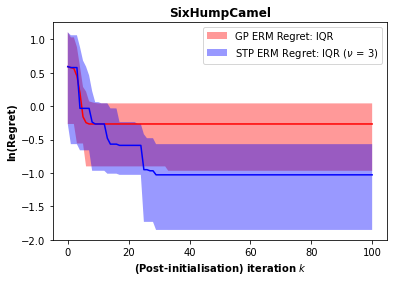

In [172]:
### Visualise!

title = obj_func

plt.figure()

plt.plot(median_gp, color = 'Red')
plt.plot(median_stp, color = 'Blue')

xstar = np.arange(0, max_iter+1, step=1)
plt.fill_between(xstar, lower_gp, upper_gp, facecolor = 'Red', alpha=0.4, label='GP ERM Regret: IQR')
plt.fill_between(xstar, lower_stp, upper_stp, facecolor = 'Blue', alpha=0.4, label='STP ERM Regret: IQR ' r'($\nu$' ' = {})'.format(df))

plt.title(title, weight = 'bold', family = 'Arial')
plt.xlabel('(Post-initialisation) iteration $\it{k}$', weight = 'bold') # x-axis label
plt.ylabel('ln(Regret)', weight = 'bold', family = 'Arial') # y-axis label
plt.legend(loc=0) # add plot legend

plt.show() #visualise
